# Projet Machine Learning - Notebook R

---


In [336]:
# Installation des packages nécessaires :

# install.packages('gtsummary')
# install.packages("tidyr")
# install.packages("GGally")
#install.packages("Metrics")

In [337]:
# Chargement des librairies nécessaires :
# library(gtsummary)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(ggfortify)
library(GGally)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(Metrics)

#### Téléchargement des données 

In [338]:
# Chargement des données :
path <- ""
data = read.table(paste(path, "./data.csv", sep = ""), sep = ",", header = TRUE)

# Analyse Exploratoire des données

---

## Affichage et transformation des données 

In [339]:
# Premiere visualisation du jeu de données :
head(data)
str(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Notre jeu de données "data" est un data frame contenant
- 3649 observations (lignes), 1 par annéee par pays pour chaque variable. Certaines valeurs sont manquantes. 
- 21 variables (colonnes)

Parmis ces dernières, nous pouvons observer :
- 2 variables qualitatives : Entity (176 pays) et Year (21 années)
- 19 variables quantitatives

Nous étudions la variable CO2_Value

#### Transformation des données (qualitatif/quantitatif)

In [340]:
data$Entity = as.factor(data$Entity) 
data$Year = as.factor(data$Year) 
data$Density.n.P.Km2. = as.numeric(gsub(",","", data$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclea

Entity a bien 176 niveau qui représentent les 176 pays
Year  a bien 21 niveaux, c'est cohérent car de 2000 à 2020 on a 21 années. 

## Analyse des valeurs manquantes 

In [341]:
B = summary(data) # nous permet de regarder le nombre de NA par variable

Val_Manquante = data.frame(B[7,]) # on récupère seulement le nombre de NA par variable

Val_Manquante = separate(Val_Manquante, B.7..., c("Type", "Val"), sep=":") # création d'un tableau avec les valeurs

Val_Manquante$Val = as.numeric(gsub(",",".", Val_Manquante$Val))
Val_Manquante$Val = Val_Manquante$Val/36.49 # calcul d'un pourcentage

Val_Manquante

,Type,Val
,<chr>,<dbl>
Entity,(Other),96.54699918
Year,(Other),71.22499315
Access.to.electricity....of.population.,NA's,0.27404768
Access.to.clean.fuels.for.cooking,NA's,4.63140586
Renewable.electricity.generating.capacity.per.capita,NA's,25.51383941
Financial.flows.to.developing.countries..US...,NA's,57.24856125
Renewable.energy.share.in.the.total.final.energy.consumption....,NA's,5.31652508
Electricity.from.fossil.fuels..TWh.,NA's,0.57550014
Electricity.from.nuclear..TWh.,NA's,3.45300082


D'après ce tableau, nous pouvons observer que les variables contenant le plus de valeurs manquantes sont :
- Renewable.electricity.generating.capacity.per.capita (colonne 5)
- Financial.flows.to.developping.countries..US... (colonne 6)
- Renewables....equivalent.primary.energy (colonne 15)

Nous allons supprimer les variables contenant trop de valeurs manuantes. Elles ne sont pas exploitables. 
Noius allons ensuite supprimer tous les individus ayant des valeurs manquantes. Cela pour pouvoir faire une analyse sur le jeux de données plus tard. 

#### Suppression des variables contenant trop de valeurs manquantes : 

In [342]:
data = data[,c(-5, -6, -15)]
str(data) # ok c'est le bon truc

'data.frame':	3649 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low.carbon.electricity....electrici

#### Suppressions des individus (lignes) contenant des valeurs manquantes 

In [343]:
# On supprime les lignes contenant des valeurs manquantes 
data = na.omit(data)

#### On renomme nos variables car les noms sont trop longs

In [344]:
colnames(data) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils",
                     "Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level",
                     "Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude")
str(data) # on a bien 2868 lignes et nos noms de variables ont bien été modifiés

summary(data)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                  : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec        : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels       : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables  : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec       : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons      : num  230 204 252 304 354 ...
 $ Energy_intensity_level: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2             : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth            : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita            : num  191 211 242 26

                 Entity          Year      Access_to_elec    Access_to_fuels 
 Algeria            :  20   2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Angola             :  20   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Antigua and Barbuda:  20   2016   : 146   Median : 97.000   Median : 81.55  
 Argentina          :  20   2017   : 146   Mean   : 76.585   Mean   : 62.17  
 Armenia            :  20   2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
 Australia          :  20   2019   : 146   Max.   :100.000   Max.   :100.00  
 (Other)            :2748   (Other):1990                                     
 Renewable_energy_share Elec_from_fossils  Elec_from_nuclear
 Min.   : 0.000         Min.   :   0.000   Min.   :  0.00   
 1st Qu.: 9.188         1st Qu.:   0.290   1st Qu.:  0.00   
 Median :28.790         Median :   2.995   Median :  0.00   
 Mean   :35.802         Mean   :  76.694   Mean   : 15.34   
 3rd Qu.:60.667         3rd Qu.:  25.788   3rd Qu.:  0.00   
 Max.   :9

### Bilan : 

On a bien 2868 lignes et nos noms de variables ont bien été modifiés. On a un jeu de données sans valauer manquantes. Nous pouvons maintenant analyser ces données. 

## Analyse unidimensionnelle

**Question 4 :** histogramme, boxplot, standardiser et/ou appliquer transformations

**Unités des variables**

% : Access to electricity (3) ; Access to clean fuels (4) ; Renewable energy share (5) ; low carbon electricity (9) ; gdp growth (13)

TWh : Electricity (6, 7, 8)

KWh : Primary energy consumption (10) ;

Mj : Energy intensity level (11) ;

Metrics tones per capita : Value CO2 (12) ;

PIB : GDP per capita (14)

P/Km² : Density (15)

Km² : Land area (16)

° : Latitude (17) ; Longitude (18)

### Boxplot sur les variables quantitatives

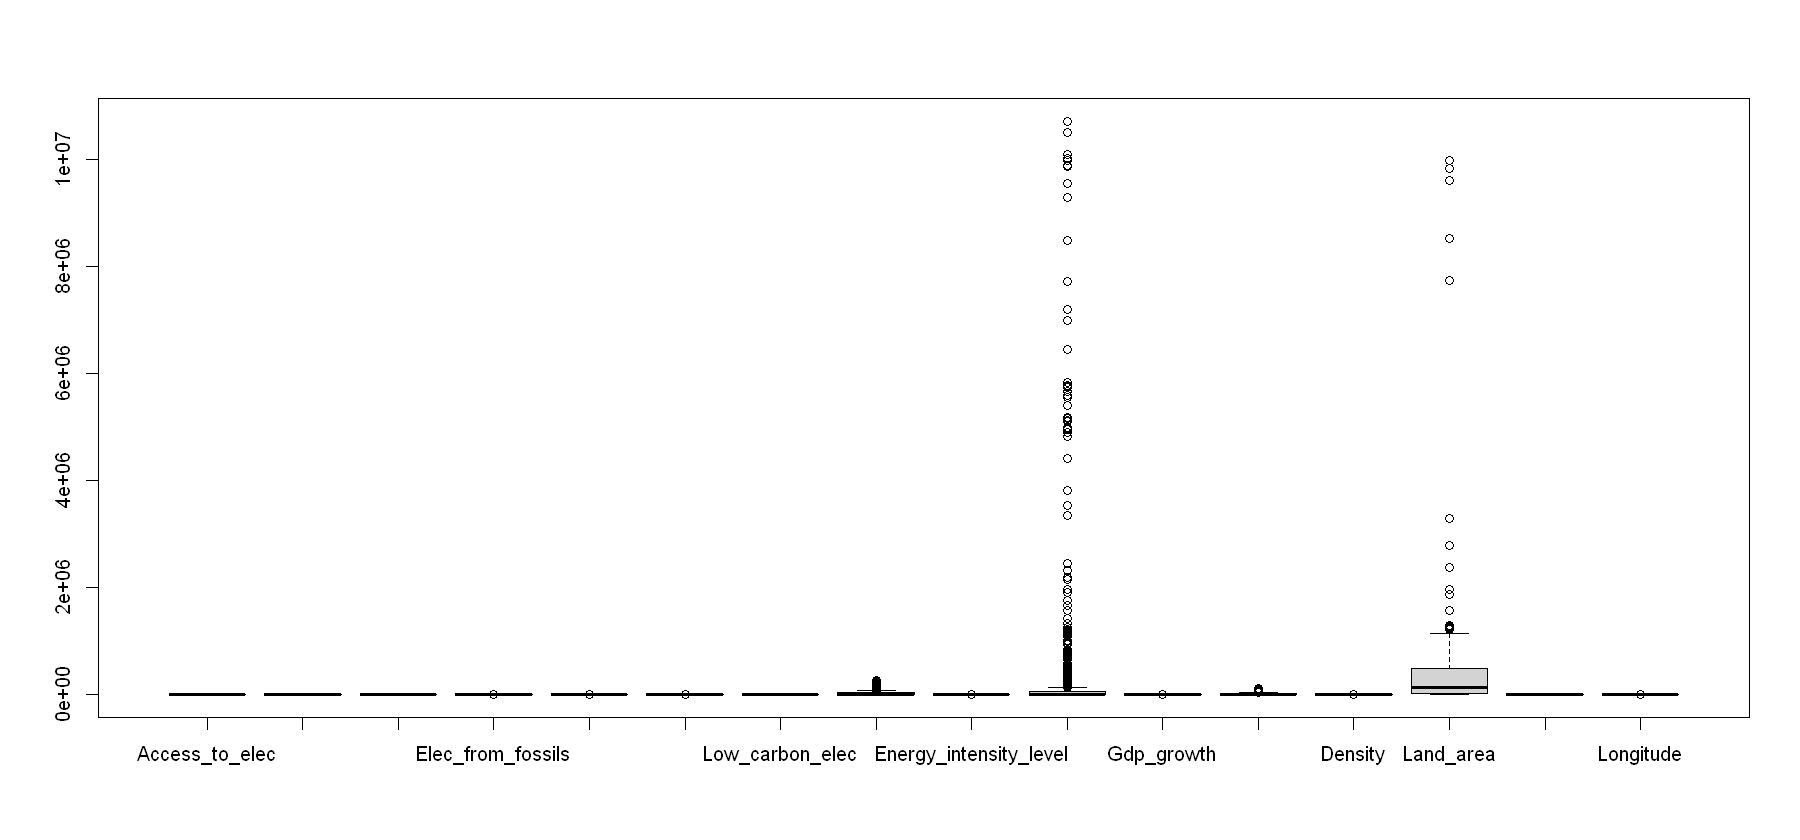

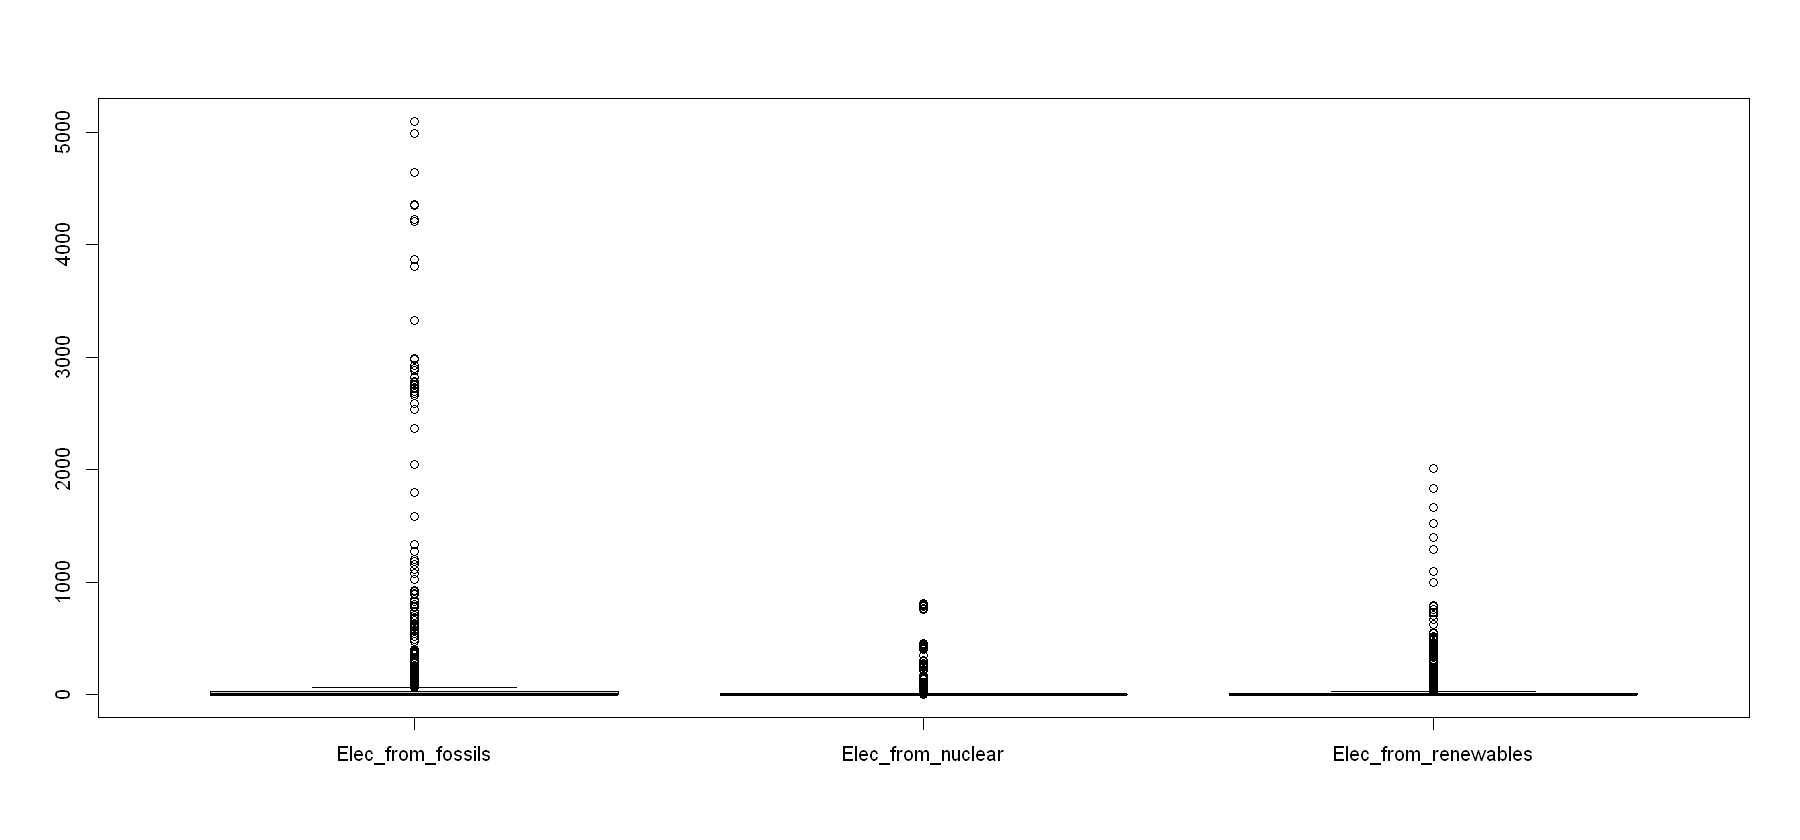

In [345]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data[,-c(1,2)]) # on voit pas grand chose : pas les mêmes unités et échelles

boxplot(data[,c(6:8)]) # boxplot electricity : on n'y voit rien : trop de outliers

**Interprétations:**

Nos variables sont données dans des unités différentes qui ne sont donc pas comparables entres-elles. C'est pourquoi le premier boxplot n'est pas interprétable. 

Le second pris sur les relevés d'éléctricité (même échelle) montre la présence de nombreux outliers. Cela traduit des valeurs très différentes de certains pays par rapport aux autres. 

### Histogramme des variables qualitatives 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

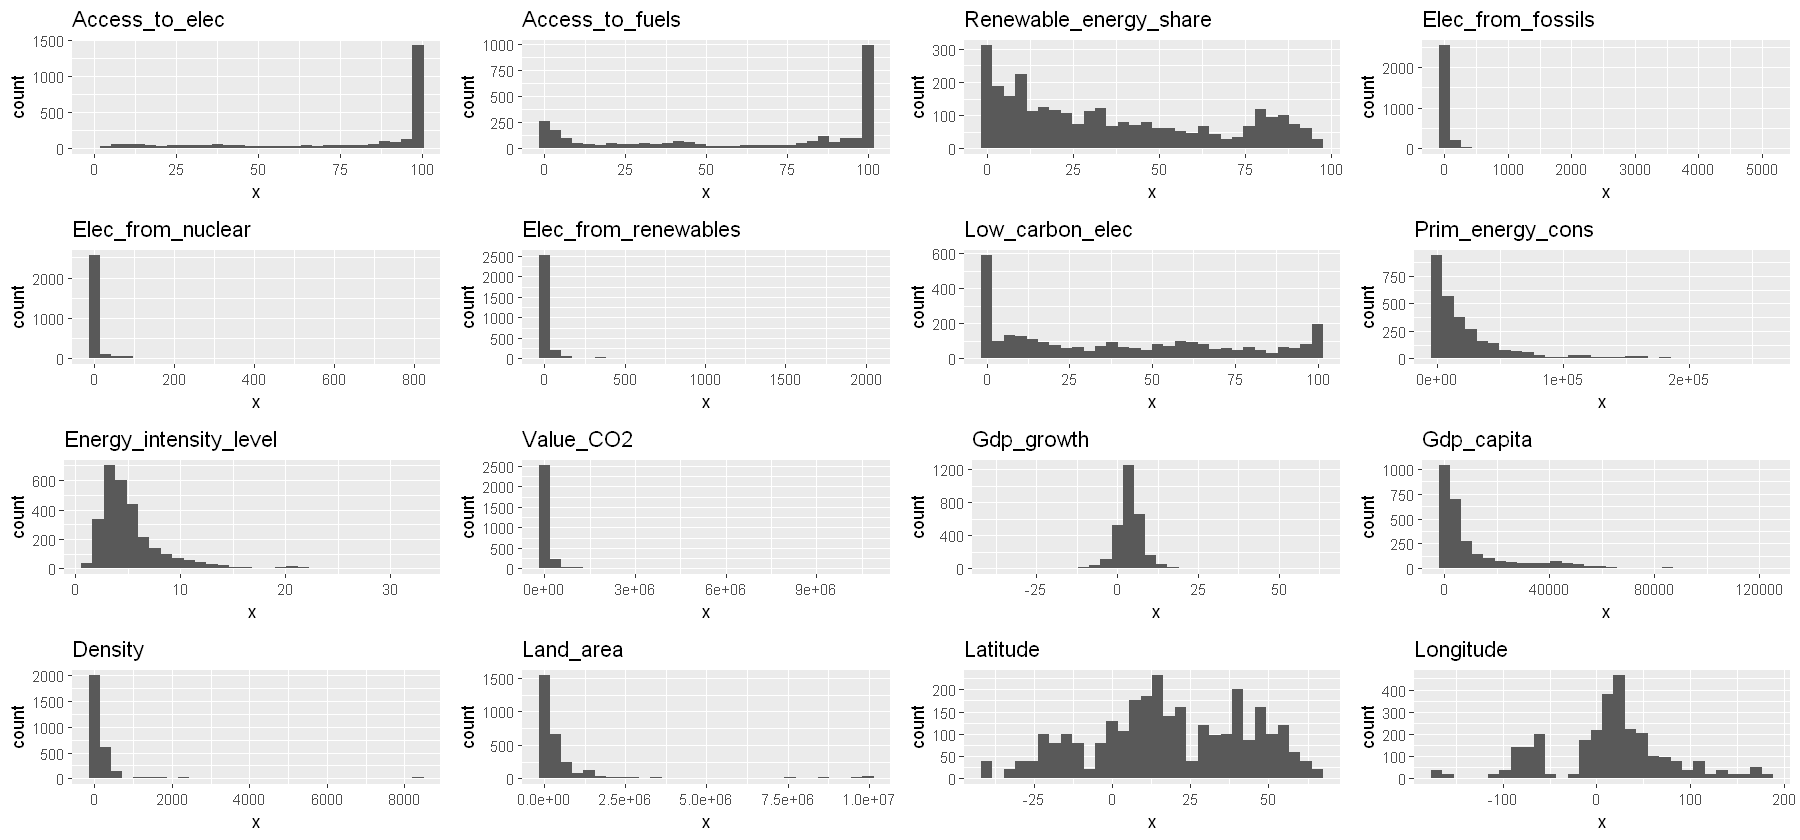

In [346]:
p = list()
j=1

for (i in names(data)){
    # on affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        data_copy <- data[[i]] # on créé une copie des données à chaque itération
        p[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=i)
    } 
}
                 
grid.arrange(grobs=p)

**Interprétations:**

D'après les histogrammes, on peut voir que certaines varibales ont une grande variance et ne sont pas également réparties. Afin de mieux les interpréters et proposer un meilleur modèle de prédiciton nous allons les ajuster par une transformation gausienne. 

On seffectue une transformation logarythmique sur les variables suivantes : 

[1] "Access_to_fuels"
[1] "Renewable_energy_share"
[1] "Elec_from_fossils"
[1] "Elec_from_nuclear"
[1] "Elec_from_renewables"
[1] "Low_carbon_elec"
[1] "Gdp_growth"


Warning message in log(data[, i] + 1):
"Production de NaN"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 225 rows containing non-finite outside the scale range (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick be

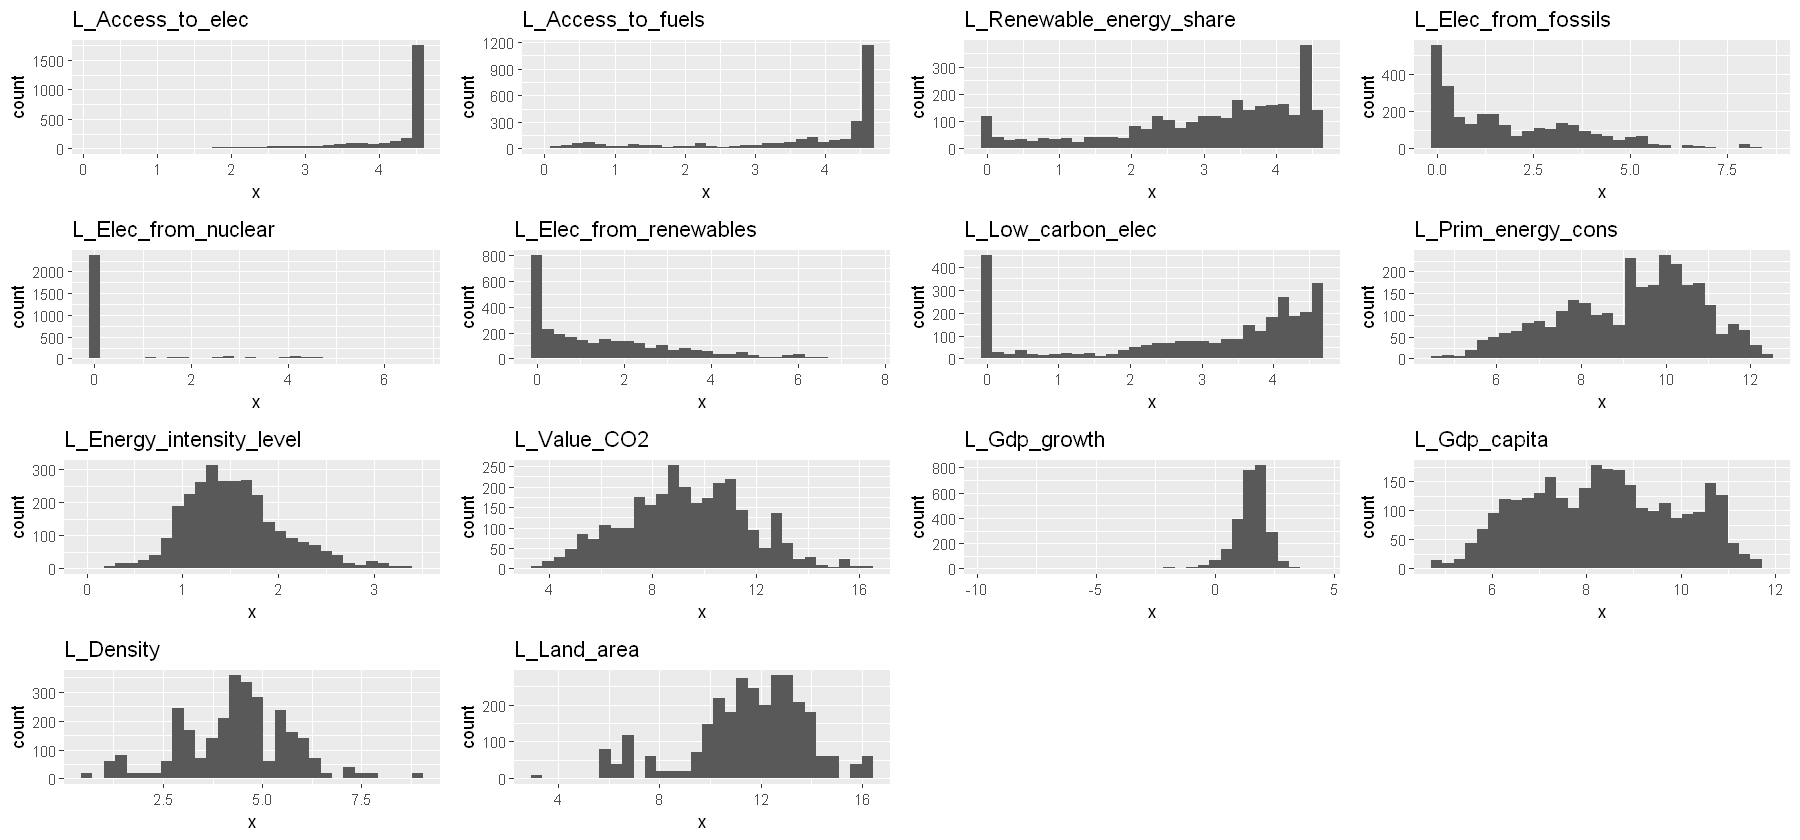

In [347]:
l = list()

# Mettre que les variables que l'on veut changer / ne pas log tout directement

Var_names = names(data[,1:16])

for (i in Var_names){
    # on n'affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        L_var <- paste("L_",i,sep="")
        if (all(data[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
            data[,L_var] <- log(data[,i])
        } else {
            print(i)
            data[,L_var] <- log(data[,i]+1)
        }
        data_copy <- data[[L_var]] # on créé une copie des données à chaque itération
        l[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=L_var)
    } 
}
                 
grid.arrange(grobs=l)

Nous garderons les transformations qui ont permi de recentrer nos données. 

In [348]:
data_centre <- data[,c(1,2,3,4,5,22,23,24,9,26,27,28,13,30,31,32,17,18)]
str(data_centre)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ L_Elec_from_fossils     : num  0.27 0.285 0.293 0.182 0.182 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.489 0.445 0.464 0.495 0.56 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ L_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ L_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ L_Value_CO2             : num  7.11 6.94 7.35 7.47 7.48 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ L_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 ...
 $ L_Den

### Les variables qualitatives

Comme on a enlevé les lignes contenant des données manquantes, certains pays ont moins d'années de relevé que d'autres. Il est important de prendre cela en compte. 

### Grande hétérogéneite de CO2

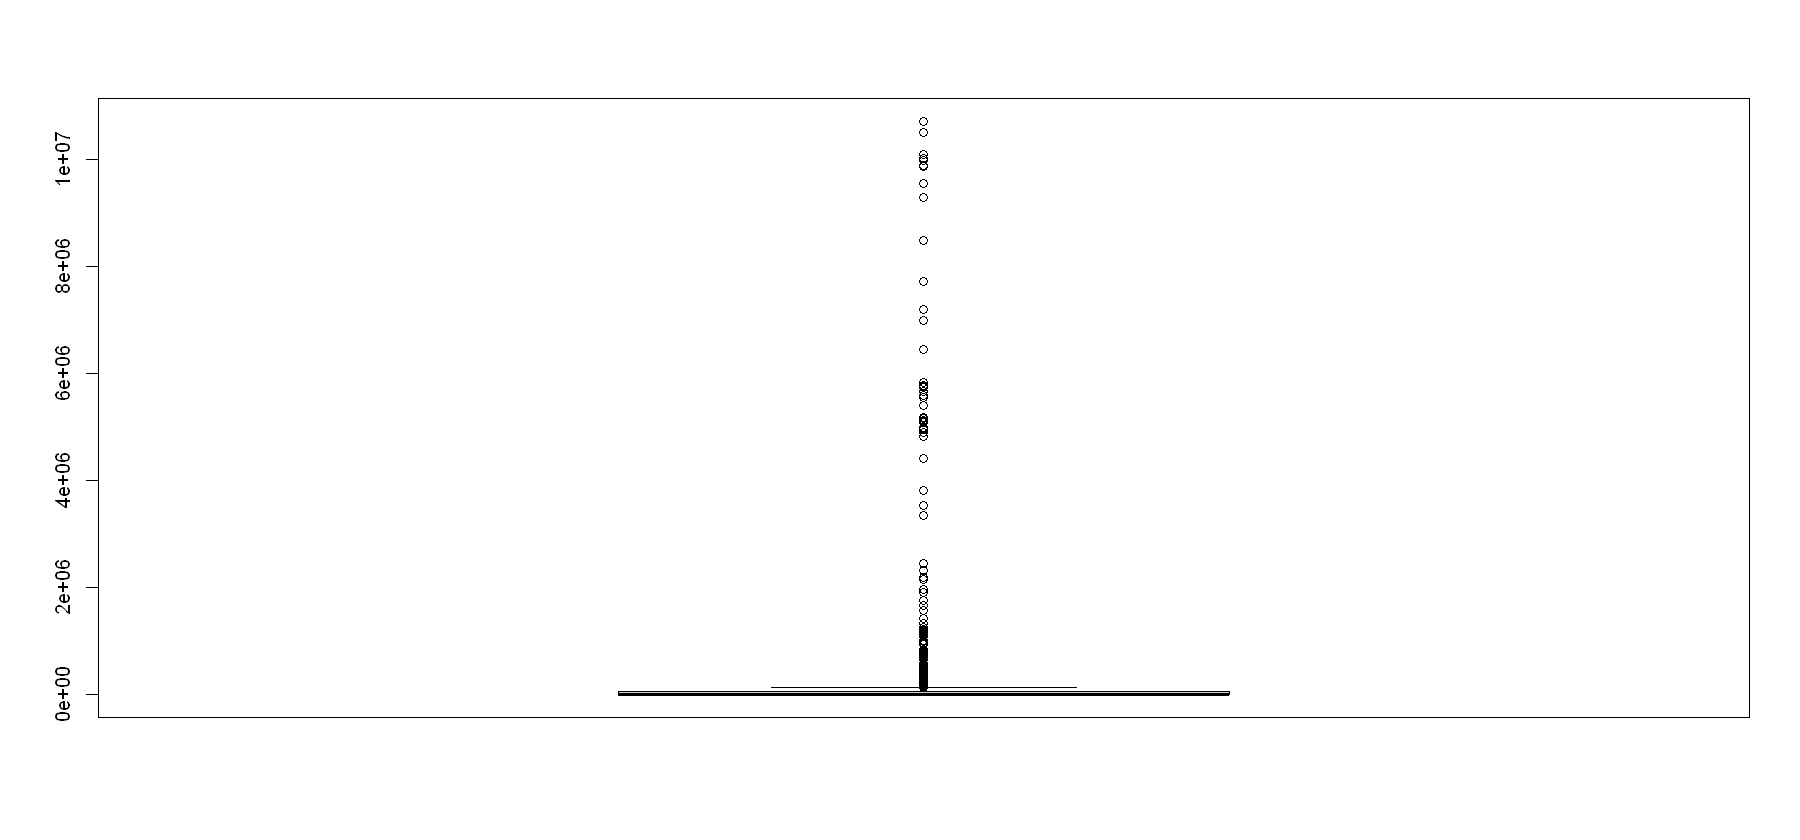

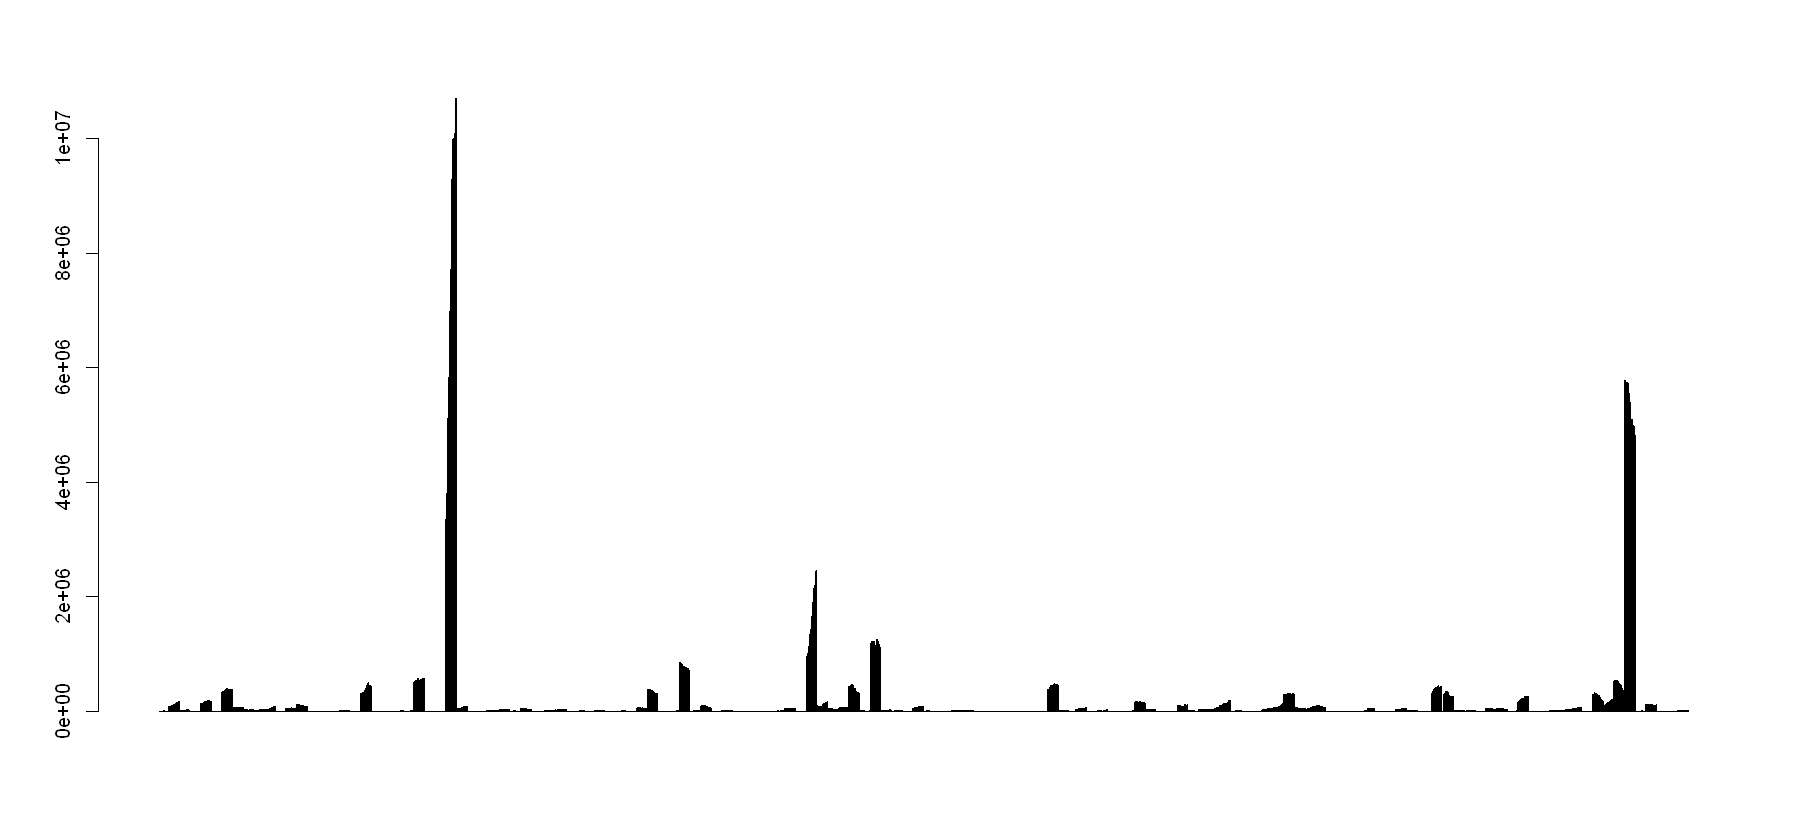

In [349]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data[,12])
barplot(data[,12])

In [350]:
# Attention dans cette cellule il y avait encore du data4 alors qu'il me seblait les avoir tous enlevés..
# Je viens de les re-enlever
# Si jamais il y a un petit problème c'est que j'ai peut être mal fait les modifications ?

nb_annee_pays = list()

j=1

for (i in levels(data_centre[,1])) {
    nb_annee_pays[[j]] = sum(grepl(i, data_centre$Entity))
    j=j+1
}

moy_pays_co2 = list() ## TESTER AFFICHER SUR UNE MAP

No = 1

for (j in levels(data[["Entity"]])) {
    data_sub = subset(data_centre, data$Entity==j)
    # moy_value_co2[[No]] = c(j, sum(data_sub[,12])/nb_annee_pays[[No]])
    moy_pays_co2[[No]] = sum(data_sub[,12])/nb_annee_pays[[No]]
    No = No+1
}

moy_pays_co2 = data.frame(moy_pays_co2)

colnames(moy_pays_co2) = levels(data[["Entity"]])

# head(moy_pays_co2)

# order(moy_pays_co2)

moy_pays_co2 = t(moy_pays_co2)

colnames(moy_pays_co2) = c("Moyenne_CO2")

#head(moy_pays_co2)

moy_ordonnee = order(moy_pays_co2, decreasing=TRUE)

head(moy_pays_co2[moy_ordonnee,])

China United States         India         Japan       Germany 
     15.78308      15.48658      14.25228      13.98342      13.55689 
       Canada 
     13.21272

**Interprétations:**

En faisant une moyenne de la consommation de CO2 (en metric tones per capita) des différents pays sur les années observées, on observe que les pays les plus polluants sont : 
- La Chine
- Les Etats-Unis
- L'Inde
- Le Japon
- L'Allemagne

Le boxplot présente de nombreux outliers traduisant une hétérogénéité importante poru la variable CO2. 

On retrouve le même résultat avec le barplot, celui-ci présente des pics à plus de 10e7 alors que les autres valeurs sont autour de 0. 

Les outliers ont des valeurs de CO2 bein plus grandes, les 5 plus grandes valeurs sont pour la Chine, les Etats-Unis, l'Inde, le Japon et l'Allemagne. 

## Analyse Descriptive Multidimensionnelle

---

On va ici regarder comment les variables intéragissent entre elles, leurs corrélations, etc.

On effectue cette analyse sur le jeu de données centrée (*ie* avec le jeux contenant mles varibales que l'on a décidé de transformer par un log)

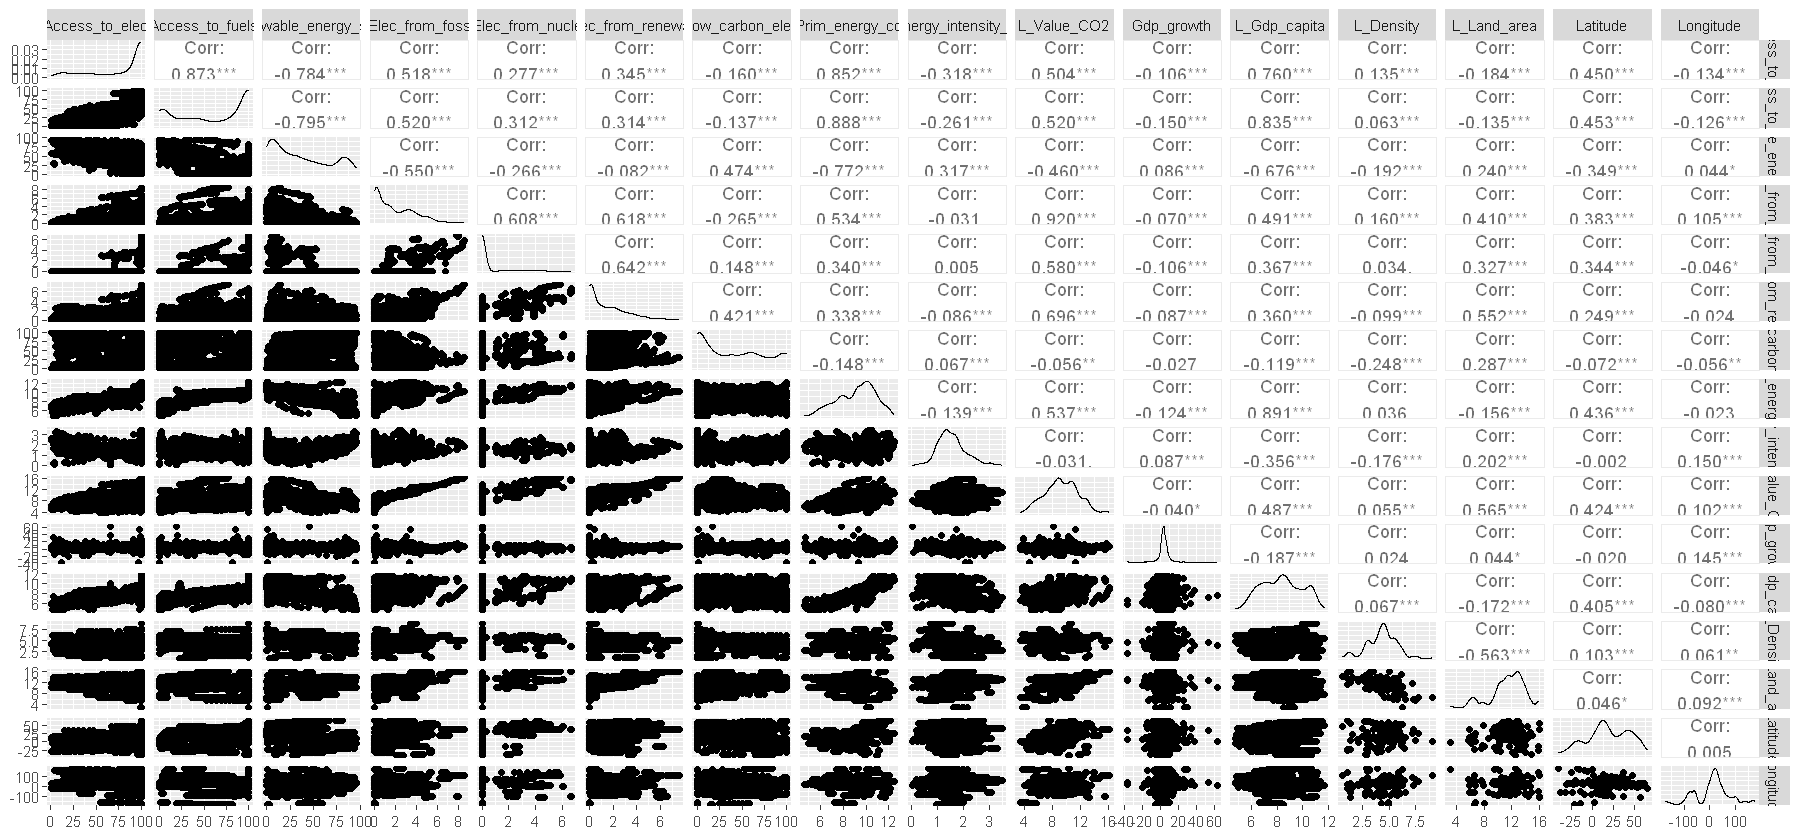

In [351]:
# on regarde les dépendances 2 à 2
ggpairs(data_centre[,c(3:18)])

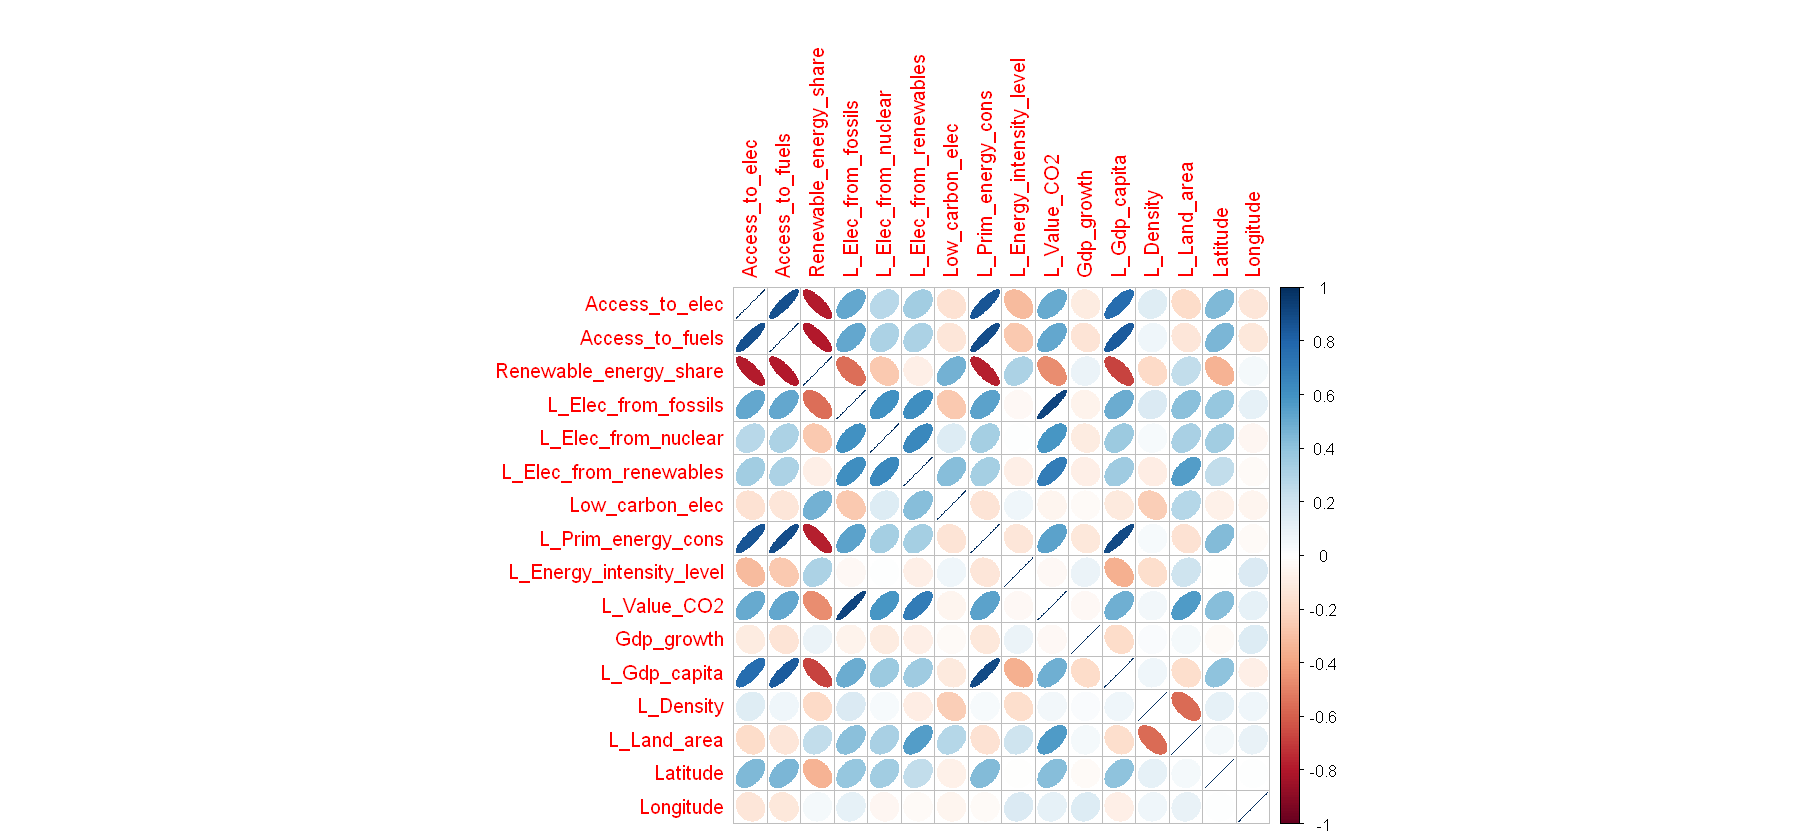

In [352]:
corrplot(cor(data_centre[,3:18]), method="ellipse")

**Interprétation**

D'après le graphe des corrélations, on peut remarquer des corrélations positives :
- Fortes entre :Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita : les pays ayant accès à l'electricité ont aussi accès au fuel..
- Plus faiblement : L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables : plus les pays produisent de l'electricité par les énergies fossils plus ils produisent par les énergies nucleaires et renouvelable.   

On peut aussi observer des corrélations négatives entre : 
- Fortes entre : Renewable_energy_share et Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita: si l'accès à l'électricité et au fuel augmente la part des e=énergies renouvelable diminue. 
- Plus faiblement : L_Land_area et L_Density : si la taille du pays augmente sa densité baisse.

Concernant la variable C02 : 
- Elle est corrélée positivement avec les trois variables élec, avec les variables Acess_to_elec et Acess_to_fuels. Il est cohérent de penser que si l'accès et la production d'énergies augmentent la production de CO2 aiugmentera aussi. 

- Il semble exister des corrélations avec la latitude mais pas spécialiement avec la longitude : il semble que le critère sur la position Nord/Sud du pays ait un lien avec sa produciton de CO2. Un pays plus au Nord aurait tendance à produire plus de CO2. 

La longitude et le Gdp growth ne semble pas être corrélés aux autres variables. 

#### Comaprons les corrélations log avec les données non modifiées : 

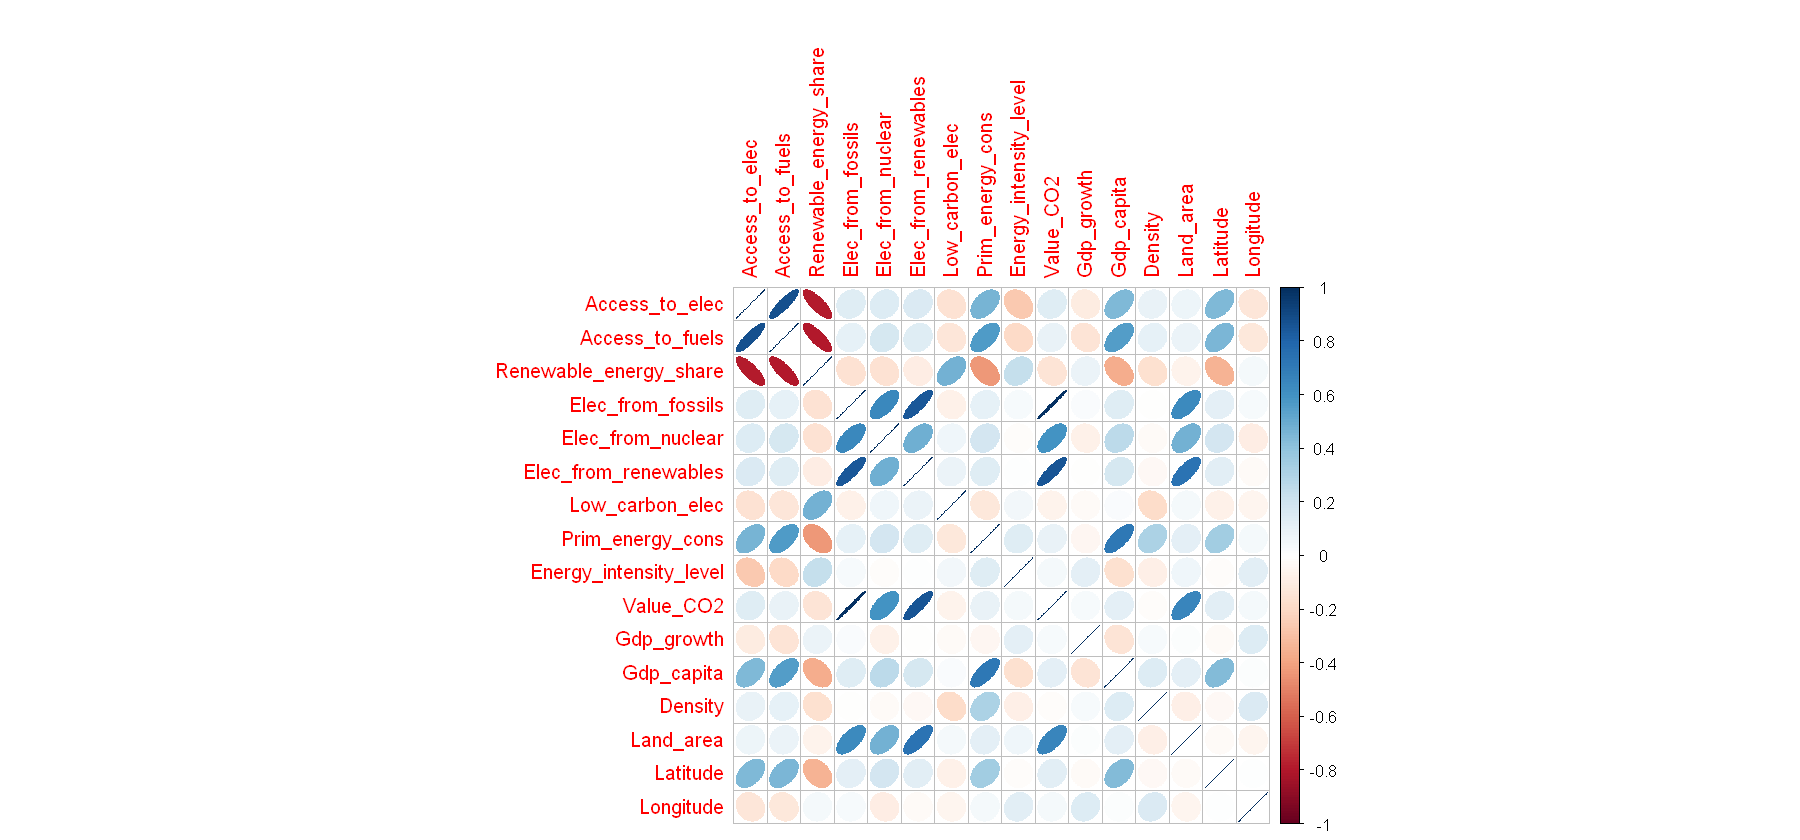

In [353]:
corrplot(cor(data[,3:18]), method="ellipse")

Il semblerait que les corrélations soient similaires mais moins importantes. C'est-à-dire des corrélations de même signe mais moins intenses. 

Ce résultat est satisfaisant, nous ne modifions pas les informations avec nos transformations. 

## Analyse en Composantes Principales

---

On effectue ici une ACP dans un double objectif :
- Exploratoire : l'ACP, peut nous permettre de mieux comprendre et étudier le jeu de données
- Réduction de dimension : l'ACP peut nous permettre de réduire la dimension de notre jeu de données en créant des métavariables portant une part importante de la variabilité du jeu de données

Comme précédemment, on effectue l'ACP sur le jeu de données avec les variables recentrées. On considère la variable à prédire (value_CO2) comme une variable quantitative supplémentaire.

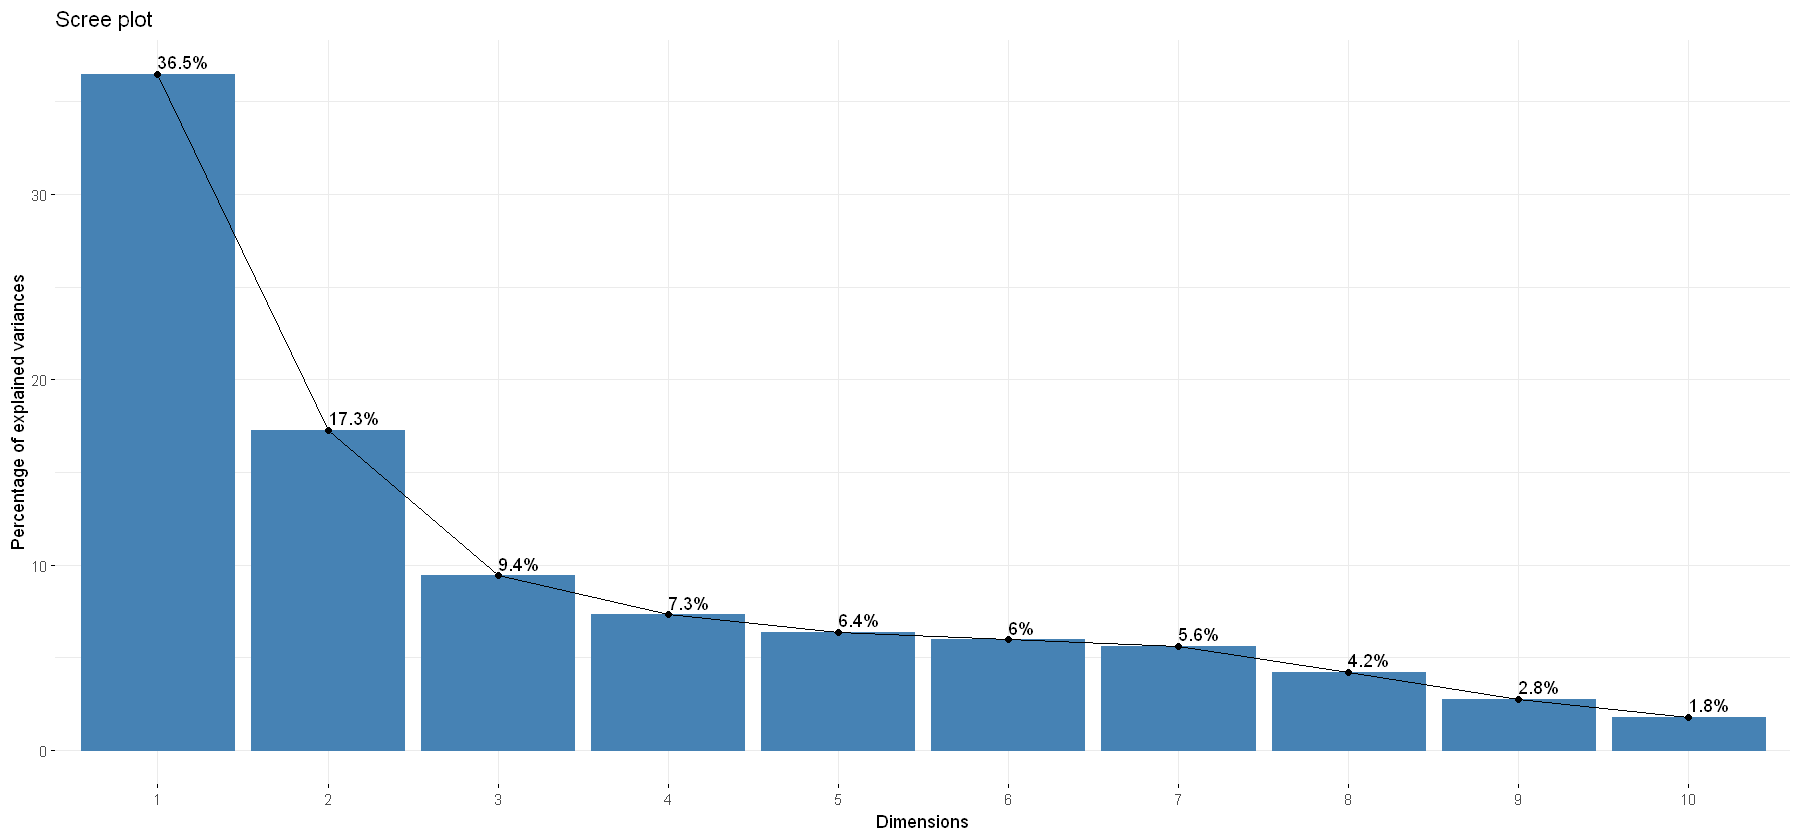

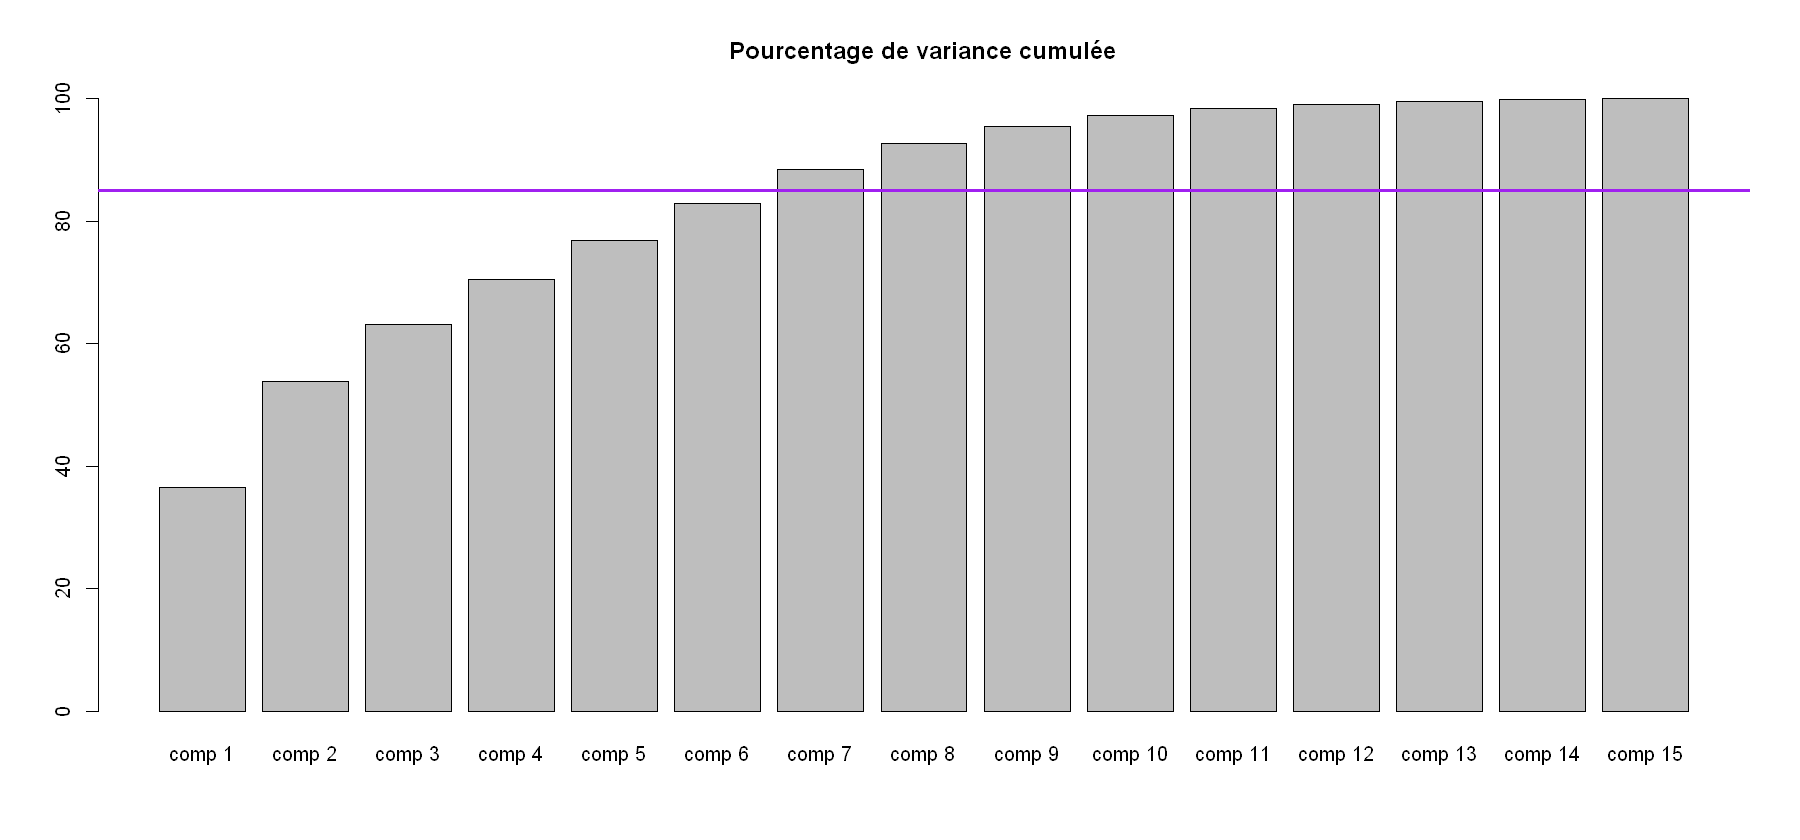

In [354]:
acp <- PCA(data_centre, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(1, 2), quanti.sup = 12 , ncp = 7)

# Décroissance des valeurs propres

g1<-fviz_eig(acp, addlabels = TRUE)
g1

var_cumul = acp$eig[,3]
barplot(var_cumul, main = "Pourcentage de variance cumulée")
abline(h=85, col="purple", lwd = 3)


## On garderai 7 variables explicatives.

**Interprétation:**

On choisit de garder 6 composantes principales afin d'expliquer plus de 85% de la variance du jeux de données. 

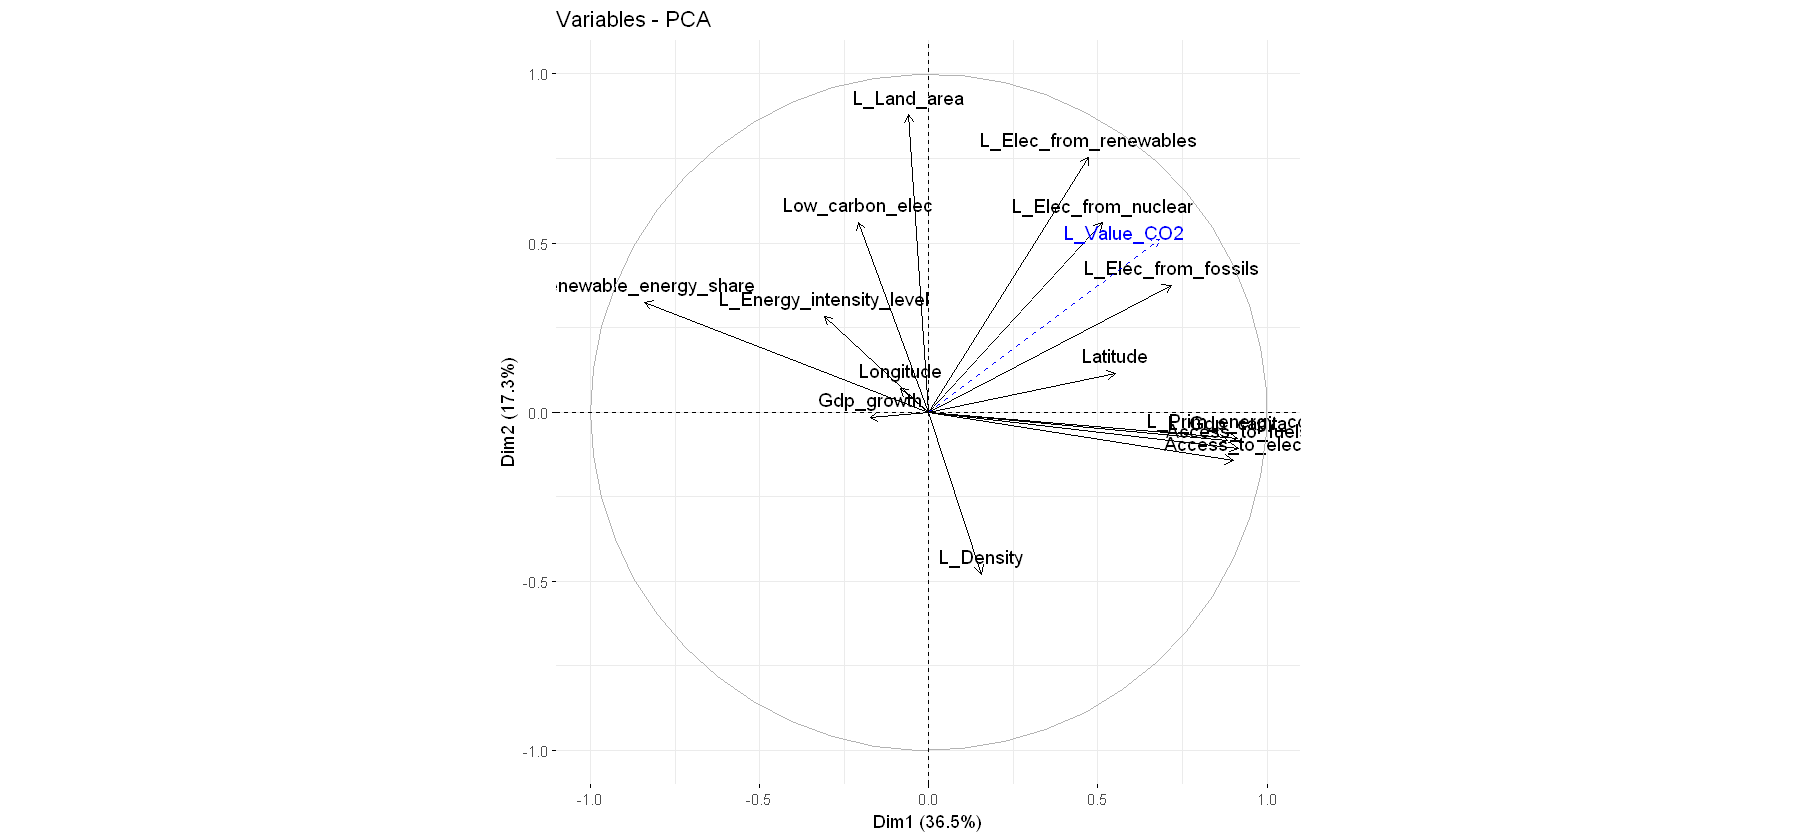

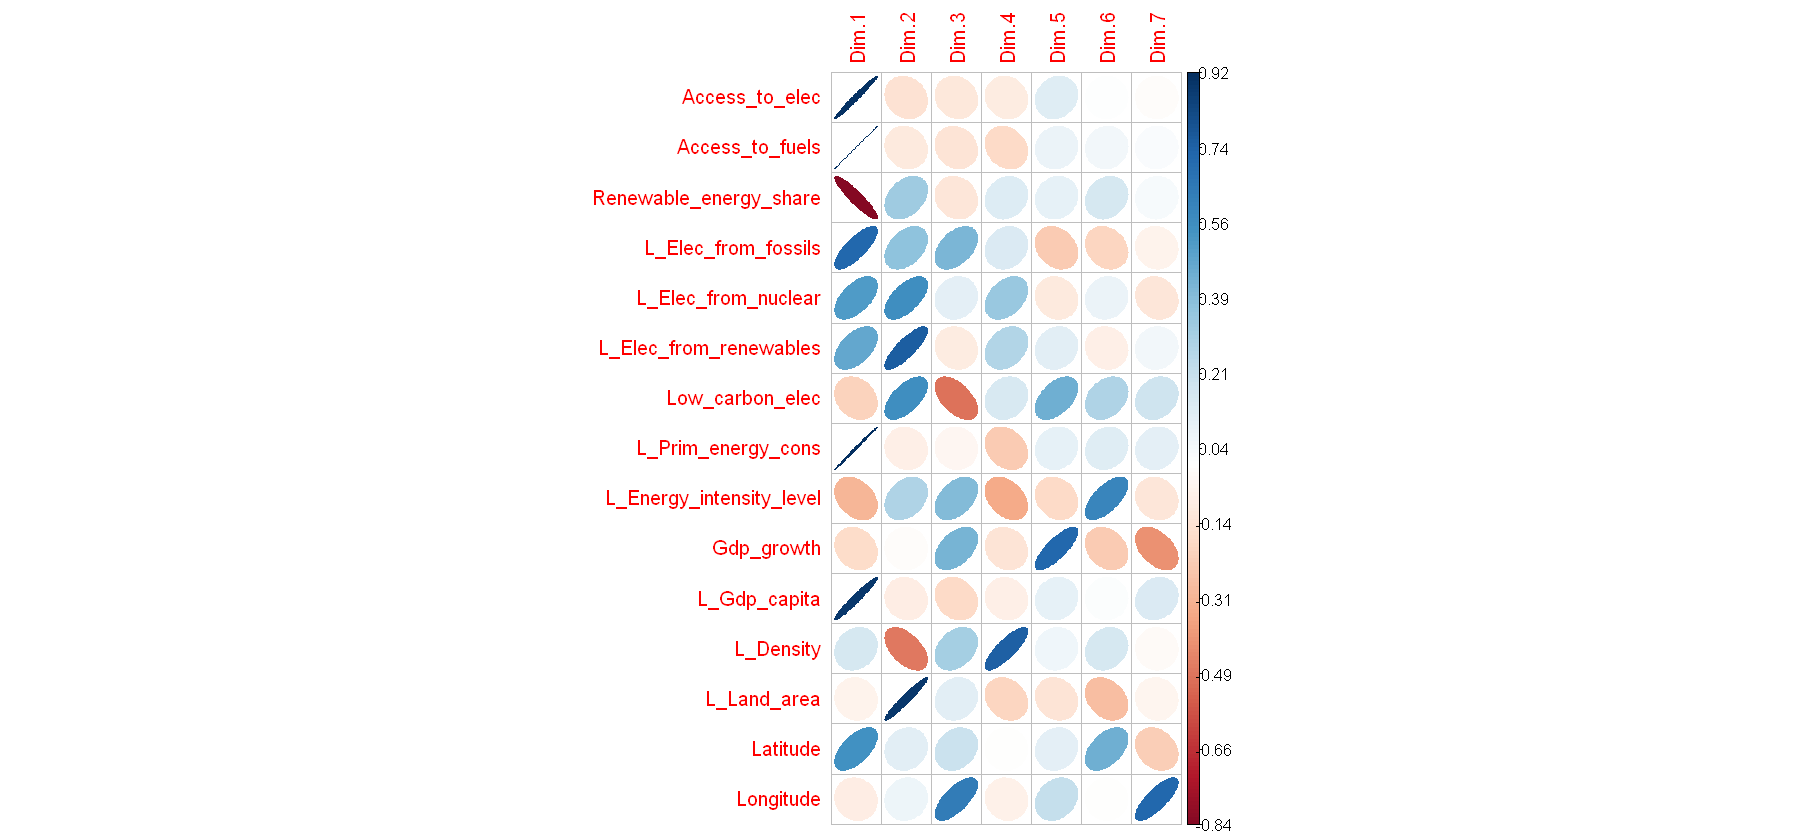

In [355]:
fviz_pca_var(acp)
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

**Interprétation:**

- La dimension 1 semble bien expliquer Access_to_elec, Access_to_fuels,Prim_energy_cons et Gdp_capita . Au contraire elle est  négativement corélée avec Renawable_energy_share et Energy_density_level.
- La dimension 2 explique très bien Land Area. Et est opossée a L_density. Elle est aussi corrélée positivement avec toutes les sources d'électricité. 

Il ne semble pas y avoir d'interprétation précise des dimensions qui ressorte. 

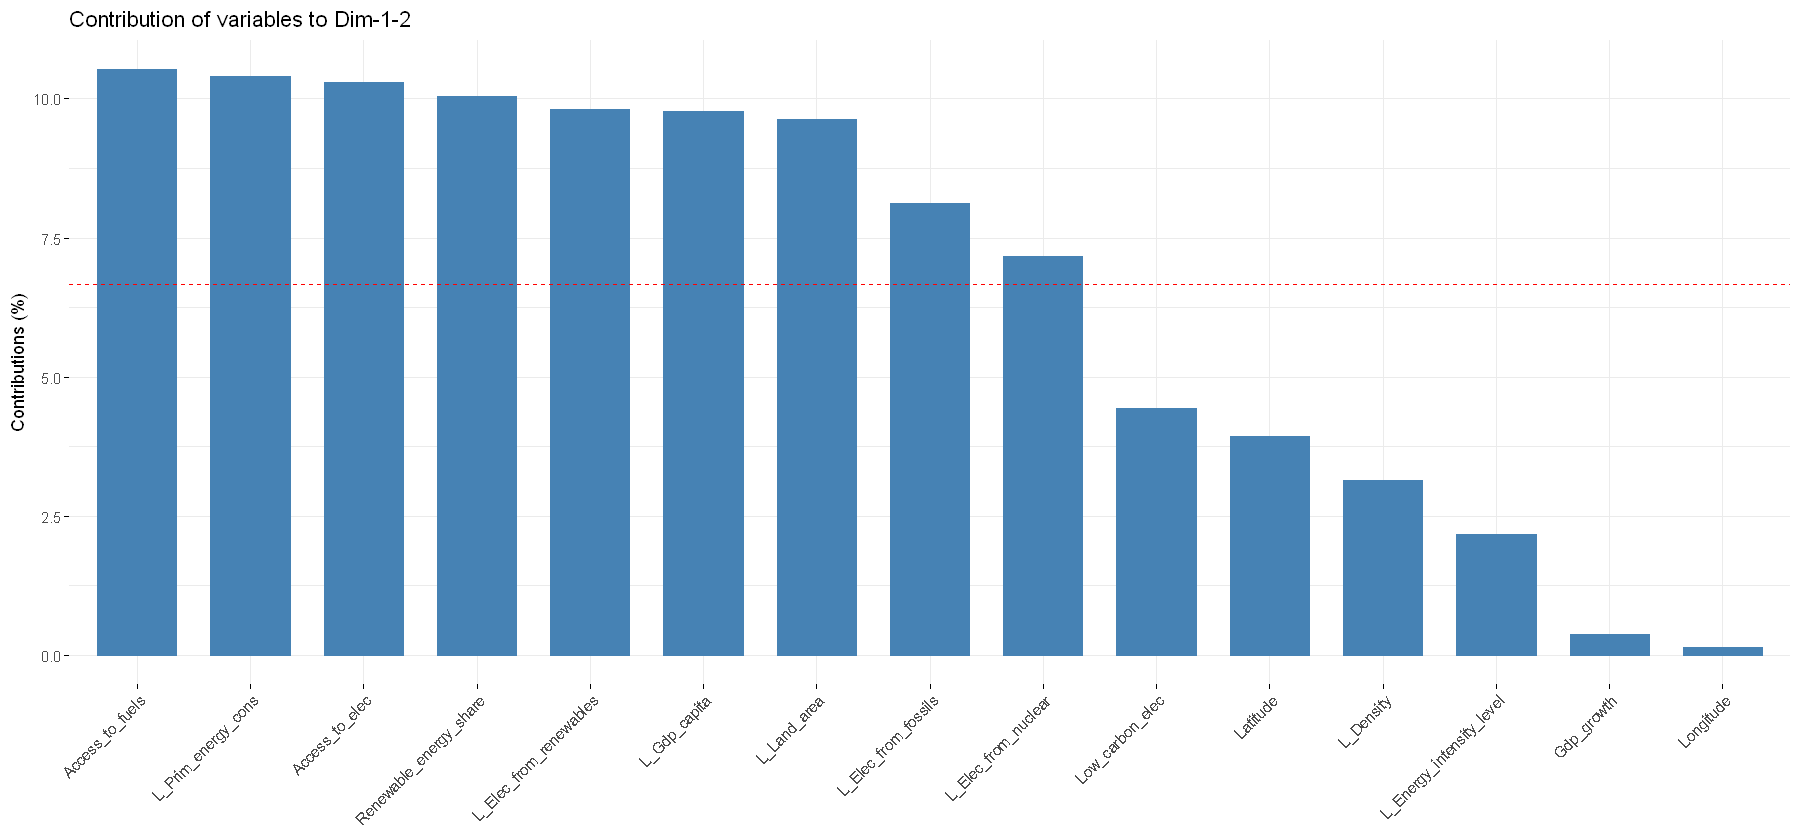

In [356]:
fviz_contrib(acp, choice = "var", axes = c(1,2))

Les deux premières dimensions sont principalement influencées par la valeur de Acces_to_fuels, L_Prim_energy_cons, Acces_to_elec ... Notant que ces deux dimensions expliquent plus de 50% de la variance de notre jeux de données, on s'attends à ce que ces variables soit les plus importantes pour la prédiciotn de la veleur du CO2. 

In [357]:
paste('-------- Projection des individus sur les deux premières dimensions --------')
fviz_pca_var(acp, label="none", habillage=data_centre$L_Value_CO2) #main = "Projection des individus sur les deux premières dimensions")

[1] "-------- Projection des individus sur les deux premières dimensions --------"

ERROR while rich displaying an object: Error in `palette()`:
! Must request at least one colour from a hue palette.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. pas

Il n'y a pas de groupement particulier qui se creent.

**8) Visualiser la dépendence de la varibale 'Year' et de la variable à prédire**

[1] "Pourcentage augmentation :"
[1] 37.3818


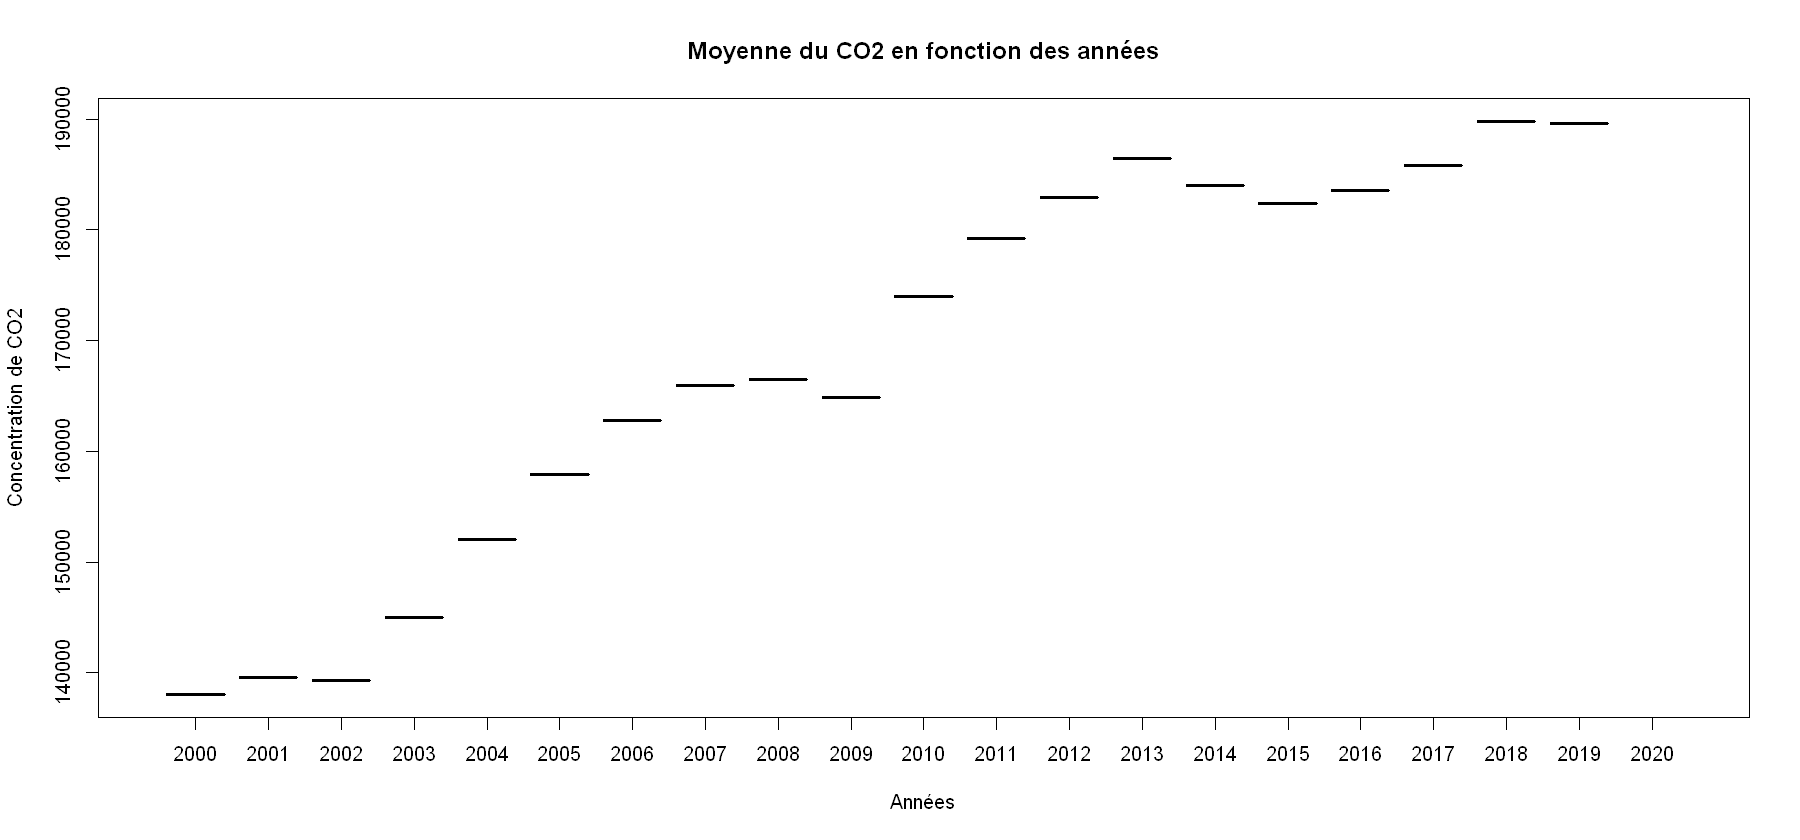

In [358]:
# Variable à prédire : Value-co2-emissions renommée en Value_CO2

Tab = data.frame(data$Year, data$Value_CO2)
colnames(Tab) = c("Year", "Value_CO2") # je récupère les deux variables que je veux utiliser
#str(Tab)                               # data frame : 2868 * 2

Moy_annee = aggregate(Value_CO2 ~ Year, data = Tab, FUN = mean) # moyenne du CO2 selon les années, stockée dans un data frame 

plot(Moy_annee$Value_CO2 ~ Moy_annee$Year, main = "Moyenne du CO2 en fonction des années",
     xlab = "Années", ylab = "Concentration de CO2")

print('Pourcentage augmentation :')
pourc_augm = (Moy_annee$Value_CO2[20] - Moy_annee$Value_CO2[1]) / Moy_annee$Value_CO2[1] *100
print(pourc_augm)

**Interprpétation**

On observe nettement que la moyenne de CO2 augmente très fortement avec les années. Celle-ci passe de 100000 en 2000 à près de 190000 en 2019. 

Entre 2000 et 2020 on observe une augmentation de 37,38%. 

La modélisation que nous allons faire de prend pas en compte les variables qualitatives soient 'Year' et 'Entity'. Mais il est important de se rappeler qu'il a une  nette infulence de ces variables sur la prédicton de CO2. Elle dépend beaucoup du pays et de l'année comme on a pu le montrer pécédement. 
Cependant, il semblerait que l'année et le pays soient représentés par les autres varibales : chaque pays par année a différentes valeur d'Acces_to_fuels, d'Acces_to_elec ... 

# Modélisation

---

***Retrait de Elec_from_fossil***

La variable CO2 étant très corrélée avec la variable Elec_from_fossil, pour un but éducatif, on l'enlèverra pour la suite de l'analyse. 

In [359]:
data_centre <- data_centre[,-6]
#data_centre

##  II. Création des échantillons d'apprentissage et de test

#### 1. 
Cette étape est essentielle pour evaluer la qualité d'une prédiciton. Il est nécéessaire d'évaluer l'erreur d'apprentissage en utilisant des données différentes de celles qui ont servies à l'entrainement. On garde donc 20% des données pour faire les tests. Cela va nous permettre d'évaluer la performance réelle du modèle sur des données non vues. Cela simule le scénario où le modèle est déployé sur de nouvelles observations.

In [360]:
#Afficher les résidus 

gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+#xlim(-2000000, 2000000)+ylim(-9000000, 1500000)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [361]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti =data_centre[,3:17]
n_ind = nrow(data_quanti) # nombre de lignes dans les données
n_var = ncol(data_quanti) # nombre de colonnes
n_test = ceiling(n_ind * ratio_test) # Taille de l'échantillon test (ceiling = arrondis sup)

print(paste0("Nombre d'individus (total) : " , n_ind))
print(paste0("Nombre de variables : " , n_var))
print(paste0("Taille de l'échantillon de test (20% individus totaux): " , n_test))

indices_test = sample(1:n_ind, n_test) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr = setdiff(1:n_ind, indices_test)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr = data_quanti[indices_appr,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test = data_quanti[indices_test,] # Echantillon test

CO2_appr = data_quanti[indices_appr, 9]
CO2_test = data_quanti[indices_test, 9]

paste("Résumé de l'échantillon d'apprentissage : ", dim(data_appr)[1], "individus et ", dim(data_appr)[2], "variables")
paste("Résumé de l'échantillon de test : ", dim(data_test)[1], "individus et ", dim(data_test)[2], "variables")
paste("Résumé de CO2_appr : ",length(CO2_appr), "individus")
paste("Résumé de CO2_test : ", length(CO2_test), "individus")

[1] "Nombre d'individus (total) : 2868"
[1] "Nombre de variables : 15"
[1] "Taille de l'échantillon de test (20% individus totaux): 574"


[1] "Résumé de l'échantillon d'apprentissage :  2294 individus et  15 variables"

[1] "Résumé de l'échantillon de test :  574 individus et  15 variables"

[1] "Résumé de CO2_appr :  2294 individus"

[1] "Résumé de CO2_test :  574 individus"

## Modèles Linéaire

### 1 - Régression linéaire simple

Nous allons faire une analyse de la variance (ANOVA) sur le modèle linéaire. L'ANOVA permettra de déterminer s'il existe des différences significatives dans les moyennes de L_Value_CO2 selon les niveaux des autres variables incluses dans le modèle.

### Sans sélection de variable

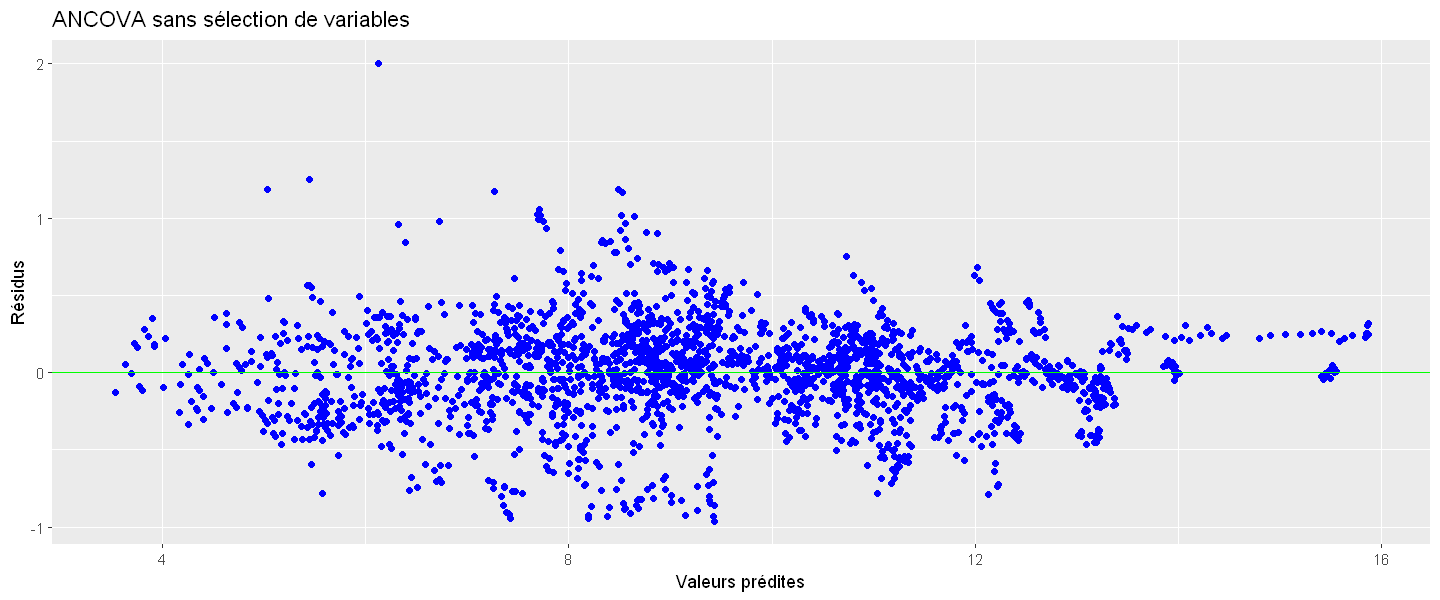

In [362]:
# Estimation du modèle sans interaction

reg.lm = aov(L_Value_CO2 ~ . , data=data_appr) # ANCOVA  car qualitatif + quantitatif

res.lm= reg.lm$residuals                   # Extraction des résidus
fit.lm = reg.lm$fitted.values               # Extraction des valeurs ajustées

#Affichage des résidus 

options(repr.plot.width = 12, repr.plot.height = 5)
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

In [363]:
pred.lm = predict(reg.lm, data_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_lm = mean(res.lm^2) # Moyenne des carrés des résidus
r2_lm = cor(data_test$L_Value_CO2, pred.lm)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_lm)
paste("Coefficient R2 : ", r2_lm)

[1] "MSE pour régression linéaire sans intéraction =  0.0928213998198594"

[1] "Coefficient R2 :  0.985364967269392"

R2 est proche de 1 donc le modèle est de qualité.

### Prévison de l'échantillon test

#### Erreur de regression 

In [364]:
e_reg_lm = sum((pred.lm-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de régression avec lm', str(e_reg_lm))

 num 0.084
[1] "Erreur de régression avec lm"


#### Erreur de classification

In [365]:
table(pred.lm>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   328    6
  TRUE     14  226

### Selection avec AIC : 

 On va effectuer une sélection de modèle automatique en utilisant le critère d'information AIC

In [366]:
library(MASS)

In [367]:
step_model <- stepAIC(reg.lm, direction = "both") 

Start:  AIC=-5423.02
L_Value_CO2 ~ Access_to_elec + Access_to_fuels + Renewable_energy_share + 
    L_Elec_from_nuclear + L_Elec_from_renewables + Low_carbon_elec + 
    L_Prim_energy_cons + L_Energy_intensity_level + Gdp_growth + 
    L_Gdp_capita + L_Density + L_Land_area + Latitude + Longitude

                           Df Sum of Sq    RSS     AIC
- L_Elec_from_nuclear       1       0.0  213.0 -5424.6
<none>                                   212.9 -5423.0
- Longitude                 1       0.2  213.2 -5422.6
- L_Elec_from_renewables    1       0.4  213.3 -5420.6
- Latitude                  1       1.3  214.3 -5410.5
- Gdp_growth                1       1.8  214.7 -5405.7
- Access_to_fuels           1       4.0  216.9 -5382.4
- L_Energy_intensity_level  1      12.5  225.4 -5294.1
- Low_carbon_elec           1      23.5  236.4 -5185.2
- Renewable_energy_share    1      31.4  244.3 -5109.8
- Access_to_elec            1      35.7  248.6 -5069.6
- L_Gdp_capita              1      51.5  

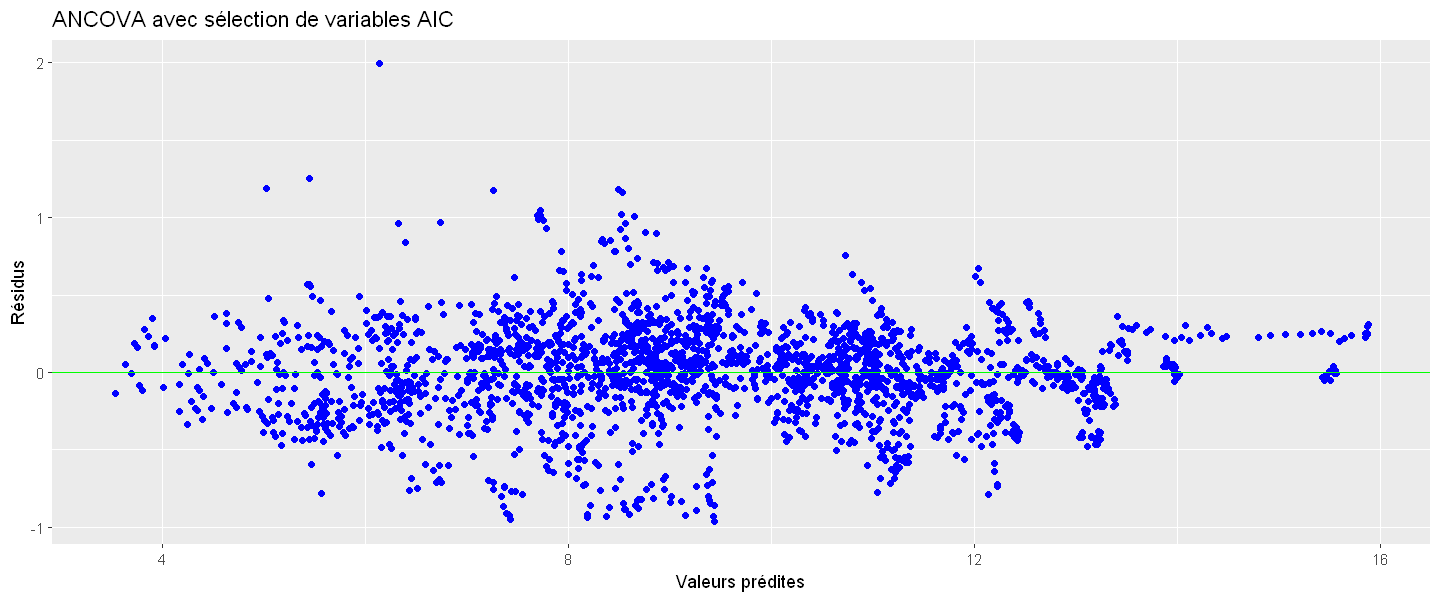

In [368]:
res.AIC <- residuals(step_model)                 
fit.AIC <- fitted(step_model)

#Affichage des résidus 

options(repr.plot.width = 12, repr.plot.height = 5)
gplot.res(fit.AIC,res.AIC,"ANCOVA avec sélection de variables AIC")

In [369]:
pred.AIC = predict(step_model, data_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_AIC = mean(res.AIC^2) # Moyenne des carrés des résidus
r2_AIC = cor(data_test$L_Value_CO2, pred.AIC)^2

paste("MSE pour régression linéaire savec sélection de variables AIC = ", mse_AIC)
paste("Coefficient R2 : ", r2_AIC)

[1] "MSE pour régression linéaire savec sélection de variables AIC =  0.0928366285362125"

[1] "Coefficient R2 :  0.985342650399131"

### Prévison de l'échantillon test 

#### Erreur de regression

In [370]:
e_reg_AIC = sum((pred.AIC-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de régression avec lm selection par AIC', str(e_reg_AIC))

 num 0.0841
[1] "Erreur de régression avec lm selection par AIC"


#### Erreur de classification

In [371]:
table(pred.AIC>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   328    6
  TRUE     14  226

### Selection de variable avec pénalisation Lasso

Avec la méthode Lasso, le but est de minimiser : $\frac{1}{2n_{samples}}||Y - X\beta||^2_2 + \lambda||\beta||_1$

- Ici, on va faire varier le paramètre lambda qui se trouve devant la pénalité l1. Mettre lambda = 0 revient à réaliser une méthode de moindres carrés. Lambda contrôle le niveau de régularisation : si lambda est grand les coefficients seront plus petits et  la sélection des variables sera plus stricte. 
- Les $\beta_j$ sont les coefficients associés à chaque variable qui vont être réduis et\ou mis à zéros. 

In [372]:
library(glmnet)

#### Modèle sans paramétrisation

In [373]:
x.mat = model.matrix(L_Value_CO2 ~ . - 1, data = data_appr) # on récupère la matrice de design, on enlève l'intercept.
reg.lasso = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 1)

#### Choix du paramètre de pénalisation $\lambda$

Cherchons à determiner par validation croisée la meilleur valeur de lambda pour ce model Lasso

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.012"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.002 en log vaut : -6.21460809842219"

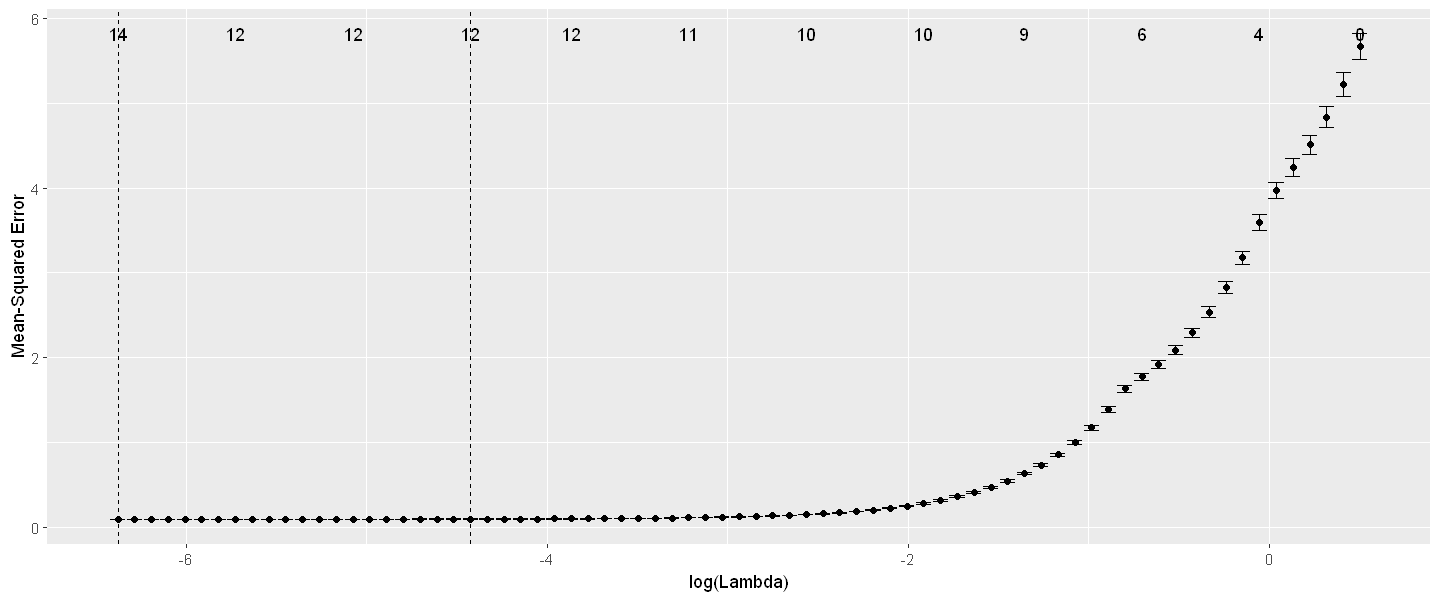

In [374]:
reg.lasso.cv = cv.glmnet(y = data_appr$L_Value_CO2, x = x.mat)
autoplot(reg.lasso.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.lasso.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.lasso.cv$lambda.min, 3), "en log vaut :",log(round(reg.lasso.cv$lambda.min, 3)))

Cet autoplot = erreur de généralisation (R fait automatiquement de la validation croisée).

Les deux droites verticales :
- Première : la lambda pour la plus petite erreur.
- Seconde : le plus grand lambda pour que l'erreur moyenne de prédiction soit dans l'intervalle de confiance pour lambda_min.

***Interprétation:***
Lambda_1se ne permet la selection d'aucune variable donc reviendrait à faire une regression linéaire sans selection. Nous allons donc utiliser lambda_1se. Cependant en règle générale, le critère lamnbda_min permet d'obtenir des résultats plus précis. 

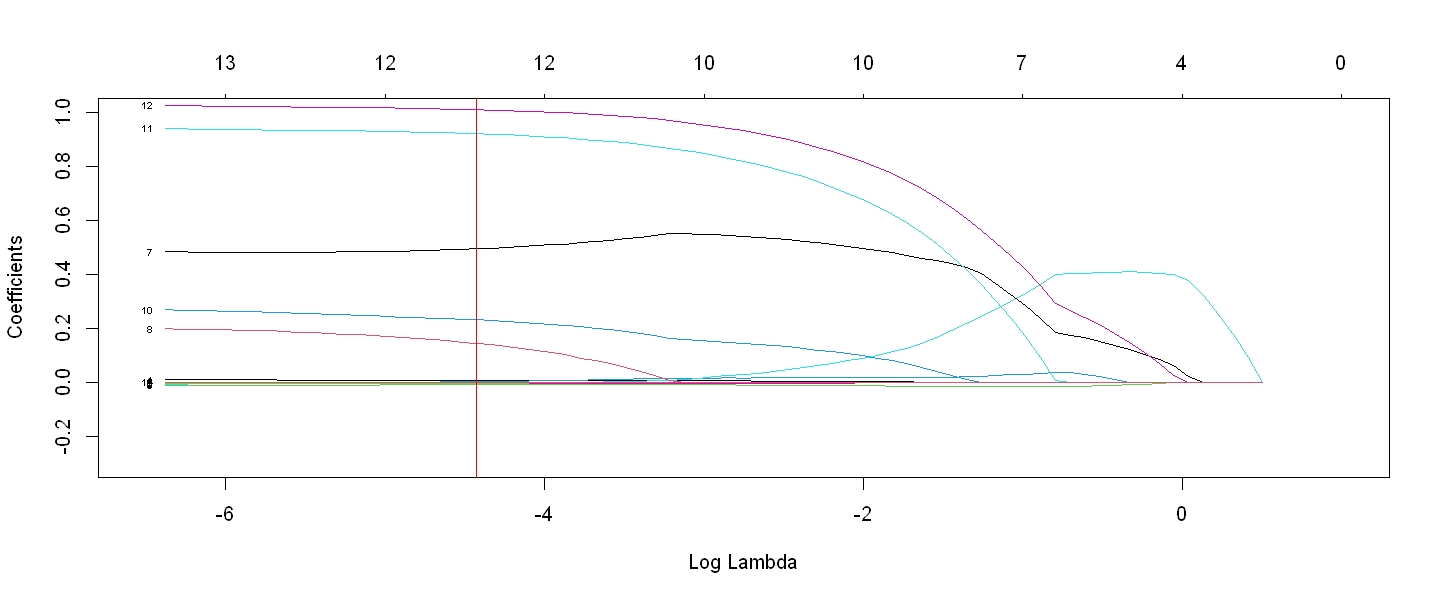

In [375]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-6.5,1),ylim=c(-0.3,1))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")  #avec min est ce que y'a pas bcp trop de variables ?

Vérifions la liste des coefficeint mis à 0 : 

In [376]:
coef_list <- coef(reg.lasso.cv, s = "lambda.1se")
coef_list

15 x 1 sparse Matrix of class "dgCMatrix"
                                    s1
(Intercept)              -1.314970e+01
Access_to_elec            8.257844e-03
Access_to_fuels           .           
Renewable_energy_share   -8.879444e-03
L_Elec_from_nuclear       3.214235e-03
L_Elec_from_renewables    .           
Low_carbon_elec          -4.705204e-03
L_Prim_energy_cons        4.953578e-01
L_Energy_intensity_level  1.443021e-01
Gdp_growth               -2.659471e-03
L_Gdp_capita              2.316392e-01
L_Density                 9.208202e-01
L_Land_area               1.010037e+00
Latitude                  1.180203e-03
Longitude                 1.289361e-04

**Interprétation:**

2 coefficents ont été mis à 0. 'Access_to_elec' et 'L_Elec_from_renewables'. 

Nous calculons nos erreurs et prédicions entre ML sans sélection et ML Lasso pour lambda 1se

In [377]:
fit.lasso = predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso = data_appr$L_Value_CO2 - fit.lasso

x.mat_test = model.matrix(L_Value_CO2 ~ . - 1, data = data_test) 

pred.lasso = predict(reg.lasso.cv, s = "lambda.1se", newx=x.mat_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_lasso = mean(res.lasso^2) # Moyenne des carrés des résidus
r2_lasso = cor(data_test$L_Value_CO2, pred.lasso)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_lasso)
paste("Coefficient R2 : ", r2_lasso)

[1] "MSE pour régression linéaire sans intéraction =  0.0965011578984242"

[1] "Coefficient R2 :  0.984696678353144"

### Prédiction de l'échantillon test

#### Erreur de regression

In [378]:
e_reg_lasso = sum((pred.lasso-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de régression avec lm', str(e_reg_lasso))

 num 0.0888
[1] "Erreur de régression avec lm"


#### Erreur de classification

In [379]:
table(pred.lasso>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   332    7
  TRUE     10  225

### Avec pénalisation Ridge

Dans ce modèle, notre but est de minimiser cette fonction : $||Y - X\beta||^2_2 + \lambda||\beta||^2_2$.
On va donc chercher à optimiser le paramètre lambda qui se trouve devant le terme de pénalisation l2. 
- $\lambda$ est le paramètre de régularisation. Ce paramètre contrôle la force de la pénalisation appliquée aux coefficients du modèle. Plus $\lambda$ est grand, plus la pénalité sur les coefficients est forte, ce qui conduit à des solutions plus régulières. On a fait de l'over-fitting quand la pénalité vaut 0 et de l'under-fitting quand elle est trop grande. 

In [380]:
x.mat = model.matrix(L_Value_CO2 ~ . - 1, data = data_appr) # on récupère la matrice de design, on enlève intercept.
reg.ridge = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 0)
options(repr.plot.width = 6, repr.plot.height = 5)
reg.ridge.cv = cv.glmnet(y =data_appr$L_Value_CO2, x = x.mat, alpha = 0)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.ridge.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.ridge.cv$lambda.min, 3))
paste("Modèle correspondant à lambda1se = meilleur lambda par validation croisée : ")
coef(reg.ridge.cv, s="lambda.1se")

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.166"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.166"

[1] "Modèle correspondant à lambda1se = meilleur lambda par validation croisée : "

15 x 1 sparse Matrix of class "dgCMatrix"
                                   s1
(Intercept)              -7.428568861
Access_to_elec            0.007107897
Access_to_fuels           0.002922945
Renewable_energy_share   -0.011423945
L_Elec_from_nuclear       0.049455804
L_Elec_from_renewables    0.229452099
Low_carbon_elec          -0.007335091
L_Prim_energy_cons        0.275494036
L_Energy_intensity_level  0.247393964
Gdp_growth               -0.001042337
L_Gdp_capita              0.201288892
L_Density                 0.656816877
L_Land_area               0.766502522
Latitude                  0.003806023
Longitude                 0.001304822

Effectuons de la validation croisée pour trouver la meilleur valeur de lambda. 

[1] "CV estimate of lambda : 0.166"

Warning message in plot.window(...):
""xvar" n'est pas un paramètre graphique"
Warning message in plot.window(...):
""label" n'est pas un paramètre graphique"
Warning message in plot.xy(xy, type, ...):
""xvar" n'est pas un paramètre graphique"
Warning message in plot.xy(xy, type, ...):
""label" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xvar" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""label" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xvar" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""label" n'est pas un paramètre graphique"
Warning message in box(...):
""xvar" n'est pas un paramètre graphique"
Warning message in box(...):
""label" n'est pas un paramètre graphique"
Warning message in title(...):
""xvar" n'est pas un paramètre graphique"
Warning 

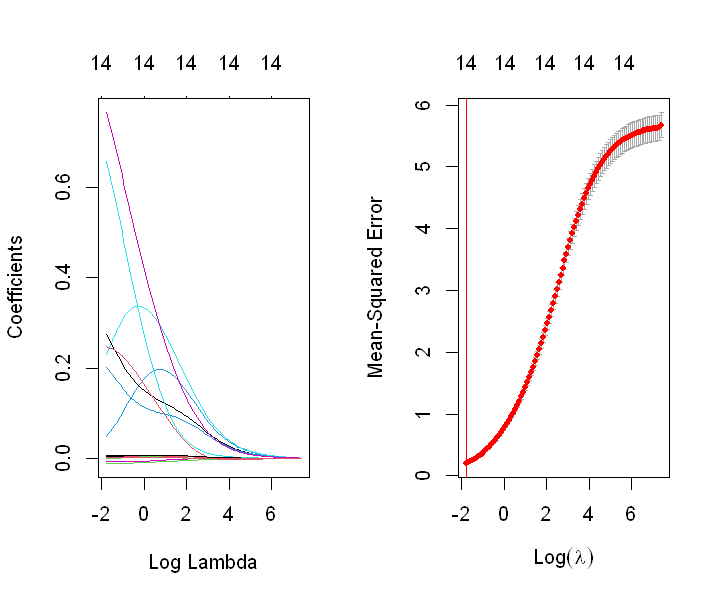

In [381]:
paste("CV estimate of lambda :", round(reg.ridge.cv$lambda.1se, 3))
par(mfrow = c(1, 2))
plot(reg.ridge, xvar = "lambda", label = TRUE)
plot(reg.ridge.cv, xvar = "lambda", label = TRUE)
abline(v=log(reg.ridge.cv$lambda.1se),col="red")

**Interprétation:** Nous trouvons une valeur de lambda faible qui n'apporte pas de modification à notre modèle. Il permet de minimiser l'erreur. 

In [382]:
# Modèle Linéaire, Ridge, Lambda_min

fit.ridge = predict(reg.ridge.cv, s = "lambda.1se", newx = x.mat)
res.ridge = data_appr$L_Value_CO2 - fit.ridge

x.mat_test = model.matrix(L_Value_CO2 ~ . - 1, data = data_test)

pred.ridge = predict(reg.ridge.cv, s = "lambda.1se", newx=x.mat_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_ridge = mean(res.ridge^2) # Moyenne des carrés des résidus
r2_ridge = cor(data_test$L_Value_CO2, pred.ridge)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_ridge)
paste("Coefficient R2 : ", r2_ridge)

[1] "MSE pour régression linéaire sans intéraction =  0.200495585848981"

[1] "Coefficient R2 :  0.969824466588457"

### Prédiction de l'échantillon test 

#### Erreur de regression

In [383]:
e_reg_ridge = sum((pred.ridge-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de régression avec ridge', str(e_reg_ridge))


 num 0.194
[1] "Erreur de régression avec ridge"


#### Erreur de classification

In [384]:
table(pred.ridge>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   337   18
  TRUE      5  214

## Régression linéaire quadratique 

Ajustons un modèle d'analyse de varianceavec des termes quadratiques des variables dans data_appr.

### Sans selection de variable 

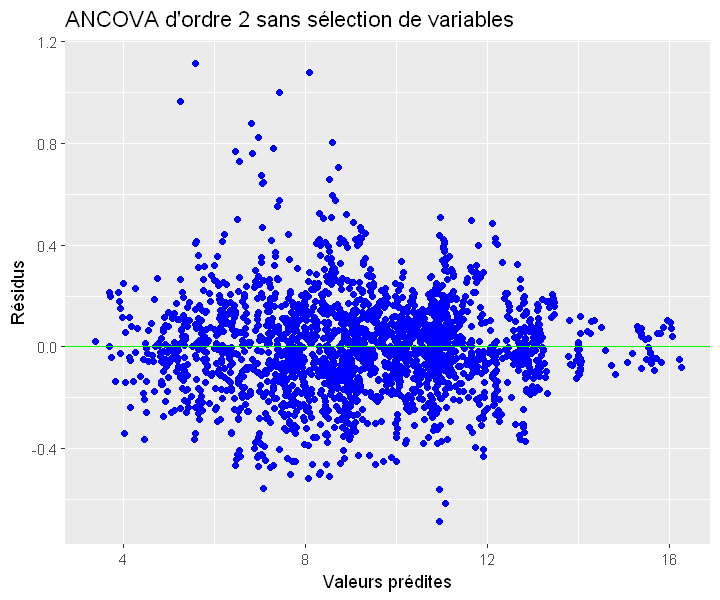

In [385]:
# Estimation du modèle avec intéraction d'ordre 2

reg.lm2 = aov(L_Value_CO2 ~ .^2 , data=data_appr) # ANCOVA  car qualitatif + quantitatif
res.lm2 = reg.lm2$residuals                     # Extraction des résidus
fit.lm2 = reg.lm2$fitted.values                 # Extraction des valeurs ajustées

gplot.res(fit.lm2,res.lm2,"ANCOVA d'ordre 2 sans sélection de variables")

In [386]:
# coef(reg.lm2)

CO2_pred_lm2 = predict(reg.lm2, data_test) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_lm2 =  mean(res.lm2^2) # Erreur quadratique moyenne 

r2_2 = summary(reg.lm2)$r.squared #cor(data_test$L_Value_CO2, CO2_pred_lm2)^2

paste0("Erreur quadratique moyenne avec intéraction ordre 2 : ", mse_lm2)
paste0("Coefficient R2 : ", r2_2)

[1] "Erreur quadratique moyenne avec intéraction ordre 2 : 0.0346637902553491"

[1] "Coefficient R2 : "

### Prédiciton de l'échantillon test 

#### Erreur de regression

In [387]:
pred.lm2= CO2_pred_lm2
e_reg_lm2 = sum((pred.lm2-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de régression avec lm', str(e_reg_lm2))

 num 0.0407
[1] "Erreur de régression avec lm"


#### Erreur de classification

In [388]:
table(pred.lm2>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   330    2
  TRUE     12  230

### Selection de variable avec pénalisation Lasso

De la même façon que précédement on cherche la meilleur valeur de lambda par validation croisée

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.002"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.001 en log vaut : -6.21460809842219"

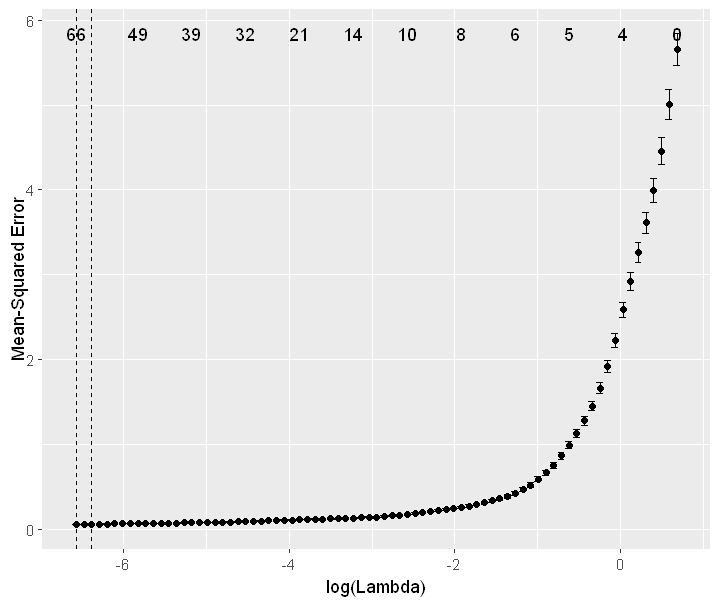

In [389]:
x.mat <- model.matrix(L_Value_CO2 ~ .^2 - 1, data = data_appr)# on récupère la matrice de design, on enlève l'intercept.
reg.lasso2 = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 1)

reg.lasso2.cv = cv.glmnet(y = data_appr$L_Value_CO2, x = x.mat)
autoplot(reg.lasso2.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.lasso2.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.lasso2.cv$lambda.min, 3), "en log vaut :",log(round(reg.lasso.cv$lambda.min, 3)))

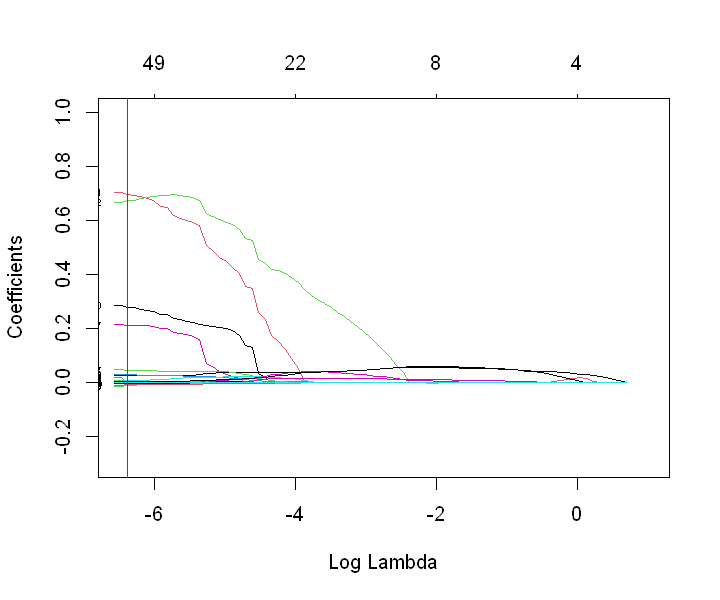

In [390]:
plot(reg.lasso2, xvar = "lambda", label = TRUE,xlim=c(-6.5,1),ylim=c(-0.3,1))
abline(v=log(reg.lasso2.cv$lambda.1se),col="red")  #avec min est ce que y'a pas bcp trop de variables ?

Nous gardons la la valeur des coefficeint pour lambda 1se. Ici les valeurs sont au niveau de la ligne rouge. 

**Liste des coefficients:**

In [391]:
coef_list <- coef(reg.lasso2.cv, s = "lambda.1se")
print(paste("Nombre de coefficients :", length(coef_list)))
print(paste("Nombre de coefficients enlevés :", sum(coef_list==0)))

[1] "Nombre de coefficients : 106"
[1] "Nombre de coefficients enlevés : 42"


La méthode permet de mettre 42 coefficeints à 0 sur les 1056 présents initialement. On simplifie de façon non négligeable notre modèle. 

In [392]:
fit.lasso2 = predict(reg.lasso2.cv, s = "lambda.1se", newx = x.mat)
res.lasso2 = data_appr$L_Value_CO2 - fit.lasso2

x.mat_test = model.matrix(L_Value_CO2 ~ .^2 - 1, data = data_test) 

pred.lasso2 = predict(reg.lasso2.cv, s = "lambda.1se", newx=x.mat_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_lasso2 = mean(res.lasso2^2) # Moyenne des carrés des résidus
r2_lasso2 = cor(data_test$L_Value_CO2, pred.lasso2)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_lasso2)
paste("Coefficient R2 : ", r2_lasso2)

[1] "MSE pour régression linéaire sans intéraction =  0.0531100143041922"

[1] "Coefficient R2 :  0.990066571735495"

### Prédiciton de l'échantillon test 

#### Erreur de régression

In [393]:
e_reg_lasso2 = sum((pred.lasso2-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de régression avec lm', str(e_reg_lasso2))

 num 0.0573
[1] "Erreur de régression avec lm"


#### Erreur de classification

In [394]:
table(pred.lasso2>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   332    7
  TRUE     10  225

### Selection de variable avec pénalisation Ridge

De la même façon que pour le modèle sans interaction on cherche la meilleur valeur de lambda par validation croisée. 

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.198"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.198"

[1] "Modèle correspondant à lambda1se = meilleur lambda par validation croisée : "

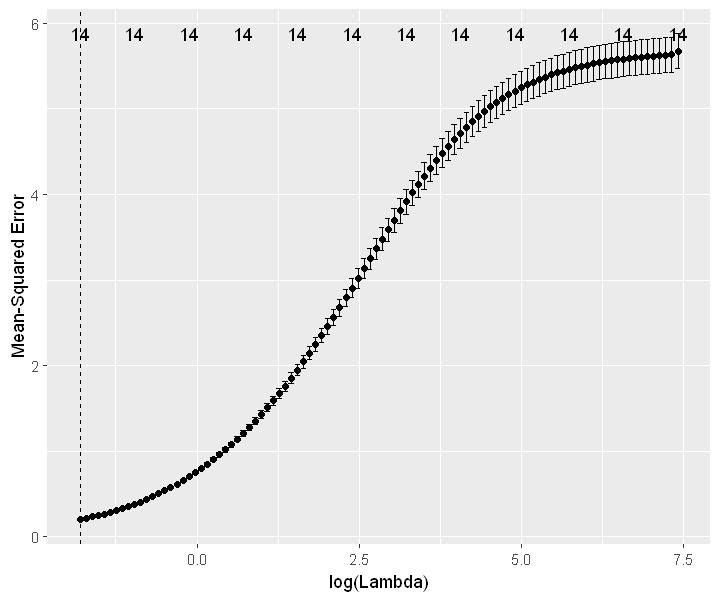

In [395]:
x.mat = model.matrix(L_Value_CO2 ~ .^2 - 1, data = data_appr) # on récupère la matrice de design, on enlève intercept.
reg.ridge2 = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 0)
options(repr.plot.width = 6, repr.plot.height = 5)
reg.ridge2.cv = cv.glmnet(y =data_appr$L_Value_CO2, x = x.mat, alpha = 0)

autoplot(reg.ridge.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.ridge2.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.ridge2.cv$lambda.min, 3))
paste("Modèle correspondant à lambda1se = meilleur lambda par validation croisée : ")
#coef(reg.ridge.cv, s="lambda.1se")

[1] "CV estimate of lambda : 0.198"

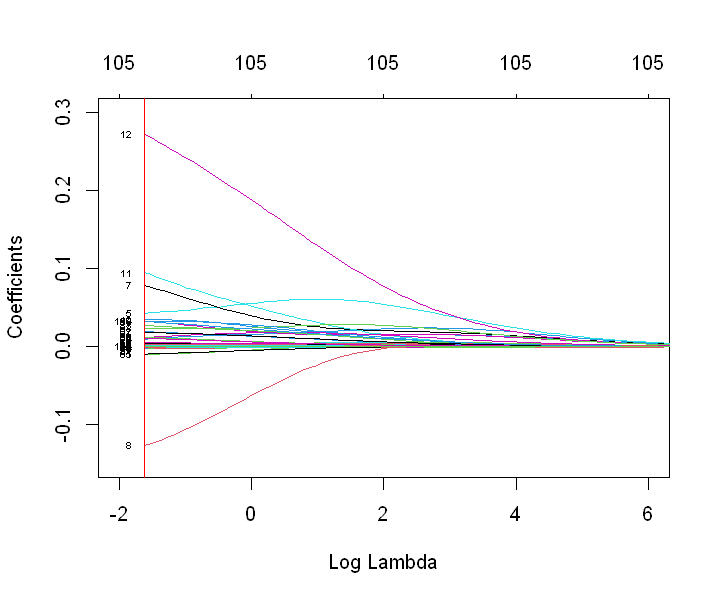

In [396]:
paste("CV estimate of lambda :", round(reg.ridge2.cv$lambda.1se, 3))
plot(reg.ridge2, xvar = "lambda", label = TRUE,xlim=c(-2,6),ylim=c(-0.15,0.3))
abline(v=log(reg.ridge2.cv$lambda.1se),col="red")

In [397]:
# Modèle Linéaire, Ridge, Lambda_min

fit.ridge2 = predict(reg.ridge2.cv, s = "lambda.1se", newx = x.mat)
res.ridge2 = data_appr$L_Value_CO2 - fit.ridge2

x.mat_test = model.matrix(L_Value_CO2 ~ .^2 - 1, data = data_test)

CO2_pred_ridge2 = predict(reg.ridge2.cv, s = "lambda.1se", newx=x.mat_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_ridge2 = mean(res.ridge2^2) # Moyenne des carrés des résidus
r2_ridge2 = cor(data_test$L_Value_CO2, CO2_pred_ridge2)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_ridge2)
paste("Coefficient R2 : ", r2_ridge2)

[1] "MSE pour régression linéaire sans intéraction =  0.094208418511027"

[1] "Coefficient R2 :  0.983135301468905"

### Prédicition de l'échantillon

#### Erreur de régression

In [398]:
pred.ridge2= CO2_pred_ridge2 
e_reg_ridge2 = sum((pred.ridge2-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de régression avec ridge', str(e_reg_ridge2))

 num 0.101
[1] "Erreur de régression avec ridge"


#### Erreur de classification

In [399]:
table(pred.ridge2>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   330   17
  TRUE     12  215

### Comparaison des méthodes 

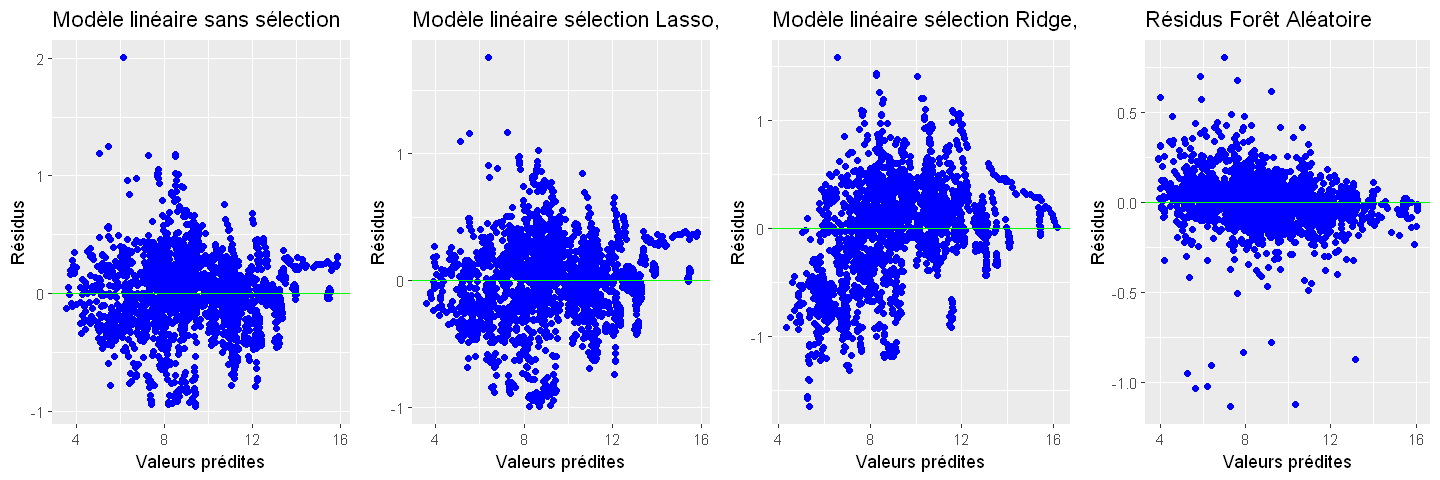

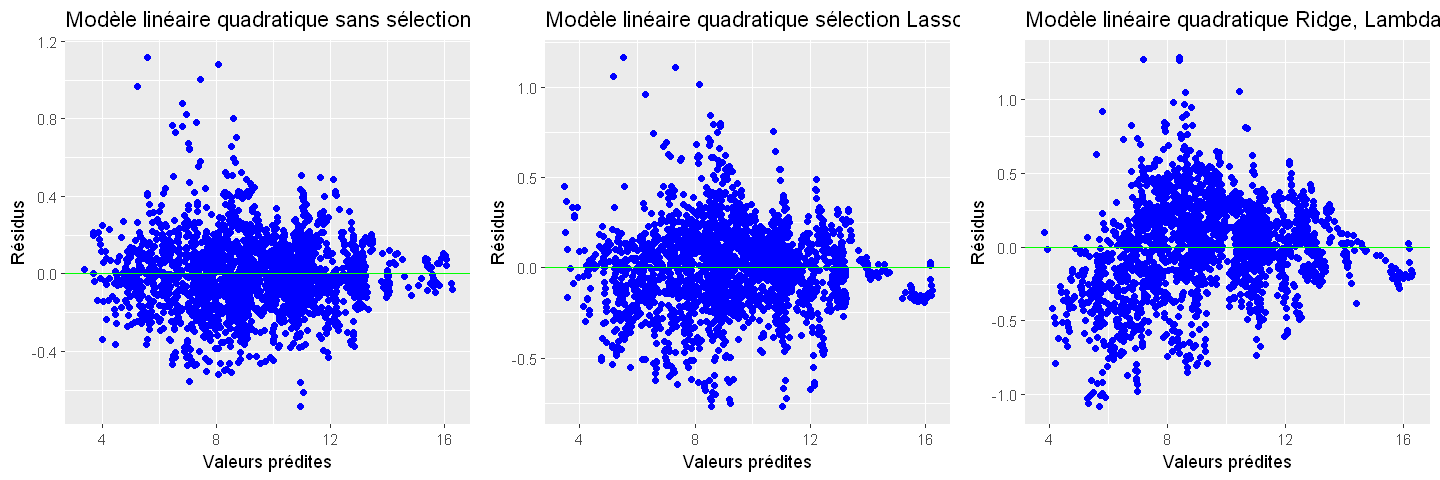

In [400]:
# Affichage
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
g1= gplot.res(fit.lm,res.lm,"Modèle linéaire sans sélection")
g3= gplot.res(fit.lasso, res.lasso, "Modèle linéaire sélection Lasso, Lambda_1se")
g4= gplot.res(fit.ridge, res.ridge, "Modèle linéaire sélection Ridge, Lambda_1se")
g10= gplot.res(fit.AIC, res.AIC, "Modèle linéaire sélection AIC")

g2= gplot.res(fit.lm2,res.lm2,"Modèle linéaire quadratique sans sélection")
g5= gplot.res(fit.lasso2, res.lasso2, "Modèle linéaire quadratique sélection Lasso, Lambda_1se")
g6= gplot.res(fit.ridge2, res.ridge2, "Modèle linéaire quadratique Ridge, Lambda_1se")

grid.arrange(g1,g3,g4,g7,ncol=4)
grid.arrange(g2,g5,g6,ncol=3)

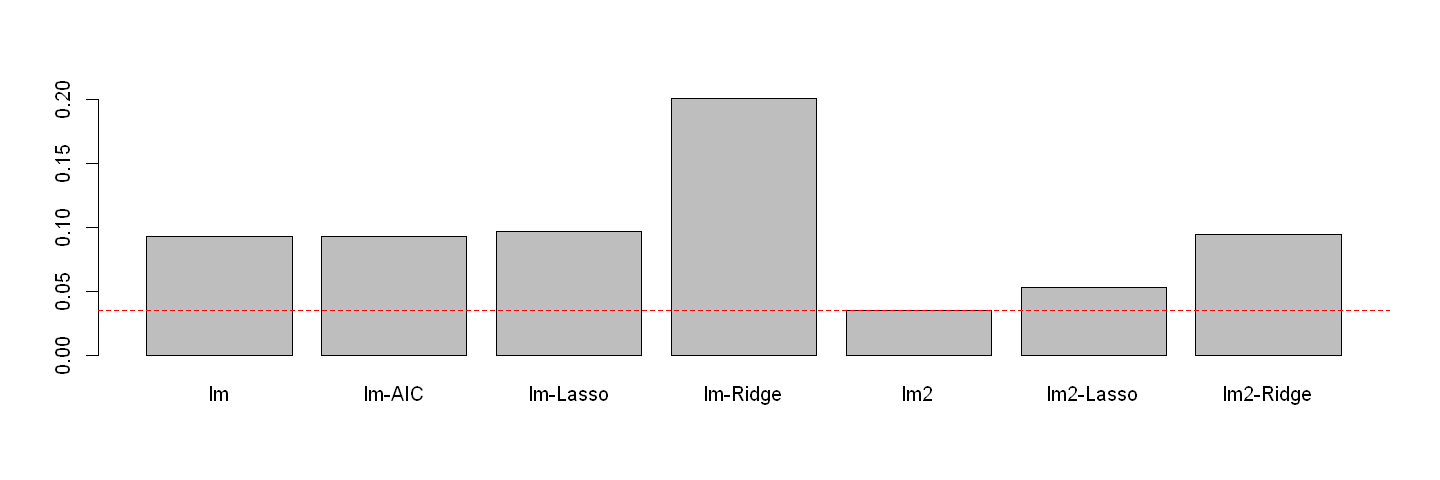

In [401]:
method_lin <- c("lm","lm-AIC","lm-Lasso","lm-Ridge","lm2","lm2-Lasso","lm2-Ridge")

MSE_tab <- c(mse_lm, mse_AIC,mse_lasso, mse_ridge,mse_lm2,mse_lasso2,mse_ridge2)
barplot(MSE_tab,names.arg = method_lin)
min_MSE = min(MSE_tab)
abline(h = min_MSE, col = "red", lty = 2) 

***Interpretation***

La méthode de regression linéaire avec interaction est la plus efficasse des méthodes linéaires. 

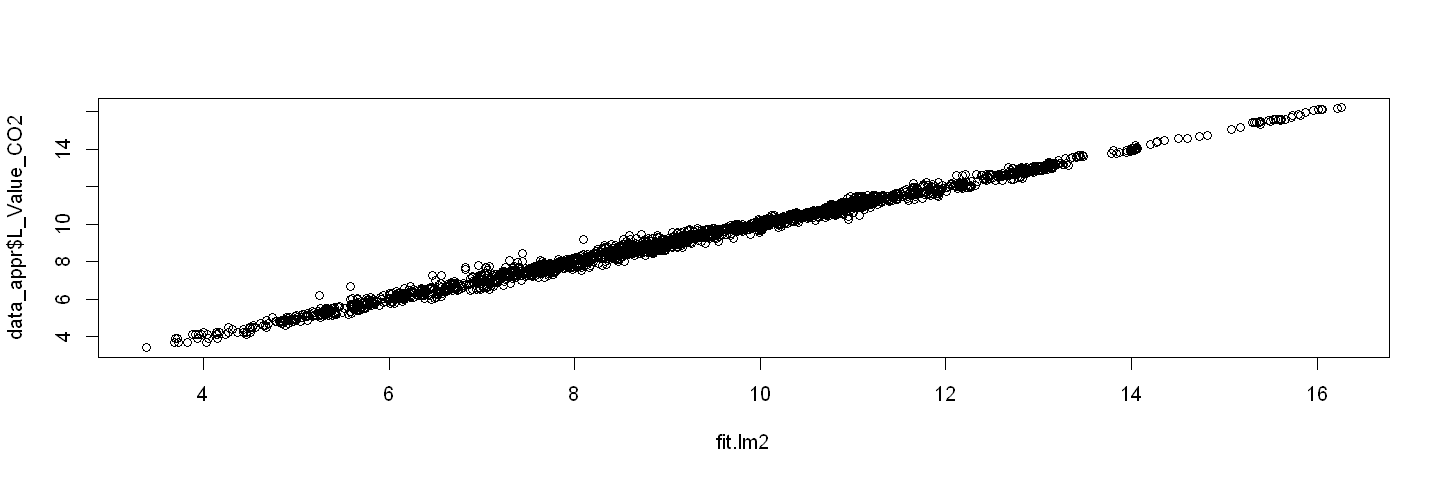

In [402]:
plot(fit.lm2,data_appr$L_Value_CO2)

## 2 - Analyse discriminante

## SVR

Le but de la SVR est de minimiser l'équation suivante : $\frac{1}{2}||w||^2_2 + C\sum(\epsilon_i+\epsilon_i')$

In [403]:
library('MASS')
library('class') # pour kNN
library('caret')
library('e1071')
library(glmnet)
library(ROCR)

### Choix des paramètres 

Il nous faut choisir le kernel, le paramère de régularisation $\epsilon$.
- Le kernel détermine la nature de la transformation des données pour capturer des relations non linéaires. On choisit de prendre un noyau Gaussien car nous avons des données quantitatives et nous avons effectué une transformation logarithmique pour centrer les données. 
-  C détermine la tolérance de mauvaises classifications. Si C augmente, le nombre de mauvaises classification diminue et inversement. Ici, il est calibré par validation croisée. 
- Epsilon ($\epsilon$) représente la tolérance autour des marges. On applique pas de pénalité à cete endroit-là.

In [404]:
#Choix des meilleurs paramètres avec tune
svm.reg.tune = tune.svm(L_Value_CO2 ~ ., data = data_appr, cost = c(20), 
    gamma = seq(0.02, 0.1, by = 0.02))

svm.reg = svm(L_Value_CO2 ~ ., data = data_appr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

On retiendra les paramètres : $\epsilon$ = 0.06 et C = 7

In [405]:
svm.reg = svm(L_Value_CO2 ~ ., data = data_appr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

### Affichage des résidus 

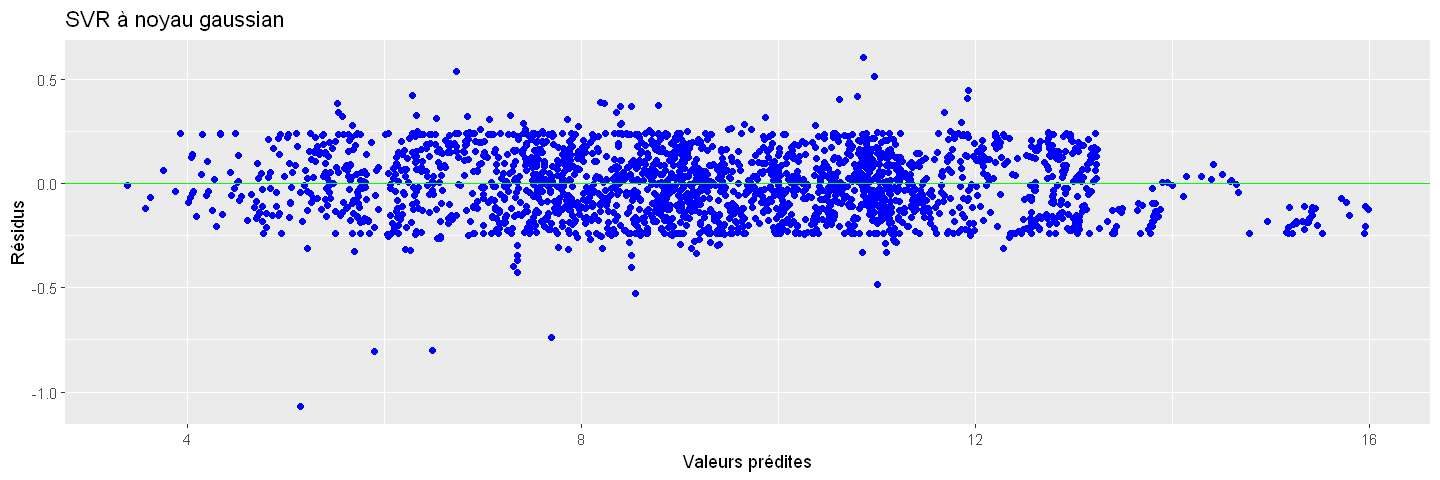

In [406]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-data_appr[,"L_Value_CO2"]

gplot.res(fit.svmr,res.svmr,"SVR à noyau gaussian")

In [407]:
x.mat_test = model.matrix(L_Value_CO2 ~ . - 1, data = data_test)

CO2_pred_svr = predict(svm.reg, data_test) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_svr = mean(res.svmr^2)# Erreur quadratique moyenne 
r2_2 = cor(data_test$L_Value_CO2, CO2_pred_svr)^2

paste0("Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec svr : ", mse_svr)
paste0("Coefficient R2 : ", r2_2)

[1] "Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec svr : 0.0244499697346797"

[1] "Coefficient R2 : 0.995200009758453"

### Prévision de l'échantillon test 

#### Erreur de régression

In [408]:
pred.svmr=predict(svm.reg,newdata=data_test)
e_reg_smv = sum((pred.svmr-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de regression de la SVM: ', str(e_reg_smv) )

 num 0.0281
[1] "Erreur de regression de la SVM: "


#### Erreur de classification

In [409]:
table(pred.svmr>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   338    5
  TRUE      4  227

#### Affichage des estimations

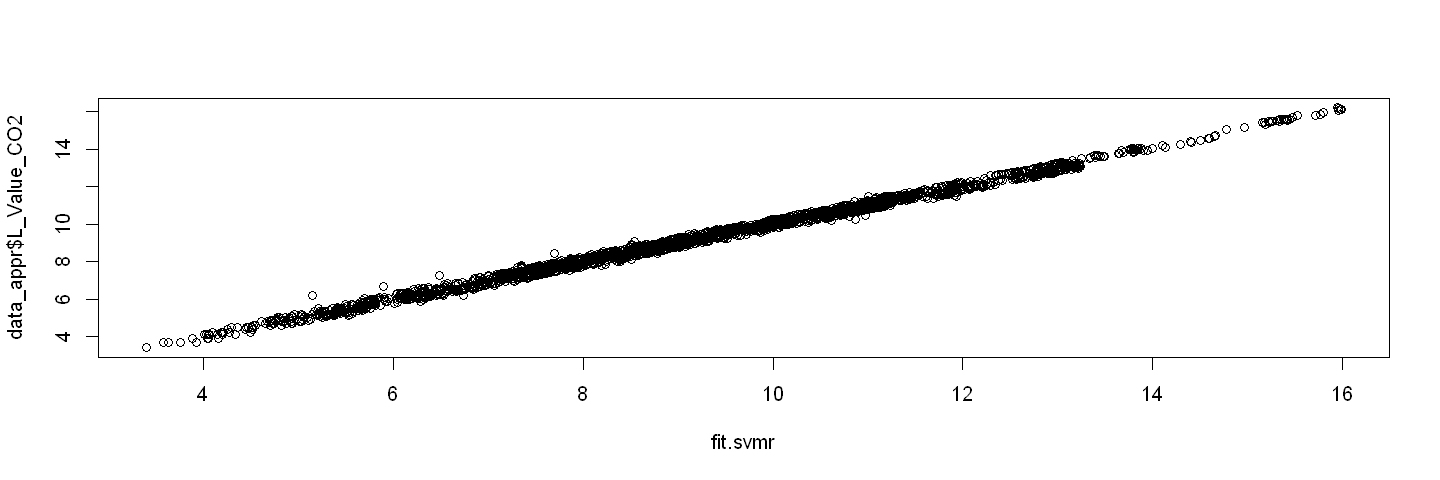

In [410]:
plot(fit.svmr,data_appr$L_Value_CO2)

Nous obtenons une droite de coéficient directeur 1. Cela traduit une bonne prédiciotn. Les valeurs prédites sont proches/égales aux valeurs réelles. On observe tout de même des points plus éloignés de le droite, ce sont des erreurs. 

## Arbre optimal

C'est une méthode non paramétrique qui permet de construire des estimateurs en multidimension. 

In [411]:
library('rpart') 
library(rpart.plot)
library(partykit)

#### Reherche de la valeur de cp pour minimiser l'erreur et construction de l'arbre
- cp est le paramètre de complexité qui contrôle la croissance de l'arbre en utilisant le critère de coût-complexité. Une valeur plus grande de cp entraîne un arbre plus petit et plus simple, tandis qu'une valeur plus petite peut conduire à un arbre plus complexe et surajusté.

Choix de cp par validation croisée 'CVerr'

In [412]:
tree.reg=rpart(L_Value_CO2~.,data=data_appr,control=rpart.control(cp=0.001))

In [413]:
xmat<-xpred.rpart(tree.reg,xval=10) 
CVerr<-apply((xmat-data_appr[,"L_Value_CO2"])^2,2,sum)
print(paste('cp=',as.numeric(attributes(which.min(CVerr))$names)))
tree.reg=rpart(L_Value_CO2~.,data=data_appr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

[1] "cp= 0.001012519"


#### Affichage de l'arbre

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


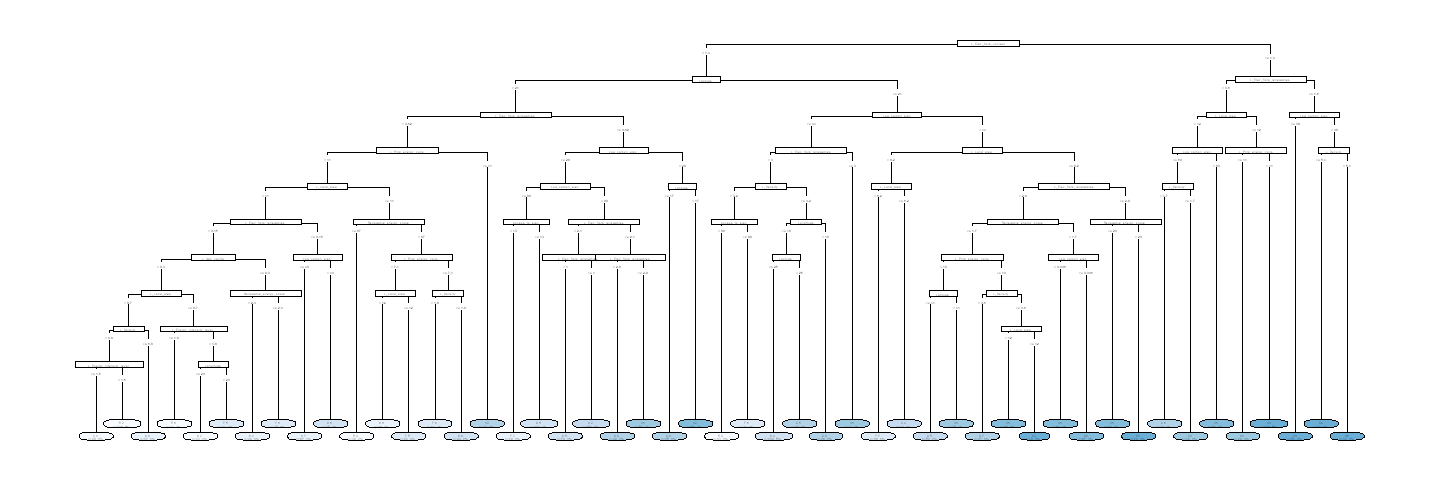

In [414]:
par(mfrow = c(1, 1), mar = c(8, 8, 8, 8))
rpart.plot(tree.reg, type = 5, extra = 101)

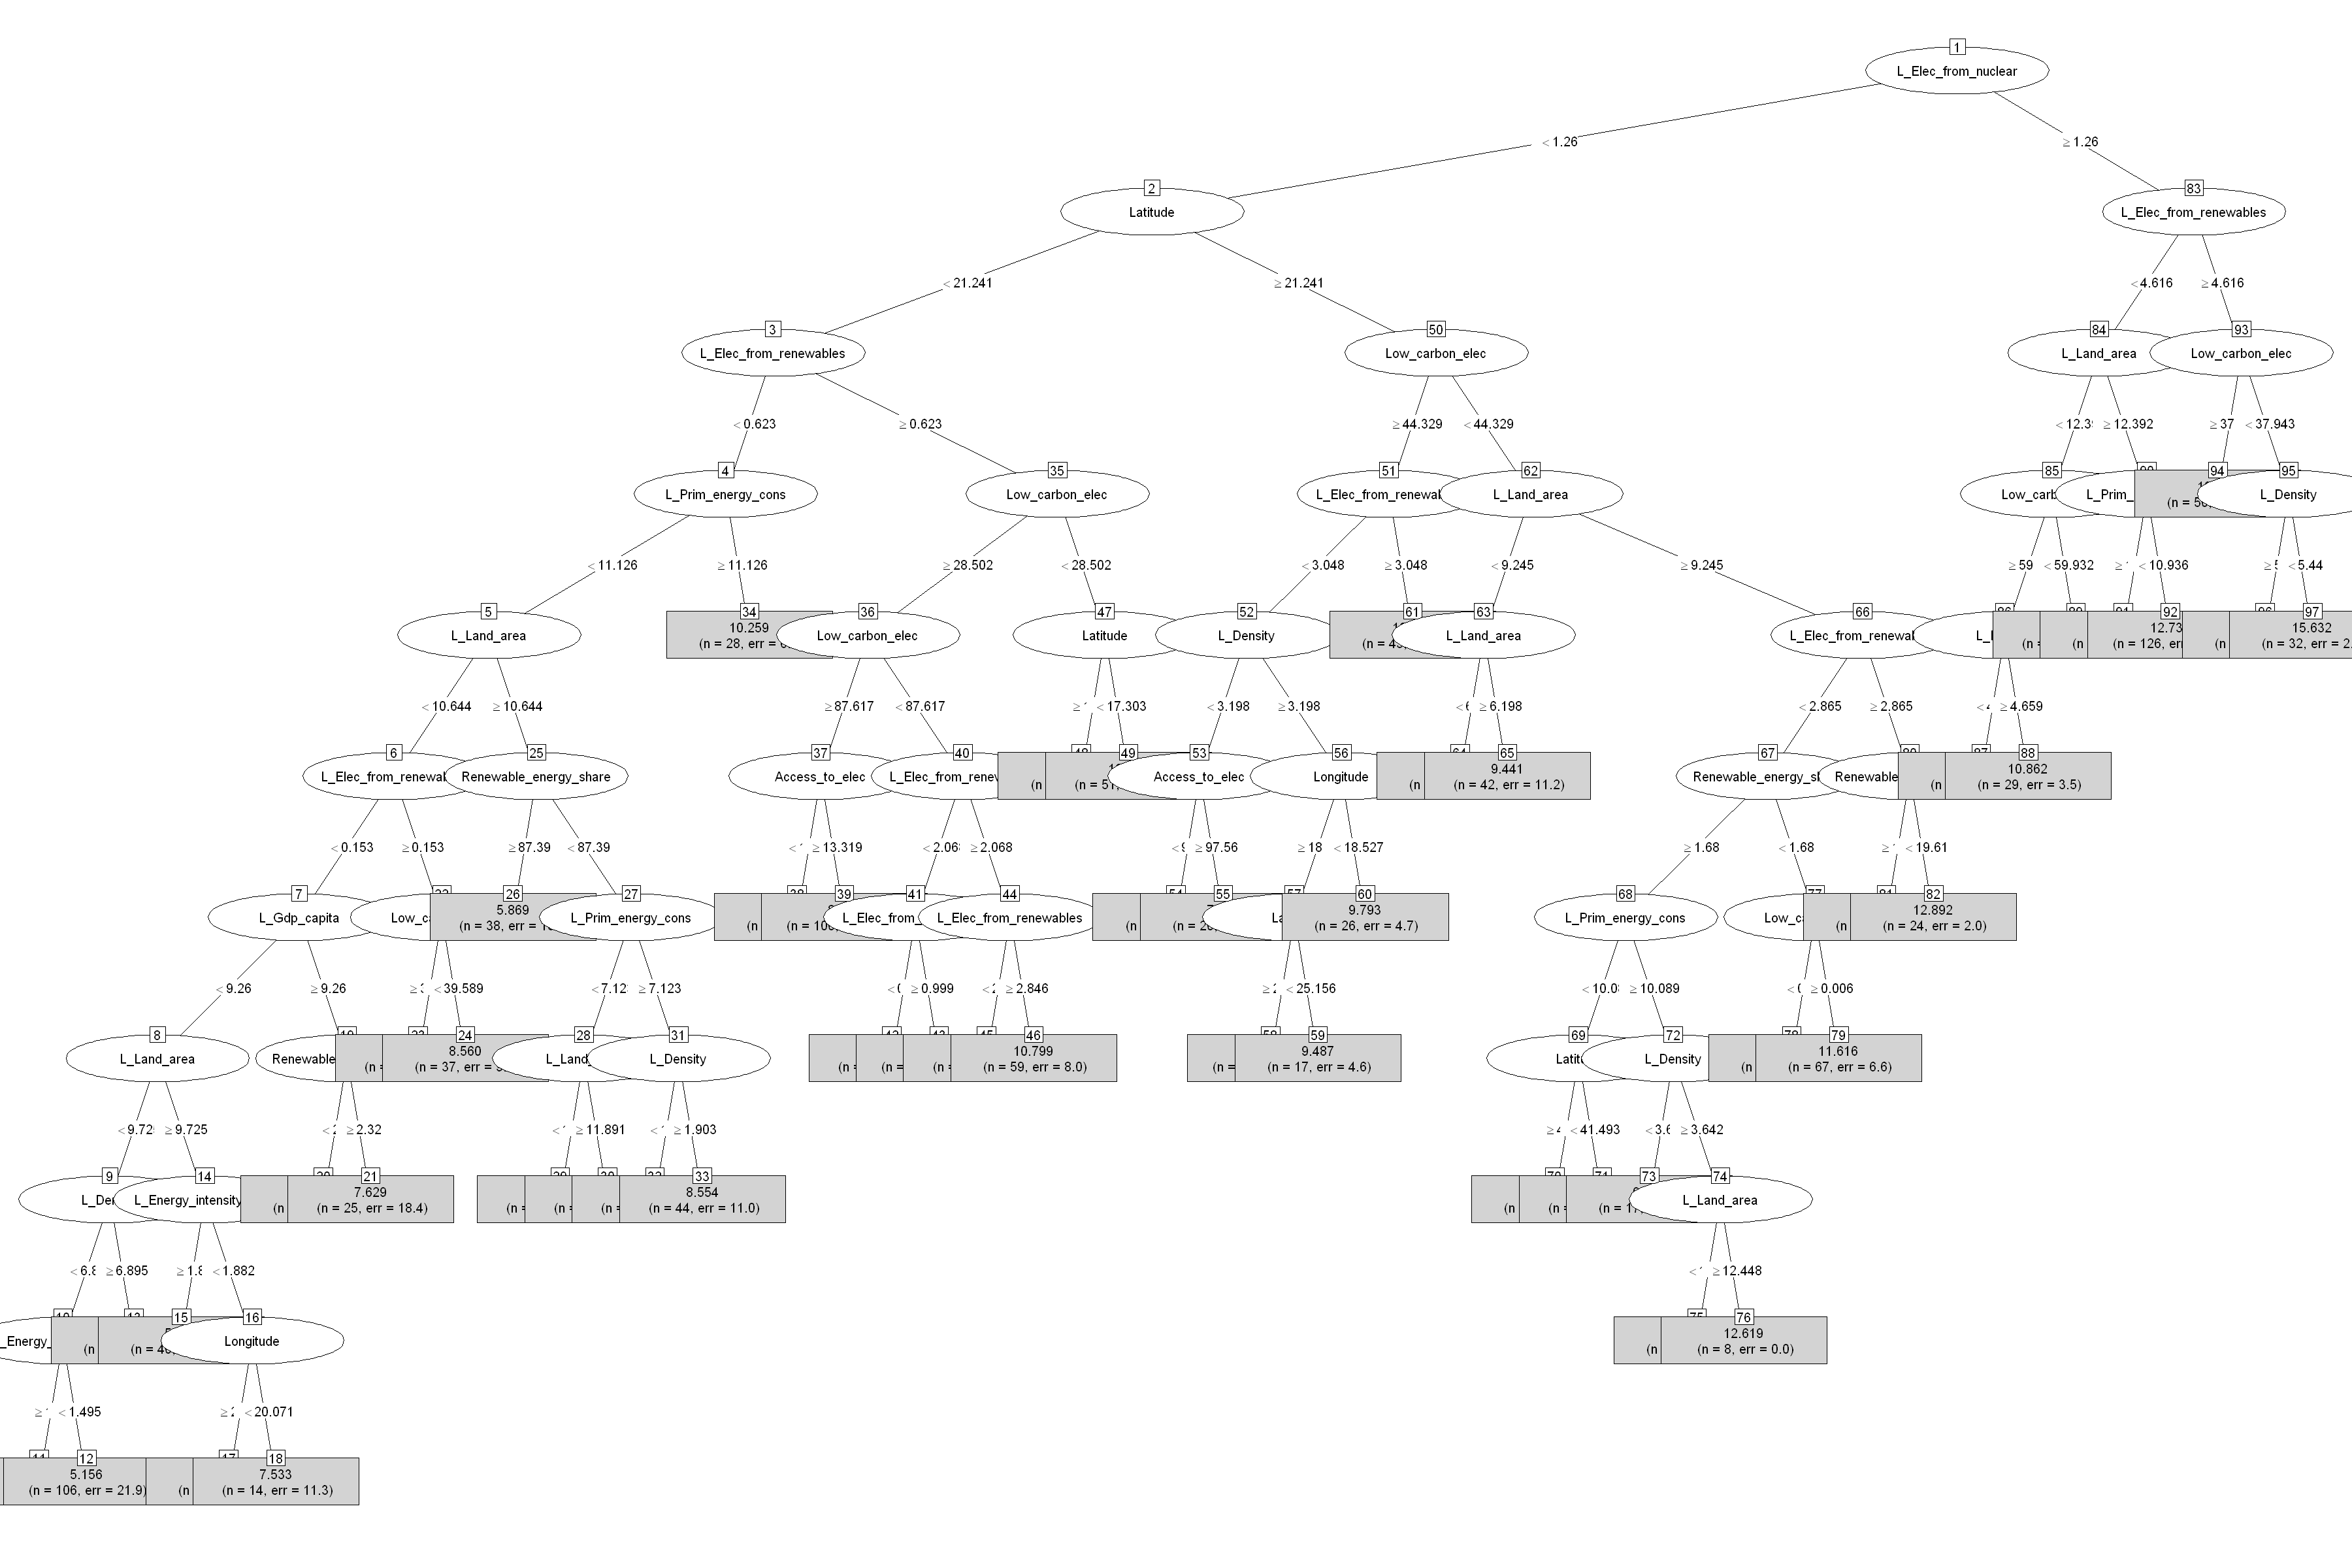

In [415]:
library(partykit)
options(repr.plot.width = 30, repr.plot.height = 20)
plot(as.party(tree.reg), type="simple")

***Commentaire :*** 
La variable L_Elec_from_nuclear est la variable contribuant le plus à l'interprétation. Elle créer la première séparation de notre jeux de données.

#### Affichage des résidus 

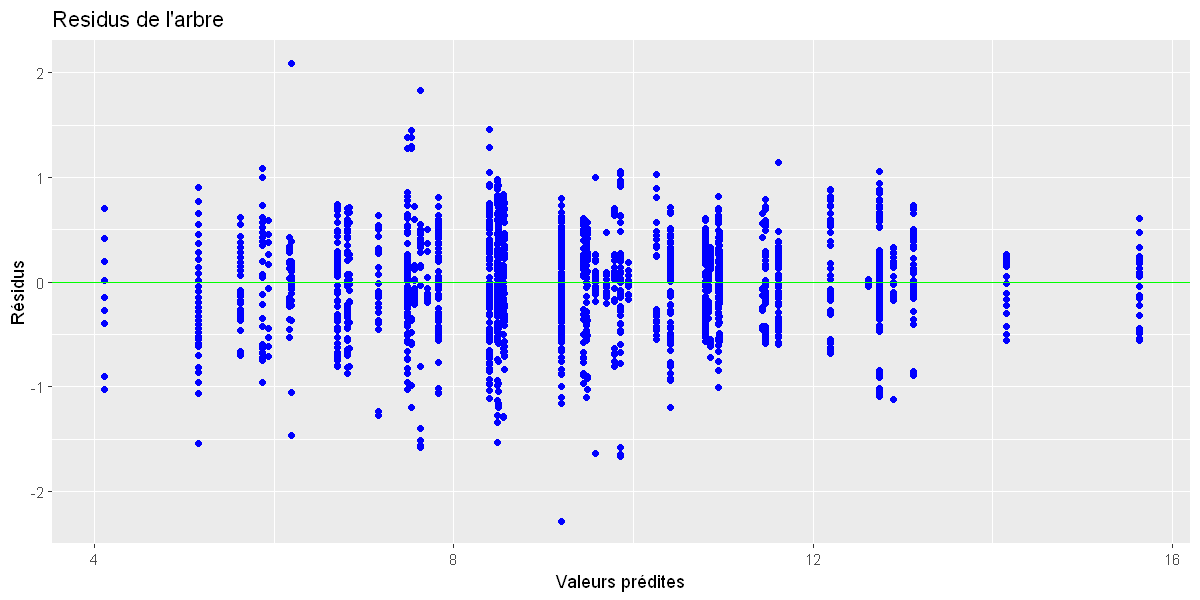

In [416]:
options(repr.plot.width = 10, repr.plot.height = 5)

fit.tree=predict(tree.reg)
res.tree=fit.tree-data_appr[,"L_Value_CO2"]
gplot.res(fit.tree,res.tree,"Residus de l'arbre")

In [417]:
pred.treer = predict(tree.reg, data_test) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_tree = mean(res.tree^2)# Erreur quadratique moyenne 
r2_2 = cor(data_test$L_Value_CO2, pred.treer)^2

paste0("Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec arbre : ", mse_tree)
paste0("Coefficient R2 : ", r2_2)

[1] "Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec arbre : 0.203125273190291"

[1] "Coefficient R2 : 0.956439396638331"

***Interprétation:***

Les résidus de l'arbre sont inégalements centrés et de variance inégale. Le résultat n'est pas parfaitement satisfaisant. 

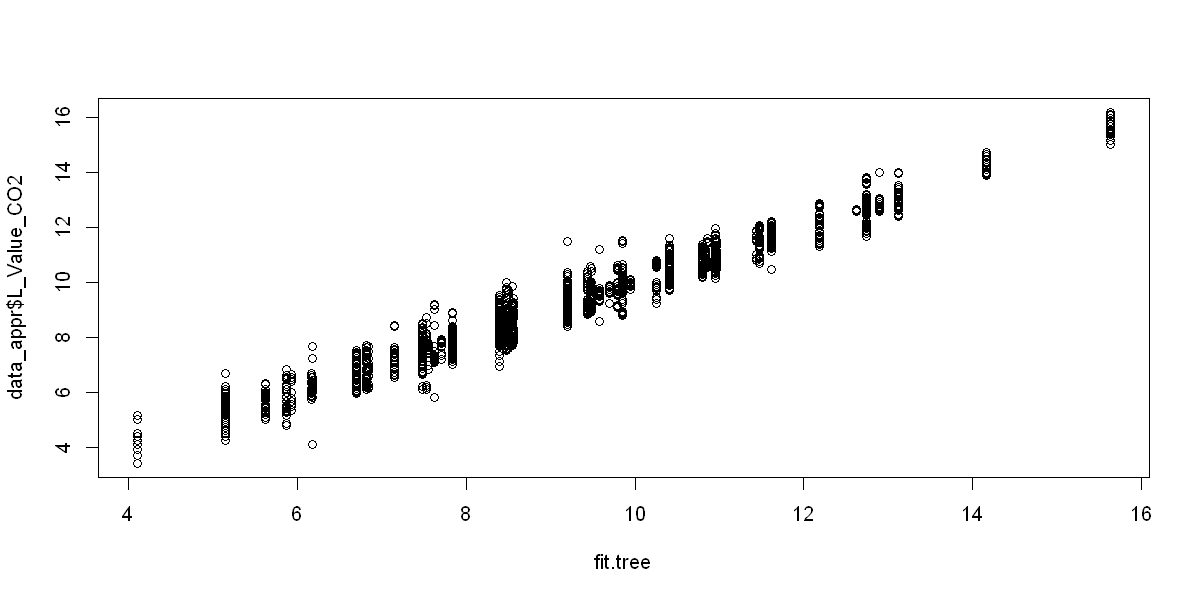

In [418]:
plot(fit.tree,data_appr$L_Value_CO2)

On voit que le coefficent directeur de cette droite est proche de 1, mais ne semble pas si satisfaisant. Il semble y avoit pas mal d'erreurs de prédictions. 

### Prévision de l'échantillon test

##### Erreur de regression 

In [419]:
e_reg_treer = sum((pred.treer-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de regression arbre : ', str(e_reg_treer) )

 num 0.25
[1] "Erreur de regression arbre : "


#### Erreur de classification

In [420]:
confusionMatrix(as.factor(pred.treer>10),as.factor(data_test[,"L_Value_CO2"]>10))$table

          Reference
Prediction FALSE TRUE
     FALSE   328   17
     TRUE     14  215

## Forêt aléatoire

Pour les forêts aléatoire, il y a différents paramètres à prendre en compte : 
- Le nombre d'arbre de décision. Un nombre plus élevé d'arbres améliore la performance du modèle, mais cela augmente  le temps d'entraînement. 
- La profondeur maximale de chaque arbre de décision. Une profondeur plus élevée peut conduire à un surapprentissage, tandis qu'une profondeur plus faible peut entraîner un sous-apprentissage.
- Le nombre minimum d'échantillons nécessaire pour diviser un noeud. Une valeur plus élevée peut permettre d'éviter le surapprentissage. 
- Le nombre minimum d'échantillons requis pour former une feuille. 
- Nombre maximum de variables à prendre en compte pour chaque division de l'arbre 'mtry'
- Le critère de fonctionnement 'criterion'. Il spécifie la fonction utilisée pour mesurer la qualité de la fraction d'un noeud. 

In [421]:
library(randomForest)
library(ggRandomForests)

#### Choix de mtry par validation croisée

In [422]:
mtry_values <- c(2, 4, 6, 8, 10)  # Liste des valeurs de mtry à évaluer

# Définir le contrôle de la validation croisée
train_control <- trainControl(
  method = "cv",      
  number = 5,        
  verboseIter = TRUE  
)

# Exécuter la recherche par grille avec validation croisée
model <- train(
  L_Value_CO2 ~ .,         
  data = data_appr,        
  method = "rf",          
  trControl = train_control, 
  tuneGrid = expand.grid(mtry = mtry_values) 
)

# Afficher les résultats de la recherche par grille
print(model$bestTune)

+ Fold1: mtry= 2 
- Fold1: mtry= 2 
+ Fold1: mtry= 4 
- Fold1: mtry= 4 
+ Fold1: mtry= 6 
- Fold1: mtry= 6 
+ Fold1: mtry= 8 
- Fold1: mtry= 8 
+ Fold1: mtry=10 
- Fold1: mtry=10 
+ Fold2: mtry= 2 
- Fold2: mtry= 2 
+ Fold2: mtry= 4 
- Fold2: mtry= 4 
+ Fold2: mtry= 6 
- Fold2: mtry= 6 
+ Fold2: mtry= 8 
- Fold2: mtry= 8 
+ Fold2: mtry=10 
- Fold2: mtry=10 
+ Fold3: mtry= 2 
- Fold3: mtry= 2 
+ Fold3: mtry= 4 
- Fold3: mtry= 4 
+ Fold3: mtry= 6 
- Fold3: mtry= 6 
+ Fold3: mtry= 8 
- Fold3: mtry= 8 
+ Fold3: mtry=10 
- Fold3: mtry=10 
+ Fold4: mtry= 2 
- Fold4: mtry= 2 
+ Fold4: mtry= 4 
- Fold4: mtry= 4 
+ Fold4: mtry= 6 
- Fold4: mtry= 6 
+ Fold4: mtry= 8 
- Fold4: mtry= 8 
+ Fold4: mtry=10 
- Fold4: mtry=10 
+ Fold5: mtry= 2 
- Fold5: mtry= 2 
+ Fold5: mtry= 4 
- Fold5: mtry= 4 
+ Fold5: mtry= 6 
- Fold5: mtry= 6 
+ Fold5: mtry= 8 
- Fold5: mtry= 8 
+ Fold5: mtry=10 
- Fold5: mtry=10 
Aggregating results
Selecting tuning parameters
Fitting mtry = 8 on full training set
  mtry
4    8


Nous prendrons donc mtry = 6, nous posons ntree = 500 (suffisement pour que le modèle soit précit mais pas trop pour limiter le temps de calcul). Nous prenons le critère classique 'gini' et choisissons un minimim de 2 échantillons pour diviser un noeud et 1 feuille minimum par éhantillon (faibles pour favoriser la précision dy modèle). 

In [423]:
fa.reg=randomForest(L_Value_CO2 ~., data=data_appr[,-1],xtest=data_test[,-c(1,9)],ytest=data_test[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE,mtry = 6,critère = 'gini',min_samples_split=2, min_samples_leaf=1) 

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02286     0.40 |  0.01615     0.28 |
 100 |  0.02012     0.35 |  0.01589     0.28 |
 150 |  0.01901     0.34 |  0.01532     0.27 |
 200 |  0.01857     0.33 |  0.01508     0.26 |
 250 |  0.01811     0.32 |  0.01528     0.27 |
 300 |  0.01797     0.32 |  0.01512     0.26 |
 350 |  0.01772     0.31 |  0.01512     0.26 |
 400 |  0.01762     0.31 |  0.01518     0.26 |
 450 |   0.0176     0.31 |  0.01511     0.26 |
 500 |  0.01764     0.31 |  0.01503     0.26 |


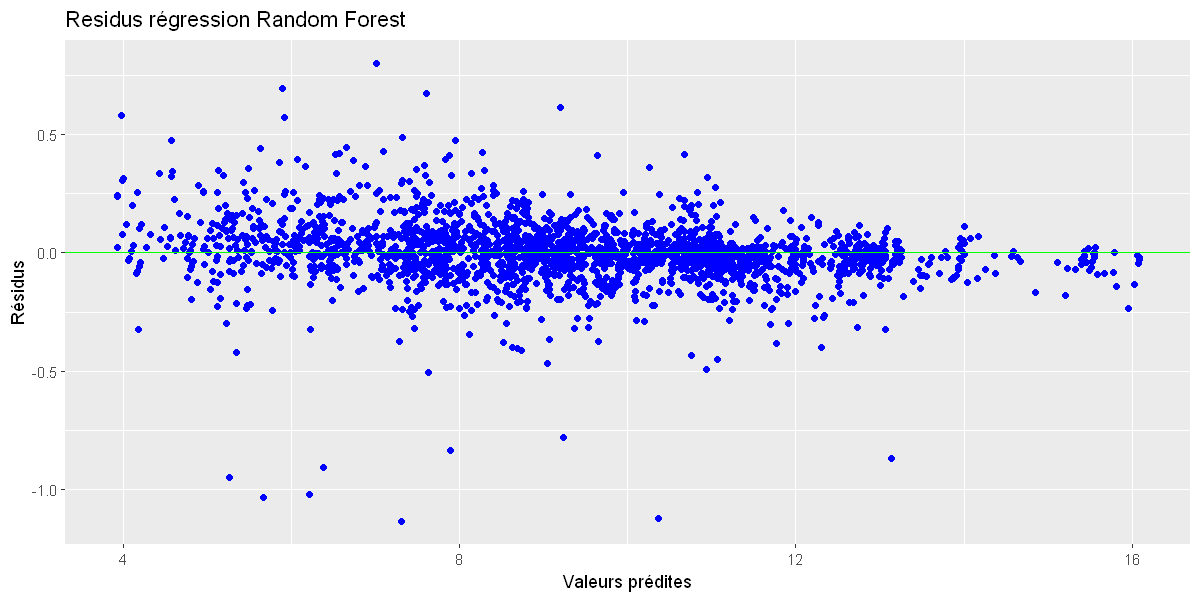

In [424]:
fit.far=fa.reg$predicted
res.far=fit.far-data_appr[,"L_Value_CO2"]
gplot.res(fit.far,res.far,titre="Residus régression Random Forest")

In [425]:
CO2_pred_fa = fa.reg$test$predict

mse_fa = mean(res.far^2)# Erreur quadratique moyenne 
r2_boost = cor(data_test$L_Value_CO2, CO2_pred_fa)^2

paste0("Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec foret aléatoire : ", mse_fa)
paste0("Coefficient R2 : ", r2_boost)

[1] "Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec foret aléatoire : 0.0176440656954319"

[1] "Coefficient R2 : 0.997621873616293"

***Interprétation:***

Les résidus sont mals centrés et de variance importante principalement sur les valeurs inférieurs à 10. 

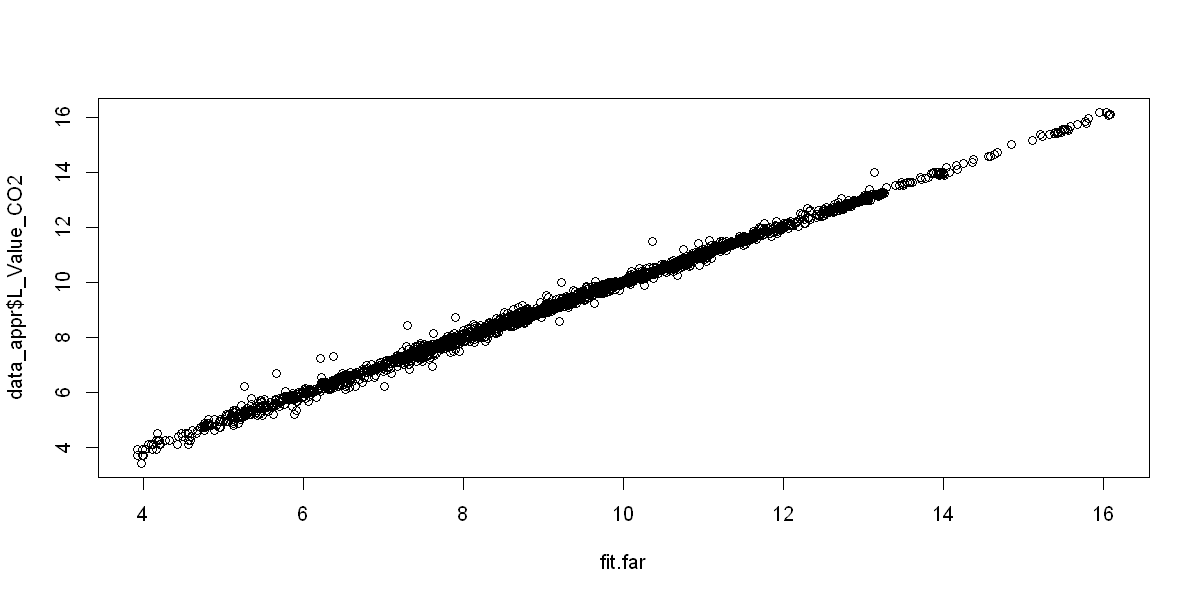

In [426]:
plot(fit.far,data_appr$L_Value_CO2)

La droite semble est plutot proche d'une droite de la forme x=y. Or un certains nombre de points sortent de cette tendance traduisant la présence d'erreurs. 

### Importance des variables 

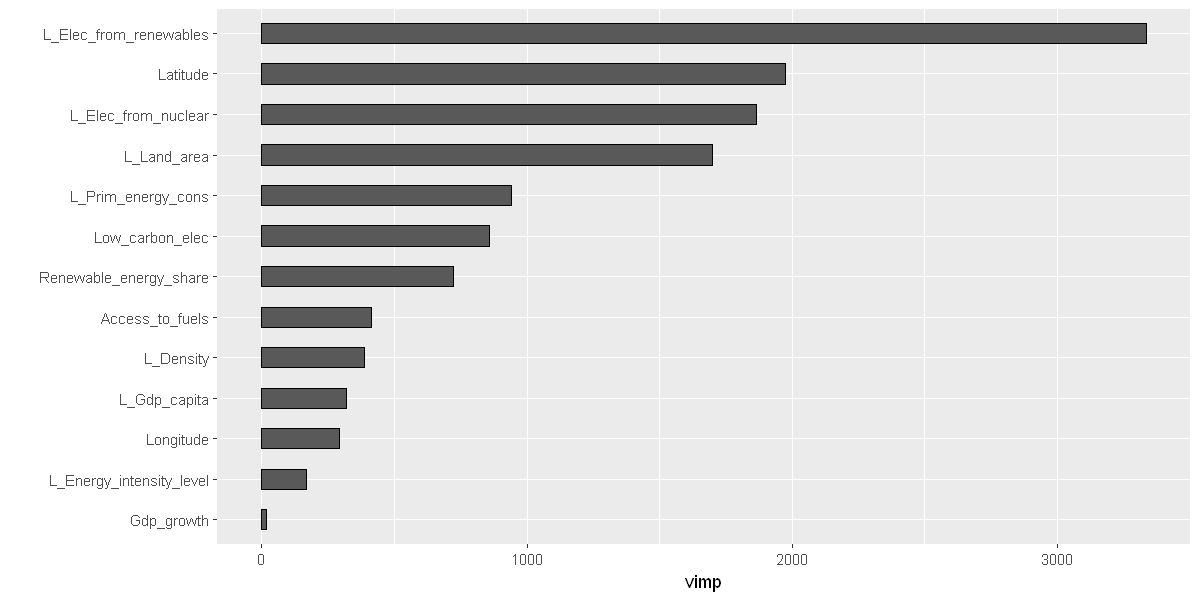

In [427]:
plot(gg_vimp(fa.reg))

***Interprétatin:***

L_Elec_from_renawables , L_Land_Area ... sont les variables participant le plus à l'interprétation. Cela est cohérant avec l'ACP que nous avons fait précédement : ce sont des variables qui participaient beaucoup au dimensions 1 et 2 expliqaunt plus de 50% de la variance du jeux de données. 

### Prévison de l'échantillon test 

#### Erreur de régression 

In [428]:
pred.far=fa.reg$test$predicted
# Erreur quadratique moyenne de prévision
e_reg_far=sum((pred.far-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de regression forêt aléatoire: ', str(e_reg_far) )

 num 0.015
[1] "Erreur de regression forêt aléatoire: "


#### Erreur de classificaiton 

In [429]:
table(pred.far>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   339    3
  TRUE      3  229

## Boosting 

La méthode boosting nécéssite le choix de plusieurs paramètres : 
- Le taux d'apprentissage, il contrôle la contribution de chaque arbre à la mise à jour du modèle.
- Le nombre d'arbres pris en compte. Une valeur plus élevée de n_estimators peut améliorer les performances du modèle, mais peut également entraîner un temps d'entraînement plus long et un risque de surapprentissage. 
- La profondeur maximale des arbres, cela contrôle la complexité des arbres. 
- La distribution pour la sortie du modèle que nous choisirons gaussienne car elle est adaptée pour la régression
- cv.folds spécifie le nombre de folds à utiliser dans la validation croisée pour évaluer les performances du modèle. On le choisit à 10. 
- Le nombre d'observation requis dans un noeud.

Nous ferons une validation croisée pour choisir ces paramètres. 

In [430]:
library(gbm)

#### Recherche des meilleurs paramètres

Nous ferons la validation crisée avec 200 arbres sinon le processus est trop long. 

In [431]:
library(gbm)
library(caret)

# Hyperparamètres à tester
param_grid <- expand.grid(
  interaction.depth = c(7, 10,15,20),  # Valeurs de la profondeur de l'arbre
  shrinkage = c(0.01, 0.03),           # Valeurs du taux d'apprentissage
  n.minobsinnode = c(5, 10, 20),       # Valeurs du nombre minimum d'observations par nœud
  n.trees = 200                        # Valeur du nombre d'arbres
)

# Contrôle de la validation croisée
train_control <- trainControl(
  method = "cv",      # Utiliser la validation croisée
  number = 5          # Nombre de folds
)

model <- train(
  L_Value_CO2 ~ .,
  data = data_appr,
  method = "gbm",
  trControl = train_control,
  tuneGrid = param_grid,
  verbose = FALSE
)


In [432]:
print(model$bestTune)

   n.trees interaction.depth shrinkage n.minobsinnode
22     200                20      0.03              5


In [433]:
boost.reg = gbm(L_Value_CO2 ~ ., data = data_appr, distribution = "gaussian", n.trees = 4000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)

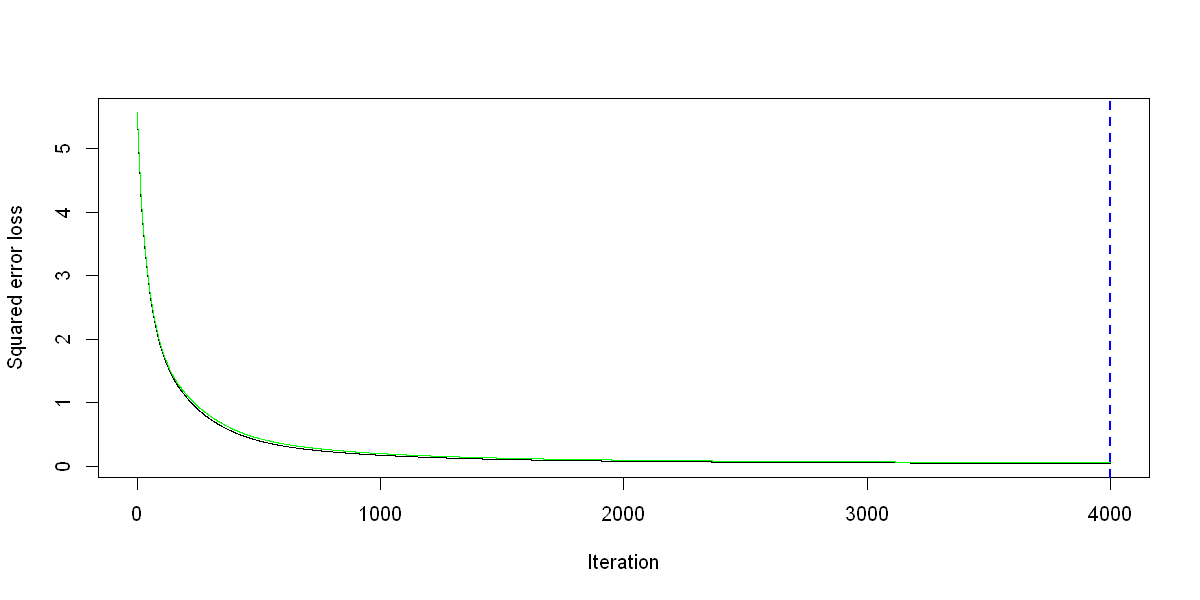

In [434]:
options(repr.plot.width = 10, repr.plot.height = 5)
best.iter=gbm.perf(boost.reg,method="cv")

***Interpretation :***

On voit que à 3000 arbres l'erreur ne baisse que très peu. Nous garderons donc 4000 arbres pour avoir une bonne prédiction mais éviter le temps de calcul trop long si on gardait plus d'arbres.
On gardera une profondeur des arbres de 10, un taux d'apprentissage de 0.03 et 5 observations par noeud. 

Using 4000 trees...




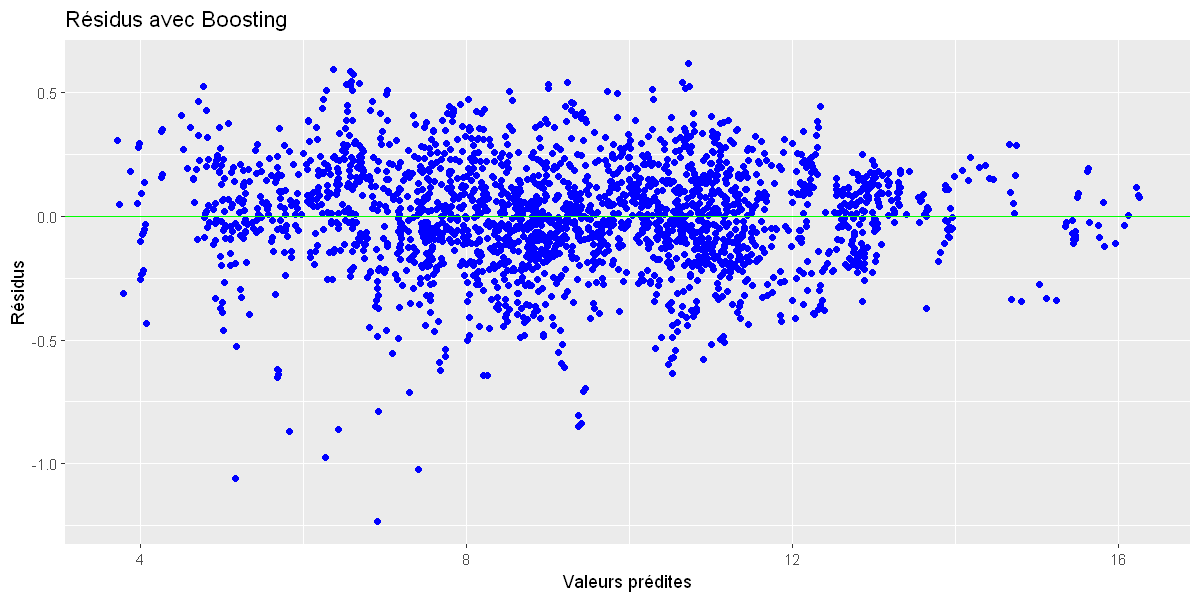

In [435]:
fit.boost=predict(boost.reg,data=data_appr)
res.boost=fit.boost-data_appr[,"L_Value_CO2"]
gplot.res(fit.boost,res.boost,titre="Résidus avec Boosting")

In [436]:
CO2_pred_boost = predict(boost.reg, data_test)

mse_boost = mean(res.boost^2)# Erreur quadratique moyenne 
r2_boost= cor(data_test$L_Value_CO2, CO2_pred_boost)^2

paste0("Erreur quadratique moyenne boosting : ", mse_boost)
paste0("Coefficient R2 : ", r2_boost)

Using 4000 trees...




[1] "Erreur quadratique moyenne boosting : 0.0454017762554361"

[1] "Coefficient R2 : 0.990957478919216"

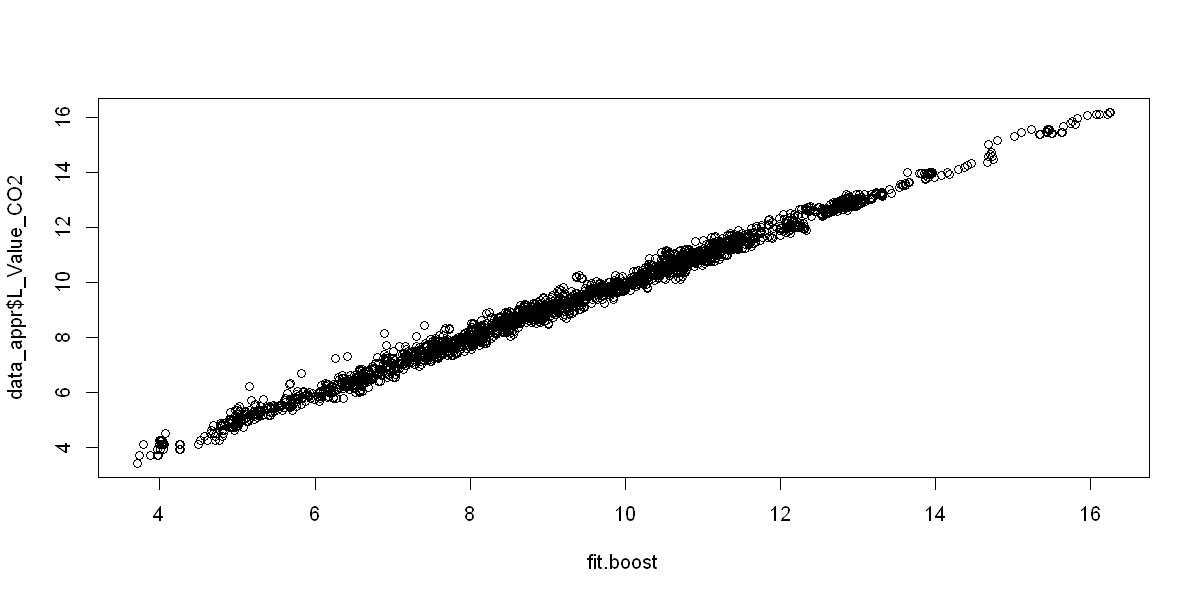

In [437]:
plot(fit.boost,data_appr$L_Value_CO2)

Bon coéfficient directeur mais la droite 'épaisse' montre une une impressision récurante. On voit des erreurs : points qui s'éloignent de la droite. 

### Prévision de l'échantillon test

#### Erreur de régression 

In [438]:
pred.boostr=predict(boost.reg,newdata=data_test,n.trees=best.iter)
e_reg_boostr=sum((pred.boostr-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de regression boosting: ', str(e_reg_boostr))

 num 0.0521
[1] "Erreur de regression boosting: "


#### Erreur de classification 

In [439]:
table(pred.boostr>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   330    2
  TRUE     12  230

## Réseaux de neuronnes 

Dans la régression avec réseaux de neuronnes il faut choisir les paramètres suivant : 
- Nombre de couches cachées, cela détermine la profondeur du réseau.
- Nombre de neurones par couche
- Fonction d'activation, nous choisirons la fonction classique sigmoid

Choisissons les deux premiers parmètres par validation croisée. 

In [440]:
library(MASS)
library(nnet)
library(e1071)

In [441]:
# attention au paramètre linout dans le cas de la régression,
#L'argument linout = TRUE dans nnet() indique que vous voulez que le modèle produise une sortie linéaire pour les prédictions de régression.
rn.reg=nnet(L_Value_CO2~.,data=data_appr,size=5,decay=1,linout=TRUE,maxit=500) 
tuning_result = tune.nnet(L_Value_CO2~.,data=data_appr,size=c(3,4,5,6),decay=c(1,2,3),maxit=200,linout=TRUE)
#plot(tune.nnet(L_Value_CO2~.,data=data_appr,size=4:5,decay=1:10))

# weights:  81
initial  value 187064.028375 
iter  10 value 8333.291037
iter  20 value 7773.259482
iter  30 value 6919.057648
iter  40 value 5606.987847
iter  50 value 4911.934829
iter  60 value 4635.109566
iter  70 value 4365.041543
iter  80 value 4104.653727
iter  90 value 3830.709670
iter 100 value 3652.717403
iter 110 value 3427.303552
iter 120 value 3051.849426
iter 130 value 2650.242460
iter 140 value 1830.789405
iter 150 value 1207.443216
iter 160 value 832.376409
iter 170 value 613.561063
iter 180 value 536.744515
iter 190 value 490.678707
iter 200 value 469.961586
iter 210 value 455.545675
iter 220 value 446.126025
iter 230 value 437.680557
iter 240 value 432.116262
iter 250 value 421.481655
iter 260 value 415.740869
iter 270 value 406.514469
iter 280 value 396.652060
iter 290 value 385.228687
iter 300 value 368.956250
iter 310 value 350.605458
iter 320 value 338.550127
iter 330 value 331.857319
iter 340 value 325.668643
iter 350 value 321.809709
iter 360 value 317.611917
iter

# weights:  49
initial  value 217637.069851 
iter  10 value 12048.109011
iter  20 value 10943.522739
iter  30 value 10008.413791
iter  40 value 9219.230491
iter  50 value 8624.580533
iter  60 value 8128.537638
iter  70 value 7693.603637
iter  80 value 7288.568201
iter  90 value 7142.374721
iter 100 value 6377.029813
iter 110 value 5420.281252
iter 120 value 4860.900516
iter 130 value 4334.216429
iter 140 value 3502.883904
iter 150 value 2886.511955
iter 160 value 2356.105709
iter 170 value 1789.141955
iter 180 value 1398.576627
iter 190 value 1109.504229
iter 200 value 977.114366
final  value 977.114366 
stopped after 200 iterations


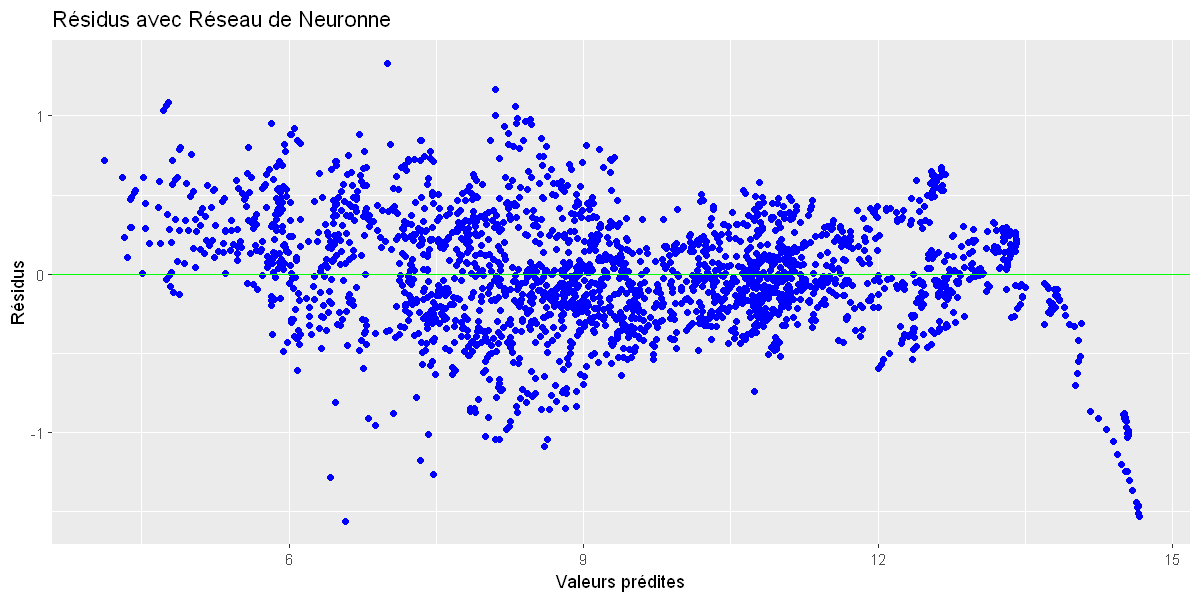

In [442]:
best_size = tuning_result$best.parameter$size
best_decay=tuning_result$best.parameter$decay

rn.reg=nnet(L_Value_CO2~.,data=data_appr,size=best_size,decay=best_decay,linout=TRUE,maxit=200)

fit.rn=predict(rn.reg,data=data_appr)
res.rn=fit.rn-data_appr[,"L_Value_CO2"]
gplot.res(fit.rn,res.rn,titre="Résidus avec Réseau de Neuronne")

In [443]:
pred.rn = predict(rn.reg, data_test)

mse_rn = mean(res.boost^2)# Erreur quadratique moyenne 
r2_rn= cor(data_test$L_Value_CO2, pred.rn)^2

paste0("Erreur quadratique moyenne boosting : ", mse_rn)
paste0("Coefficient R2 : ", r2_rn)

[1] "Erreur quadratique moyenne boosting : 0.0454017762554361"

[1] "Coefficient R2 : 0.978101683445677"

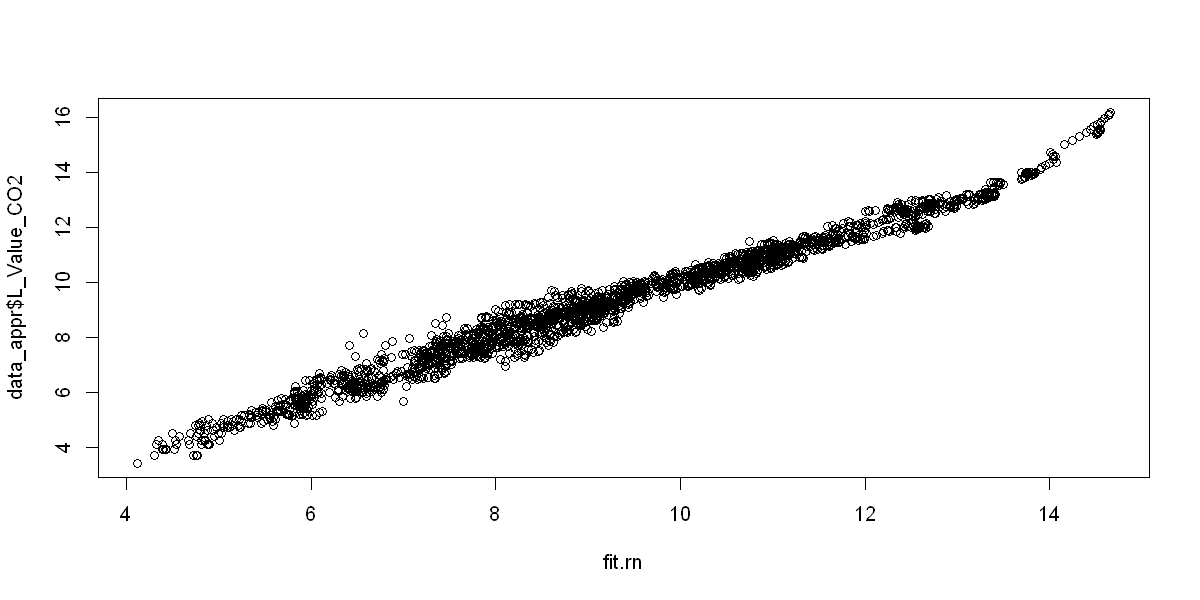

In [444]:
plot(fit.rn,data_appr$L_Value_CO2)

Le résultat n'est pas très satisfaisant, on n'obtient pas vraiment une droite. 

### Prévision de l'échantillon test 

#### Erreur de régression

In [445]:
e_reg_rn = sum((pred.rn-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
print('Erreur de régression avec Réseau de Neuronne', str(e_reg_rn))

 num 0.133
[1] "Erreur de régression avec Réseau de Neuronne"


#### Erreur de classification

In [446]:
table(pred.rn>10,data_test[,"L_Value_CO2"]>10)

       
        FALSE TRUE
  FALSE   333   10
  TRUE      9  222

## Comparaison finale de toutes les méthodes 

### Comparaison des MSE 

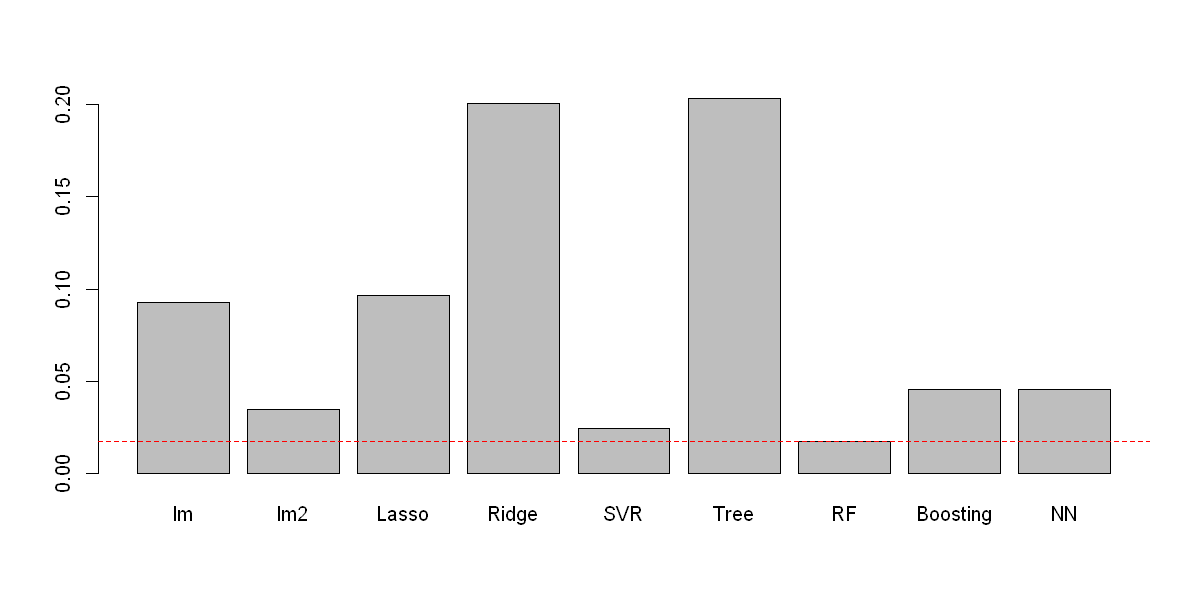

In [447]:
method_names <- c("lm","lm2","Lasso","Ridge","SVR", "Tree", "RF", "Boosting", "NN")

MSE_fin=c(mse_lm, mse_lm2, mse_lasso, mse_ridge,mse_svr,mse_tree,mse_fa, mse_boost, mse_rn)
barplot(MSE_fin,names.arg = method_names)

min_MSE = min(MSE_fin)
abline(h = min_MSE, col = "red", lty = 2) 

La méthode Random Forest permet d'obtenir le meilleur résultat de MSE. 

### Comparaison de l'erreur de regression 

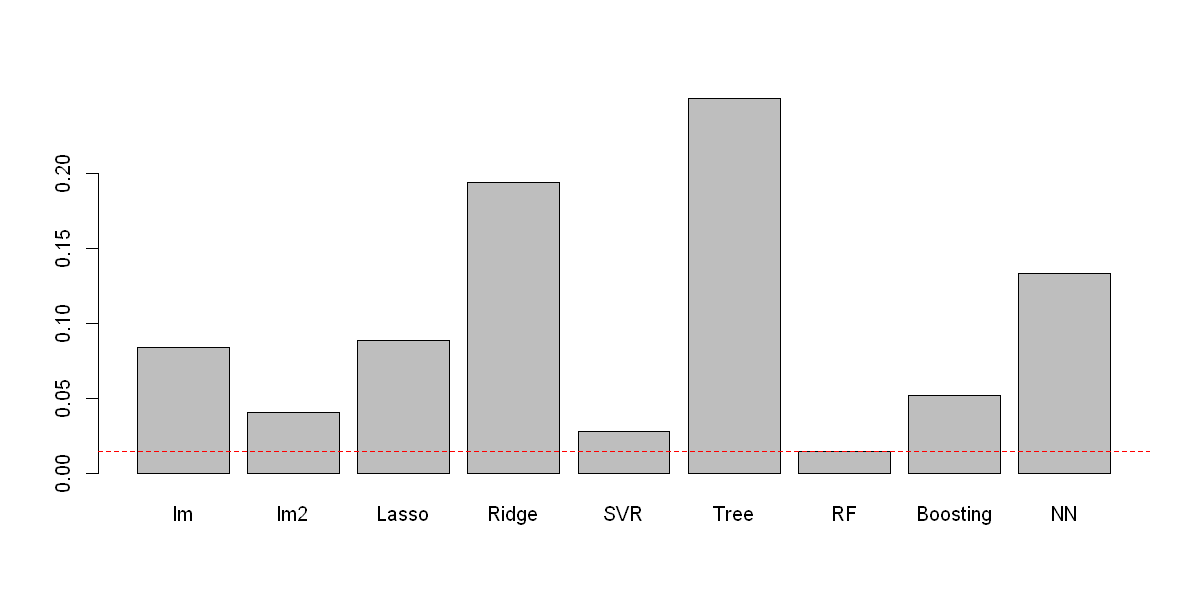

In [448]:
err_regr=c(e_reg_lm,e_reg_lm2,e_reg_lasso,e_reg_ridge,e_reg_smv,e_reg_treer, e_reg_far,e_reg_boostr, e_reg_rn)
barplot(err_regr,names.arg = method_names)
min_ereg = min(err_regr)
abline(h = min_ereg, col = "red", lty = 2) 

Random forest l'emporte à nouveau. 

### Comparaison des résidus 

[1] "---------- Modèles linéaire ----------"

[1] "---------- Modèles non linéaire ----------"

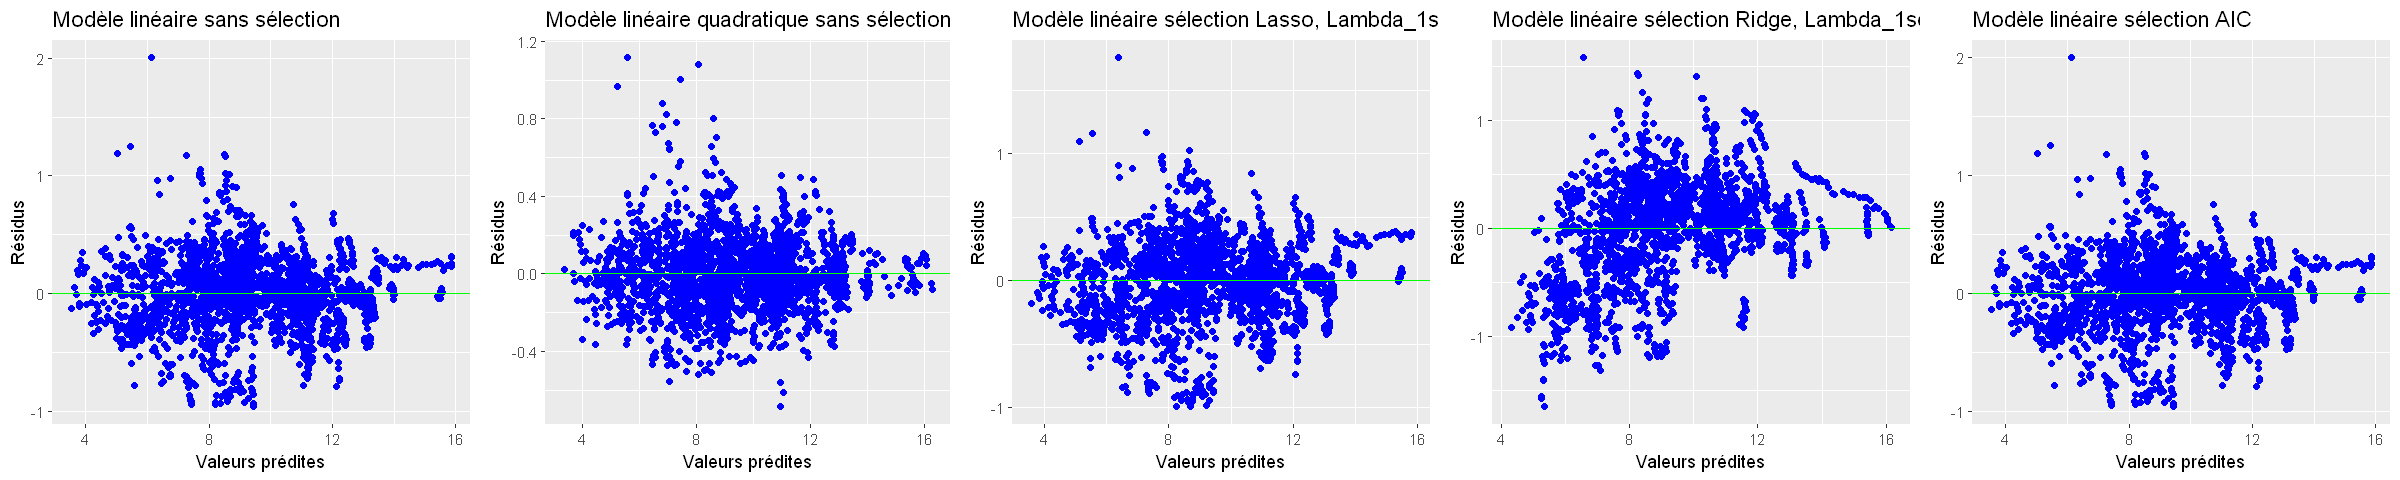

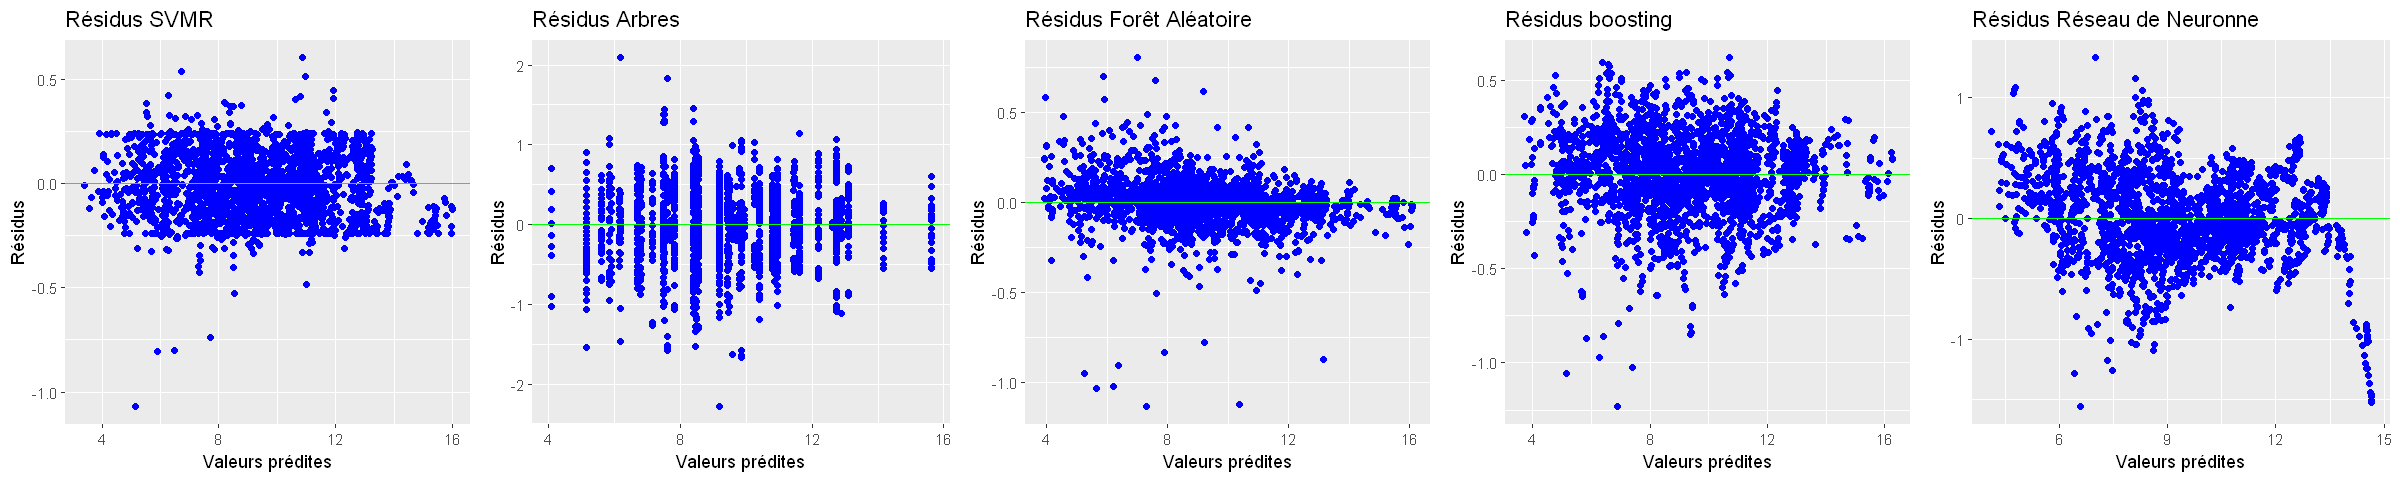

In [449]:
options(repr.plot.width =20 , repr.plot.height = 4)
par(mfrow = c(1, 3))

g5= gplot.res(fit.svmr,res.svmr,"Résidus SVMR")
g6= gplot.res(fit.tree,res.tree,"Résidus Arbres")
g7= gplot.res(fit.far, res.far, "Résidus Forêt Aléatoire")
g8= gplot.res(fit.boost, res.boost, "Résidus boosting")
g9= gplot.res(fit.rn, res.rn, "Résidus Réseau de Neuronne")
paste('---------- Modèles linéaire ----------')
grid.arrange(g1,g2,g3,g4,g10,ncol=5)
paste('---------- Modèles non linéaire ----------')
grid.arrange(g5,g6,g7,g8,g9,ncol=5)

On voit bien que les résidus liés à Random forest sont les plus centrés. 

## Conclusion

Il semblerait que le meilleur modèle soit celui des Forêts Aléatoire. Il permet de minimiser l'erreur de regression et la MSE. Ces résidus sont les plus centrés. 

### Table de contingence du meilleur modèle

In [450]:
print('---------- Forêt Aléatoire ----------')
table(pred.far>10,data_test[,"L_Value_CO2"]>10)

[1] "---------- Forêt Aléatoire ----------"


       
        FALSE TRUE
  FALSE   339    3
  TRUE      3  229

### Le niveau de précision

### Interprétation et retour sur l’analyse des données
Vos résultats sont-ils cohérents avec l’analyse exploratoire
des données, par exemple en ce qui concerne l’importance des variables ?

On a pu monter que les variables importantes pour random forest étaient celles qui participaient au plus aux dimensions 1 et 2 de l'ACP. Ce résultat est cohérent, ces variables sont celles qui influent le plus la valeur du CO2 et l'évolution du jeux de données en général. 

## 5. Complétion des valeurs manquantes 

In [451]:
library(missForest)
library(VIM)
library(naniar)

On fera l'analyse sur les algorithme estimés comme plus performants précédement. On gardera un modèle linéaire avec interaction sans selection de variable pour la méthode linéaire et Random forest et SVR pour les methodes non linéaires. 

### Préparation des données pour la completion 

In [452]:
# Chargement des données :
path <- ""
data_NA = read.table(paste(path, "./data.csv", sep = ""), sep = ",", header = TRUE)

In [453]:
# Transformation des données (qualitatif/quantitatif)

data_NA$Entity = as.factor(data_NA$Entity) # ok : 176 niveaux : 176 pays : ok
data_NA$Year = as.factor(data_NA$Year) # ok : 21 niveaux : cohérent car de 2000 à 2020 : ok
data_NA$Density.n.P.Km2. = as.numeric(gsub(",","", data_NA$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

In [454]:
# on enlève les colonnes où il y a trop de NA
data_NA = data_NA[,c(-5, -6, -15)]

In [455]:
# on renomme nos variables car les noms sont trop longs.
colnames(data_NA) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share",
                    "Elec_from_fossils","Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec",
                    "Prim_energy_cons","Energy_intensity_level","Value_CO2","Gdp_growth","Gdp_capita",
                    "Density","Land_area","Latitude","Longitude")
# str(data_NA) 



 Variables sorted by number of missings: 
               Variable        Count
              Value_CO2 0.1172924089
             Gdp_growth 0.0868731159
             Gdp_capita 0.0772814470
 Energy_intensity_level 0.0567278706
 Renewable_energy_share 0.0531652508
        Access_to_fuels 0.0463140586
      Elec_from_nuclear 0.0345300082
        Low_carbon_elec 0.0115100027
      Elec_from_fossils 0.0057550014
   Elec_from_renewables 0.0057550014
         Access_to_elec 0.0027404768
                Density 0.0002740477
              Land_area 0.0002740477
               Latitude 0.0002740477
              Longitude 0.0002740477
                 Entity 0.0000000000
                   Year 0.0000000000
       Prim_energy_cons 0.0000000000


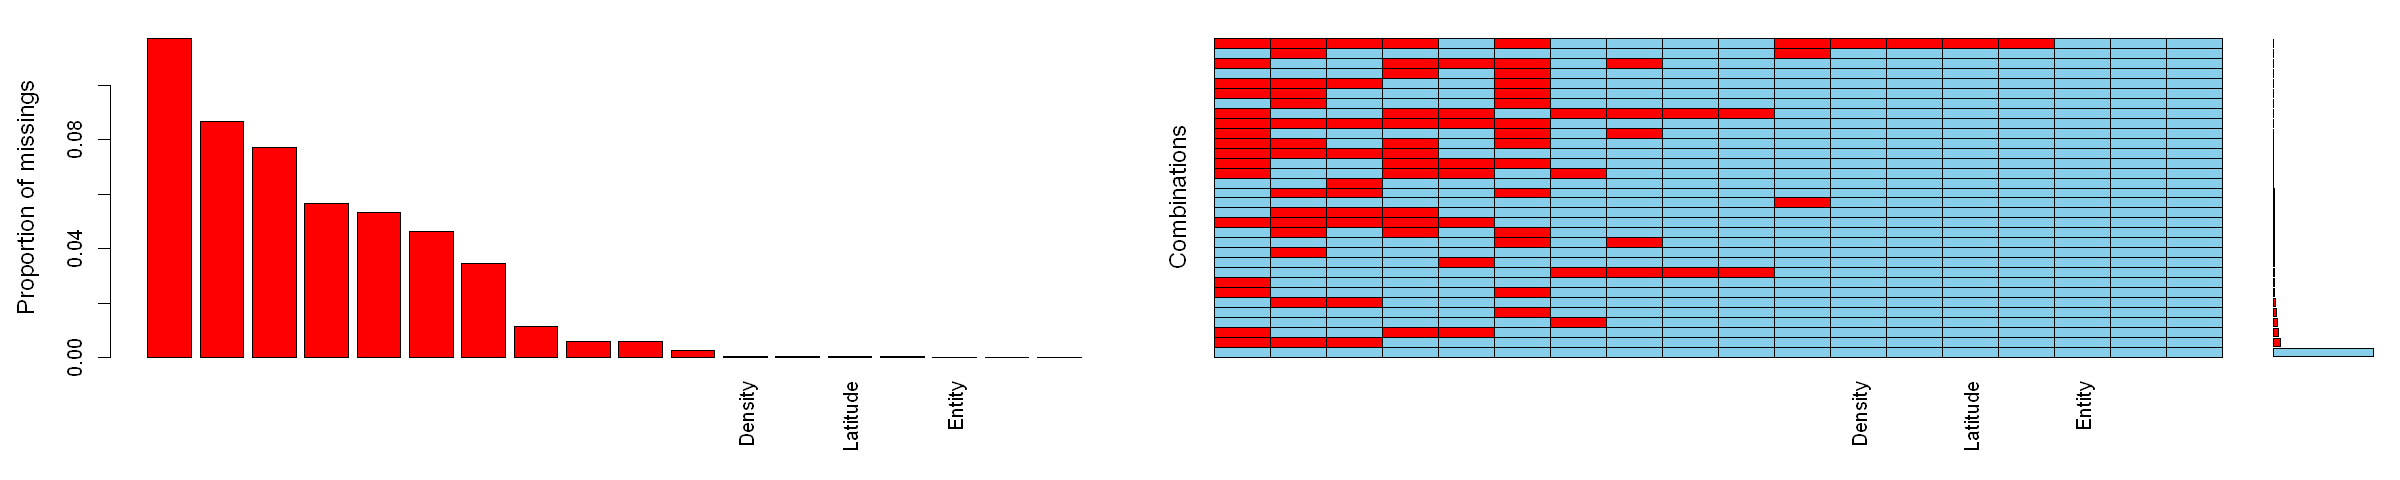

In [456]:
res<-summary(aggr(data_NA, sortVar=TRUE))$combinations

Comme il ne nous manque pas de données qualitative, nous les enlevons afin de pouvoir utiliser des methodes de complementation sur des variables quantitatives. Il nous manque principalement des valeurs de CO2 que nous cherchons à prédire et gdp_growth, gdp_capita.

In [457]:
#Tableau des données quantitatives
data_NA_quanti=data_NA[,-c(1,2)]

### Test des méthodes de complétion

#### Complétion LOCF

LOCF remplie les valeurs manquantes dans data_NA_quanti en utilisant la méthode "Last Observation Carried Forward" (LOCF).
na.rm = FALSE indique que la fonction doit également remplacer les valeurs NA par des valeurs non disponibles (NA).

Puis on applique à nouveau la méthode LOCF, qui est le résultat de la première étape.
fromLast = TRUE indique que la méthode LOCF doit être appliquée en partant de la dernière observation valide vers les observations manquantes.

Connaissant notre jeux de données, cette méthode semble pertinante. On suppose que la valeur de l'annéee suivante pour un même pays est 'proche' (certainement un peu plus élevée pour certaines variables) de la valeur d'avant. Le problème peut se poser lors de passage d'un pays à un autre. 

In [458]:
library(zoo) 

In [459]:
data.locf=na.locf(data_NA_quanti,na.rm=FALSE)
data.locf=na.locf(data.locf,na.rm=FALSE,fromLast=TRUE) # dans l'autre sens


 Variables sorted by number of missings: 
               Variable Count
         Access_to_elec     0
        Access_to_fuels     0
 Renewable_energy_share     0
      Elec_from_fossils     0
      Elec_from_nuclear     0
   Elec_from_renewables     0
        Low_carbon_elec     0
       Prim_energy_cons     0
 Energy_intensity_level     0
              Value_CO2     0
             Gdp_growth     0
             Gdp_capita     0
                Density     0
              Land_area     0
               Latitude     0
              Longitude     0


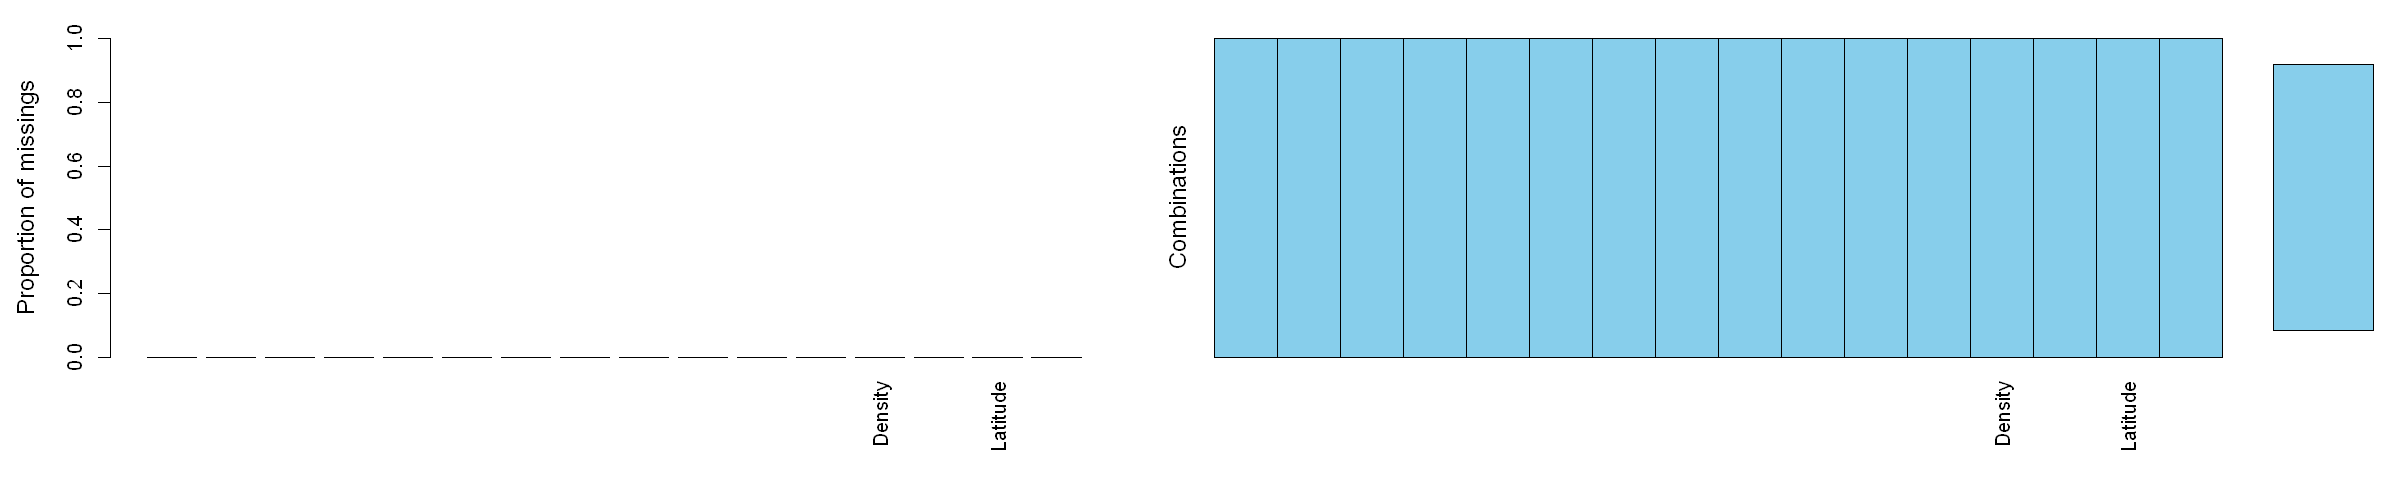

In [460]:
# juste pour vérifier qu'on a plus de valeurs manquantes 
res<-summary(aggr(data.locf, sortVar=TRUE))$combinations

On a bien complété toutes les valeurs manquantes. 

#### Completion par la moyenne 

On calcule la moyenne de chaque colonne et on complète les valeurs manquantes par cette valeur. 

Nous allons étudier cette méthode mais elle ne semble pas appropirée au jeux de données. En effet les valeurs de nos variables sont très différentes d'un pays à l'autre comme on a pue le montrer précédement. Remplir les valeurs manquantes par la moyenne de tous les pays ne semble donc pas optimal. 


 Variables sorted by number of missings: 
               Variable Count
         Access_to_elec     0
        Access_to_fuels     0
 Renewable_energy_share     0
      Elec_from_fossils     0
      Elec_from_nuclear     0
   Elec_from_renewables     0
        Low_carbon_elec     0
       Prim_energy_cons     0
 Energy_intensity_level     0
              Value_CO2     0
             Gdp_growth     0
             Gdp_capita     0
                Density     0
              Land_area     0
               Latitude     0
              Longitude     0


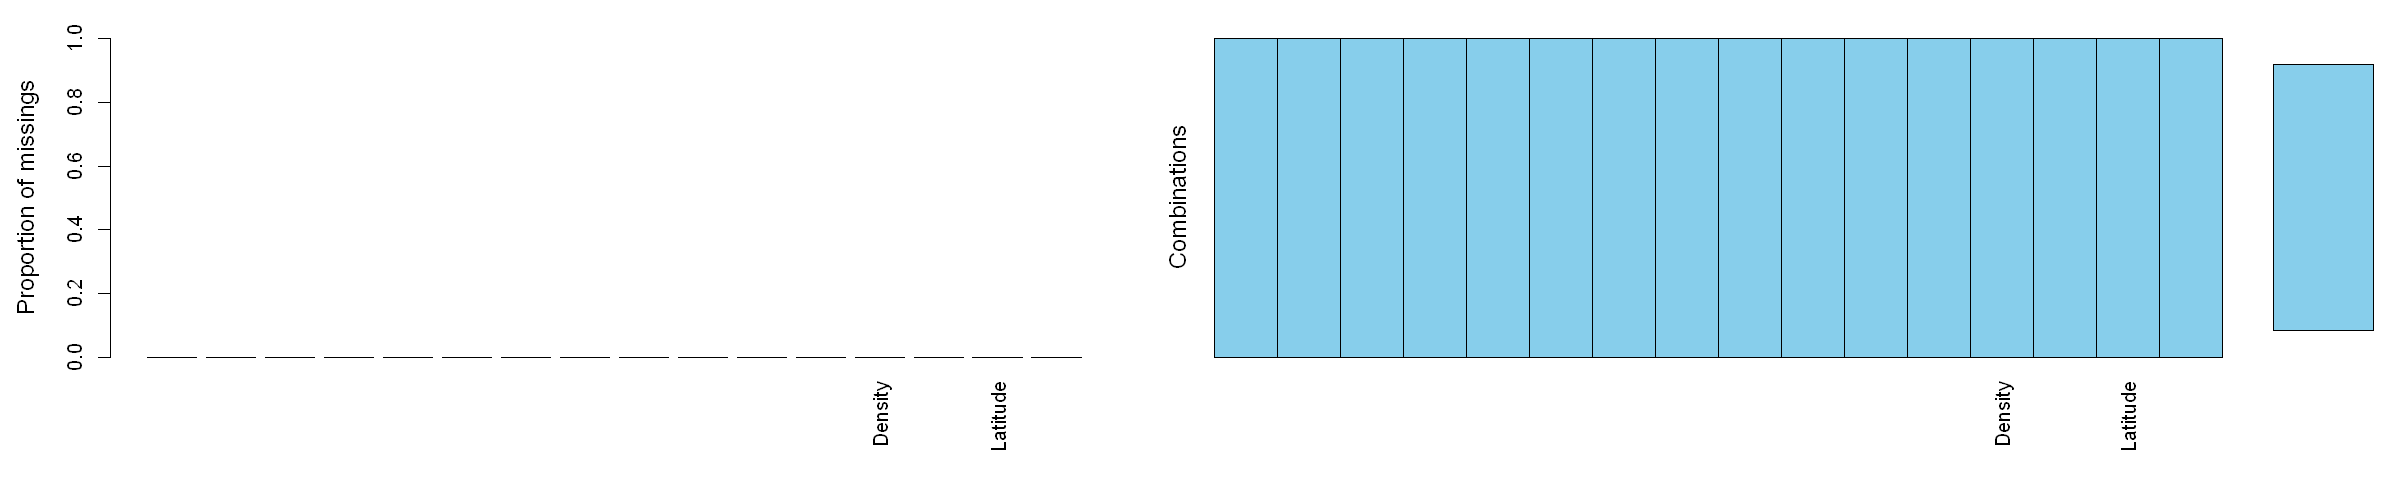

In [461]:
moy=apply(data_NA_quanti,2,mean,na.rm=TRUE)# le 2 sert a appliquer la formule sur les colonnes
data.moy=data_NA_quanti
ind.na=which(is.na(data.moy),arr.ind=TRUE)
data.moy[ind.na]=moy[ind.na[,2]]

res<-summary(aggr(data.moy, sortVar=TRUE))$combinations

#### Complétion par k plus proches voisins (kNN) ####

On va remplacer les valeurs manquantes par la moyenne des k plus proches voisins. 

Nous prendrons 3 voisins afin de prendre en compte que les éléments d'un même pays. Comme dit précédement les valeurs d'un pays à un autre peuvent être très différentes donc prendre plus de voisins ne serait pas optimal.  

In [462]:
library(VIM)


 Variables sorted by number of missings: 
               Variable Count
         Access_to_elec     0
        Access_to_fuels     0
 Renewable_energy_share     0
      Elec_from_fossils     0
      Elec_from_nuclear     0
   Elec_from_renewables     0
        Low_carbon_elec     0
       Prim_energy_cons     0
 Energy_intensity_level     0
              Value_CO2     0
             Gdp_growth     0
             Gdp_capita     0
                Density     0
              Land_area     0
               Latitude     0
              Longitude     0


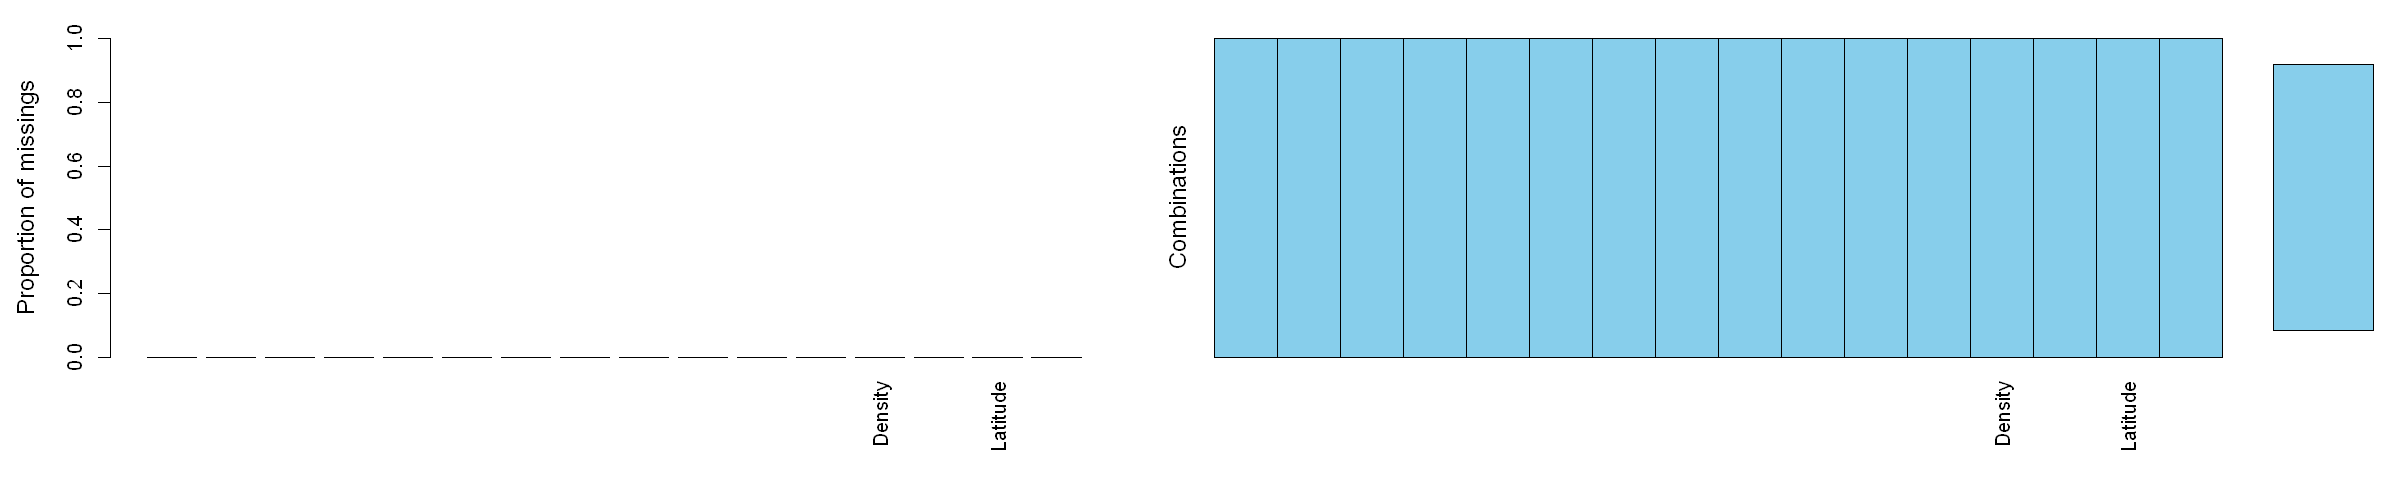

In [463]:
data.kNN=kNN(data_NA_quanti, k=3, imp_var=FALSE) # moyenne des 4 plus proches voisins
res<-summary(aggr(data.kNN, sortVar=TRUE))$combinations

#### Complétion avec Missforest ####

La méthode miss forest créer des arbres aléatoires dans lesquels il remplace les valeurs manquantes par la moyenne. Il fait ensuite un apprentissage sur chaque arbre piur prédire les valeurs manquantes dans le juex d'origine. Finalement on récupère la moyenne des données obtenues. 

In [464]:
library(missForest)


 Variables sorted by number of missings: 
               Variable Count
         Access_to_elec     0
        Access_to_fuels     0
 Renewable_energy_share     0
      Elec_from_fossils     0
      Elec_from_nuclear     0
   Elec_from_renewables     0
        Low_carbon_elec     0
       Prim_energy_cons     0
 Energy_intensity_level     0
              Value_CO2     0
             Gdp_growth     0
             Gdp_capita     0
                Density     0
              Land_area     0
               Latitude     0
              Longitude     0


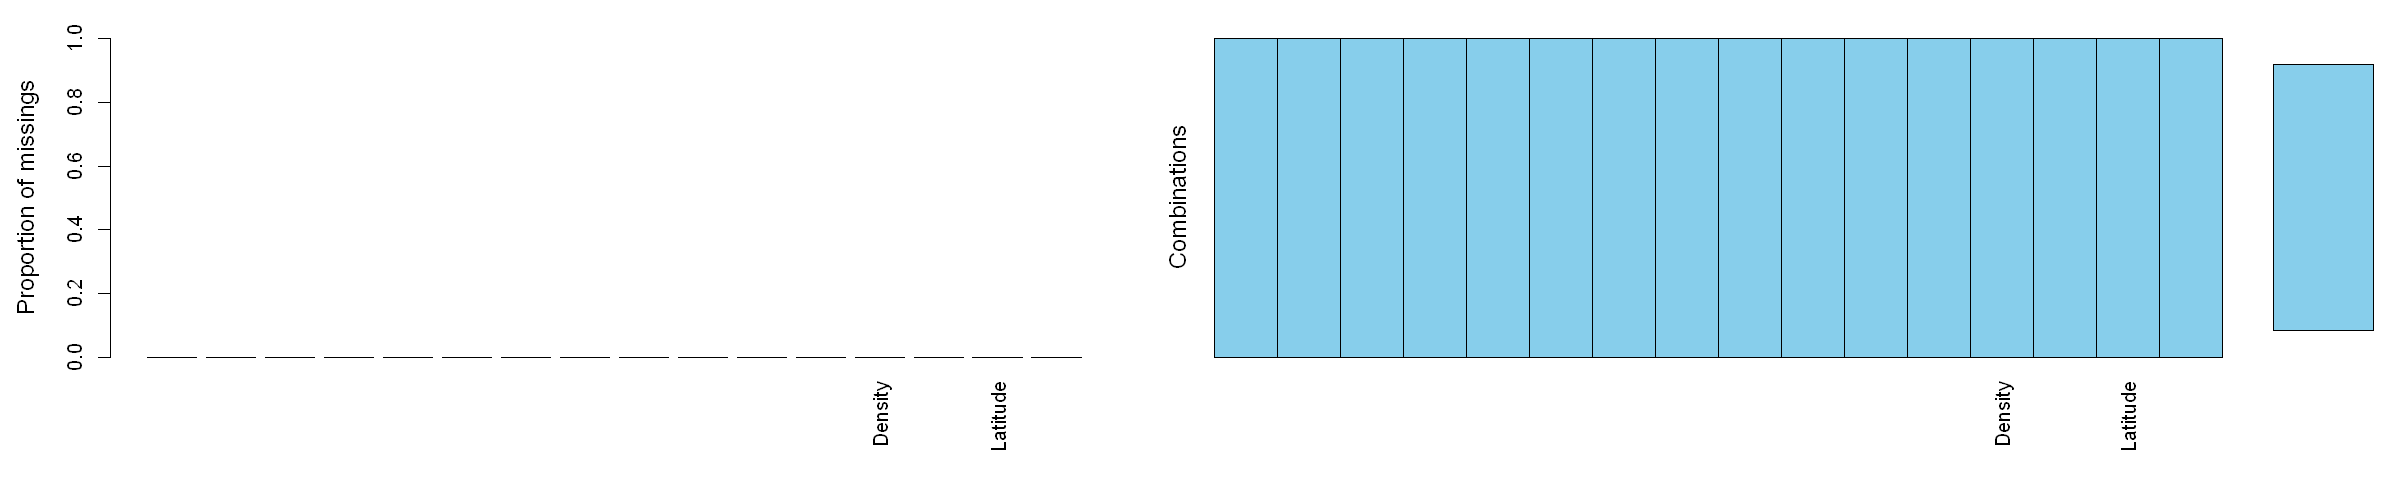

In [465]:
data.missforest=missForest(data_NA_quanti,maxiter=50) #ctrue montre l'erreur d'imputation à chaque itération
data.mf=data.missforest$ximp
res<-summary(aggr(data.mf, sortVar=TRUE))$combinations

#### Completion avec Amelia II ####

In [466]:
library(Amelia) 

Warning message:
"le package 'Amelia' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2024 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



On applique la méthode amelia

In [467]:
data.amelia=amelia(data_NA_quanti,m=1)$imputations$imp1
dim(data.amelia)

-- Imputation 1 --

  1  2  3  4  5  6



[1] 3649   16

On applique 5 fois la méthode amelia et on prend la moyenne

In [468]:
data.amelia=amelia(data_NA_quanti,m=5)
data.amelia=Reduce('+',data.amelia$imputations)/data.amelia$m # fait la moyenne des ( imputations)

-- Imputation 1 --

  1  2  3  4  5  6

-- Imputation 2 --

  1  2  3  4  5  6  7

-- Imputation 3 --

  1  2  3  4  5  6  7

-- Imputation 4 --

  1  2  3  4  5  6  7

-- Imputation 5 --

  1  2  3  4  5  6



In [469]:
data.amelia = cbind(data_NA["Entity"],data_NA["Year"],data.amelia)

In [470]:
#print(data.amelia["Value_CO2"])

In [471]:
l = list()
Var_names = names(data.amelia[,1:16])
    
    for (i in Var_names){
        # on n'affiche que l'histogramme des variables quantitatives
        if (is.numeric(data.amelia[[i]])) {
            L_var <- paste("L_",i,sep="")
            if (all(data.amelia[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
                data.amelia[,L_var] <- log(data.amelia[,i])                
            } else {
                data.amelia[,L_var] <- log(data.amelia[,i]+1)
            }
            data_copy <- data.amelia[[L_var]] # on créé une copie des données à chaque itération
            l[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=L_var)
        } 
    }

Warning message in log(data.amelia[, i] + 1):
"Production de NaN"
Warning message in log(data.amelia[, i] + 1):
"Production de NaN"
Warning message in log(data.amelia[, i] + 1):
"Production de NaN"
Warning message in log(data.amelia[, i] + 1):
"Production de NaN"
Warning message in log(data.amelia[, i] + 1):
"Production de NaN"
Warning message in log(data.amelia[, i] + 1):
"Production de NaN"
Warning message in log(data.amelia[, i] + 1):
"Production de NaN"
Warning message in log(data.amelia[, i] + 1):
"Production de NaN"
Warning message in log(data.amelia[, i] + 1):
"Production de NaN"


In [472]:
# on créer un tableau centré
data.amelia_centre <- data.amelia[,c(1,2,3,4,5,22,23,24,9,26,27,28,13,30,31,32,17,18)]


 Variables sorted by number of missings: 
                 Variable        Count
              L_Value_CO2 0.0405590573
      L_Elec_from_nuclear 0.0128802412
             L_Gdp_capita 0.0109619074
   L_Elec_from_renewables 0.0046588106
      L_Elec_from_fossils 0.0032885722
 L_Energy_intensity_level 0.0005480954
                   Entity 0.0000000000
                     Year 0.0000000000
           Access_to_elec 0.0000000000
          Access_to_fuels 0.0000000000
   Renewable_energy_share 0.0000000000
          Low_carbon_elec 0.0000000000
       L_Prim_energy_cons 0.0000000000
               Gdp_growth 0.0000000000
                L_Density 0.0000000000
              L_Land_area 0.0000000000
                 Latitude 0.0000000000
                Longitude 0.0000000000


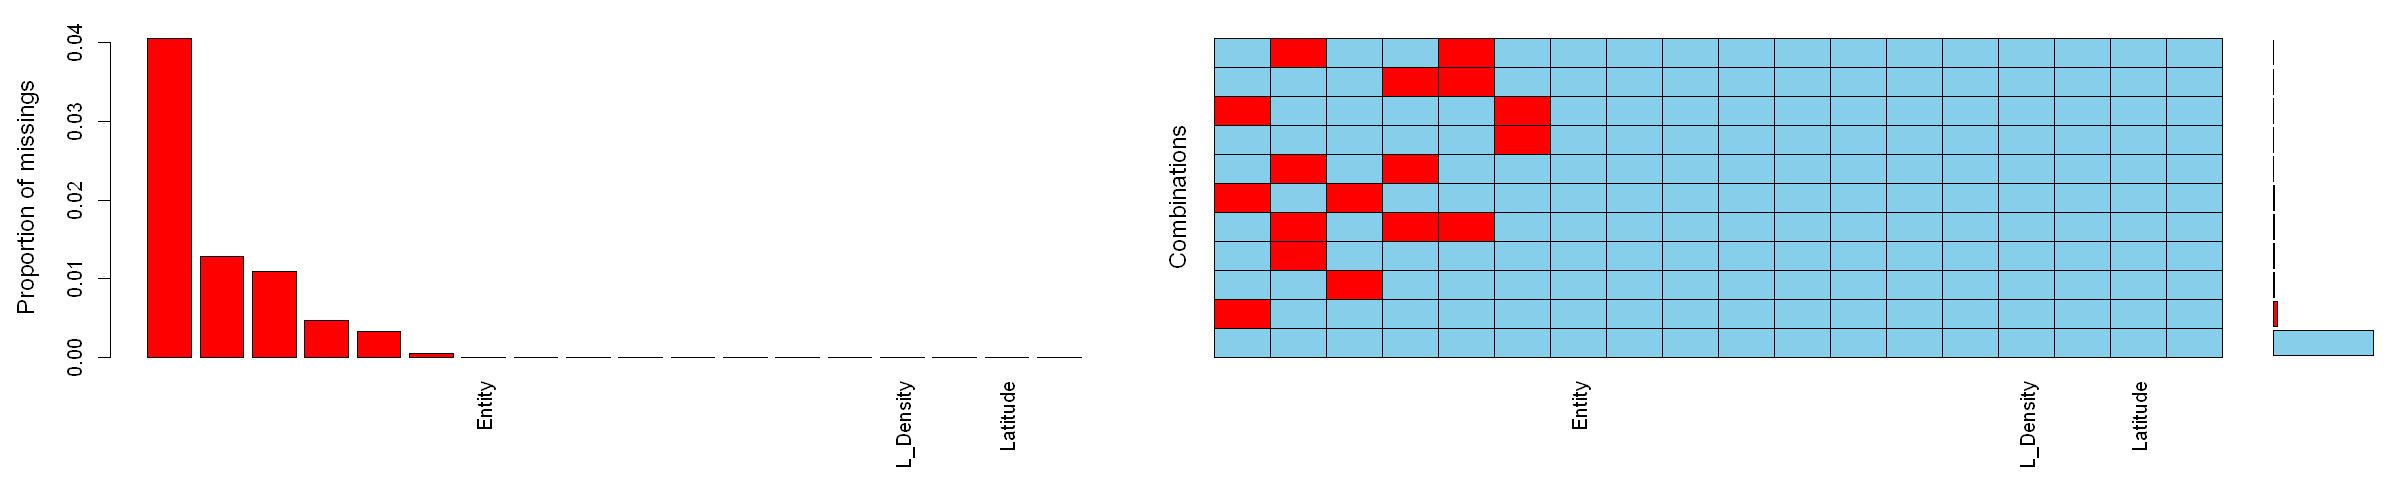

In [473]:
res<-summary(aggr(data.amelia_centre, sortVar=TRUE))$combinations

#### Création et centrage des nouveaux jeux de données

In [474]:
data_name <- c("data.locf", "data.moy", "data.kNN","data.mf")

for (name in data_name) {
    
    # on ajoute entity et year à notre data
    data <- get(name)
    data = cbind(data_NA["Entity"],data_NA["Year"],data)
    
    ######### on centre notre data ##########
    
    l = list()
    Var_names = names(data[,1:16])
    
    for (i in Var_names){
        # on n'affiche que l'histogramme des variables quantitatives
        if (is.numeric(data[[i]])) {
            L_var <- paste("L_",i,sep="")
            if (all(data[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
                data[,L_var] <- log(data[,i])
            } else {
                data[,L_var] <- log(data[,i]+1)
            }
            data_copy <- data[[L_var]] # on créé une copie des données à chaque itération
            l[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=L_var)
        } 
    }
    
    #########################################
    
    # on créer un tableau centré
    data_centre <- data[,c(1,2,3,4,5,22,23,24,9,26,27,28,13,30,31,32,17,18)]

    # str(data_centre)
    
    # on rend notre data visible en dehors de la boucle  
    assign(name, data_centre, envir = .GlobalEnv)
}

Warning message in log(data[, i] + 1):
"Production de NaN"
Warning message in log(data[, i] + 1):
"Production de NaN"
Warning message in log(data[, i] + 1):
"Production de NaN"
Warning message in log(data[, i] + 1):
"Production de NaN"


### Prédiction

#### Séparation des jeux de données 

#### Moyenne 

In [475]:
data_completees_centre_moy <- data.moy[,-6]

In [476]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test_compl_moy <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti_compl_moy = data_completees_centre_moy[,3:17]
n_ind_compl_moy = nrow(data_quanti_compl_moy) # nombre de lignes dans les données
n_var_compl_moy = ncol(data_quanti_compl_moy) # nombre de colonnes
n_test_compl_moy = ceiling(n_ind_compl_moy * ratio_test_compl_moy) # Taille de l'échantillon test (ceiling = arrondis sup)

indices_test_compl_moy = sample(1:n_ind_compl_moy, n_test_compl_moy) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr_compl_moy = setdiff(1:n_ind_compl_moy, indices_test_compl_moy)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr_compl_moy = data_quanti_compl_moy[indices_appr_compl_moy,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test_compl_moy = data_quanti_compl_moy[indices_test_compl_moy,] # Echantillon test

CO2_appr_compl_moy = data_quanti_compl_moy[indices_appr_compl_moy, 9]
CO2_test_compl_moy = data_quanti_compl_moy[indices_test_compl_moy, 9]


#### LOCF

In [477]:
data_completees_centre_locf <- data.locf[,-6]

In [478]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test_compl_locf <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti_compl_locf = data_completees_centre_locf[,3:17]
n_ind_compl_locf = nrow(data_quanti_compl_locf) # nombre de lignes dans les données
n_var_compl_locf = ncol(data_quanti_compl_locf) # nombre de colonnes
n_test_compl_locf = ceiling(n_ind_compl_locf * ratio_test_compl_locf) # Taille de l'échantillon test (ceiling = arrondis sup)

indices_test_compl_locf = sample(1:n_ind_compl_locf, n_test_compl_locf) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr_compl_locf = setdiff(1:n_ind_compl_locf, indices_test_compl_locf)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr_compl_locf = data_quanti_compl_locf[indices_appr_compl_locf,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test_compl_locf = data_quanti_compl_locf[indices_test_compl_locf,] # Echantillon test

CO2_appr_compl_locf = data_quanti_compl_locf[indices_appr_compl_locf, 9]
CO2_test_compl_locf = data_quanti_compl_locf[indices_test_compl_locf, 9]


#### KNN

In [479]:
data_completees_centre_kNN <- data.kNN[,-6]

In [480]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test_compl_kNN <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti_compl_kNN = data_completees_centre_kNN[,3:17]
n_ind_compl_kNN = nrow(data_quanti_compl_kNN) # nombre de lignes dans les données
n_var_compl_kNN = ncol(data_quanti_compl_kNN) # nombre de colonnes
n_test_compl_kNN = ceiling(n_ind_compl_kNN * ratio_test_compl_kNN) # Taille de l'échantillon test (ceiling = arrondis sup)

indices_test_compl_kNN = sample(1:n_ind_compl_kNN, n_test_compl_kNN) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr_compl_kNN = setdiff(1:n_ind_compl_kNN, indices_test_compl_kNN)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr_compl_kNN = data_quanti_compl_kNN[indices_appr_compl_kNN,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test_compl_kNN = data_quanti_compl_kNN[indices_test_compl_kNN,] # Echantillon test

CO2_appr_compl_kNN = data_quanti_compl_kNN[indices_appr_compl_kNN, 9]
CO2_test_compl_kNN = data_quanti_compl_kNN[indices_test_compl_kNN, 9]


#### MissForest

In [481]:
data_completees_centre_mf <- data.mf[,-6]

In [482]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test_compl_mf <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti_compl_mf = data_completees_centre_mf[,3:17]
n_ind_compl_mf = nrow(data_quanti_compl_mf) # nombre de lignes dans les données
n_var_compl_mf = ncol(data_quanti_compl_mf) # nombre de colonnes
n_test_compl_mf = ceiling(n_ind_compl_mf * ratio_test_compl_mf) # Taille de l'échantillon test (ceiling = arrondis sup)

indices_test_compl_mf = sample(1:n_ind_compl_mf, n_test_compl_mf) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr_compl_mf = setdiff(1:n_ind_compl_mf, indices_test_compl_mf)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr_compl_mf = data_quanti_compl_mf[indices_appr_compl_mf,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test_compl_mf = data_quanti_compl_mf[indices_test_compl_mf,] # Echantillon test

CO2_appr_compl_mf = data_quanti_compl_mf[indices_appr_compl_mf, 9]
CO2_test_compl_mf = data_quanti_compl_mf[indices_test_compl_mf, 9]


### Prédicition avec un modèle linéaire avec interaction

#### Moyenne 

In [483]:
regc.lm_moy = aov(L_Value_CO2 ~ .^2 , data=data_appr_compl_moy) # ANCOVA  car qualitatif + quantitatif
resc.lm_moy = regc.lm_moy$residuals                     # Extraction des résidus
fitc.lm_moy = regc.lm_moy$fitted.values # Extraction des valeurs ajustées

predc.lm_moy = predict(regc.lm_moy, data_test_compl_moy) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_lm_moy =  mean(resc.lm_moy^2) # Erreur quadratique moyenne 
r2_lm_moy= summary(regc.lm_moy)$r.squared #cor(data_test$L_Value_CO2, CO2_pred_lm2)^2
e_reg_lm_moy=sum((predc.lm_moy-data_test_compl_moy[,"L_Value_CO2"])^2)/nrow(data_test_compl_moy)

#### LOCF

In [484]:
regc.lm_locf = aov(L_Value_CO2 ~ .^2 , data=data_appr_compl_locf) # ANCOVA  car qualitatif + quantitatif
resc.lm_locf = regc.lm_locf$residuals                     # Extraction des résidus
fitc.lm_locf = regc.lm_locf$fitted.values # Extraction des valeurs ajustées

predc.lm_locf = predict(regc.lm_locf, data_test_compl_locf) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_lm_locf =  mean(resc.lm_moy^2) # Erreur quadratique moyenne 
r2_lm_locf= summary(regc.lm_moy)$r.squared #cor(data_test$L_Value_CO2, CO2_pred_lm2)^2
e_reg_lm_locf=sum((predc.lm_locf-data_test_compl_locf[,"L_Value_CO2"])^2)/nrow(data_test_compl_locf)

#### KNN 

In [485]:
regc.lm_kNN = aov(L_Value_CO2 ~ .^2 , data=data_appr_compl_kNN ) # ANCOVA  car qualitatif + quantitatif
resc.lm_kNN = regc.lm_kNN$residuals                     # Extraction des résidus
fitc.lm_kNN  = regc.lm_kNN$fitted.values # Extraction des valeurs ajustées

predc.lm_kNN  = predict(regc.lm_kNN , data_test_compl_kNN ) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_lm_kNN  =  mean(resc.lm_kNN ^2) # Erreur quadratique moyenne 
r2_lm_kNN  = summary(regc.lm_kNN )$r.squared #cor(data_test$L_Value_CO2, CO2_pred_lm2)^2
e_reg_lm_kNN =sum((predc.lm_kNN -data_test_compl_kNN [,"L_Value_CO2"])^2)/nrow(data_test_compl_kNN )

#### Miss Forest

In [486]:
regc.lm_mf = aov(L_Value_CO2 ~ .^2 , data=data_appr_compl_mf ) # ANCOVA  car qualitatif + quantitatif
resc.lm_mf = regc.lm_mf$residuals                     # Extraction des résidus
fitc.lm_mf  = regc.lm_mf$fitted.values # Extraction des valeurs ajustées

predc.lm_mf  = predict(regc.lm_mf , data_test_compl_mf ) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_lm_mf  =  mean(resc.lm_mf^2) # Erreur quadratique moyenne 
r2_lm_mf  = summary(regc.lm_mf )$r.squared #cor(data_test$L_Value_CO2, CO2_pred_lm2)^2
e_reg_lm_mf =sum((predc.lm_mf -data_test_compl_mf[,"L_Value_CO2"])^2)/nrow(data_test_compl_mf )

### Prédicition avec des forêrs aléatoires

#### Moyenne

In [487]:
fa.reg_moy=randomForest(L_Value_CO2 ~., data=data_appr_compl_moy[,-1],xtest=data_test_compl_moy[,-c(1,9)],ytest=data_test_compl_moy[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE) #, mtry = 6)#critère = square error 

fitc.far_moy=fa.reg_moy$predicted
resc.far_moy=fitc.far_moy-data_appr_compl_moy[,"L_Value_CO2"]

predc.fa_moy = fa.reg_moy$test$predict
mse_fa_moy = mean(resc.far_moy^2)# Erreur quadratique moyenne 
r2_boost_moy = cor(data_test_compl_moy$L_Value_CO2, predc.fa_moy)^2
e_reg_fa_moy=sum((predc.fa_moy-data_test_compl_moy[,"L_Value_CO2"])^2)/nrow(data_test_compl_moy)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |   0.2602     4.14 |   0.1975     3.61 |
 100 |   0.2412     3.84 |    0.185     3.38 |
 150 |   0.2378     3.78 |   0.1885     3.44 |
 200 |   0.2306     3.67 |   0.1836     3.35 |
 250 |   0.2277     3.62 |   0.1847     3.37 |
 300 |   0.2257     3.59 |    0.184     3.36 |
 350 |    0.224     3.56 |   0.1828     3.34 |
 400 |   0.2231     3.55 |   0.1831     3.34 |
 450 |    0.222     3.53 |   0.1809     3.30 |
 500 |    0.217     3.45 |   0.1802     3.29 |


#### LOCF

In [488]:
fa.reg_locf=randomForest(L_Value_CO2 ~., data=data_appr_compl_locf[,-1],xtest=data_test_compl_locf[,-c(1,9)],ytest=data_test_compl_locf[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE) #, mtry = 6)#critère = square error 

fitc.far_locf=fa.reg_locf$predicted
resc.far_locf=fitc.far_locf-data_appr_compl_locf[,"L_Value_CO2"]

predc.fa_locf = fa.reg_locf$test$predict
mse_fa_locf = mean(resc.far_locf^2)# Erreur quadratique moyenne 
r2_boost_locf = cor(data_test_compl_locf$L_Value_CO2, predc.fa_locf)^2
e_reg_fa_locf=sum((predc.fa_locf-data_test_compl_locf[,"L_Value_CO2"])^2)/nrow(data_test_compl_locf)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02545     0.41 |  0.01575     0.30 |
 100 |  0.02245     0.37 |  0.01622     0.31 |
 150 |   0.0218     0.36 |  0.01625     0.31 |
 200 |  0.02115     0.34 |  0.01632     0.31 |
 250 |  0.02057     0.33 |  0.01602     0.31 |
 300 |  0.02025     0.33 |   0.0158     0.30 |
 350 |  0.01991     0.32 |  0.01603     0.31 |
 400 |  0.01981     0.32 |    0.016     0.30 |
 450 |  0.01976     0.32 |  0.01616     0.31 |
 500 |  0.01956     0.32 |  0.01615     0.31 |


#### KNN

In [489]:
fa.reg_kNN=randomForest(L_Value_CO2 ~., data=data_appr_compl_kNN[,-1],xtest=data_test_compl_kNN[,-c(1,9)],ytest=data_test_compl_kNN[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE) #, mtry = 6)#critère = square error 

fitc.far_kNN=fa.reg_kNN$predicted
resc.far_kNN=fitc.far_kNN-data_appr_compl_kNN[,"L_Value_CO2"]

predc.fa_kNN = fa.reg_kNN$test$predict
mse_fa_kNN = mean(resc.far_kNN^2)# Erreur quadratique moyenne 
r2_boost_kNN = cor(data_test_compl_kNN$L_Value_CO2, predc.fa_kNN)^2
e_reg_fa_kNN=sum((predc.fa_kNN-data_test_compl_kNN[,"L_Value_CO2"])^2)/nrow(data_test_compl_kNN)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.09985     1.57 |  0.08005     1.44 |
 100 |   0.0906     1.43 |  0.07584     1.37 |
 150 |   0.0874     1.38 |  0.06979     1.26 |
 200 |  0.08462     1.33 |  0.06916     1.25 |
 250 |  0.08437     1.33 |  0.06989     1.26 |
 300 |  0.08362     1.32 |  0.06936     1.25 |
 350 |  0.08385     1.32 |  0.06864     1.24 |
 400 |  0.08441     1.33 |  0.06882     1.24 |
 450 |  0.08475     1.33 |  0.06913     1.25 |
 500 |  0.08524     1.34 |  0.06953     1.25 |


#### Miss Forest

In [490]:
fa.reg_mf=randomForest(L_Value_CO2 ~., data=data_appr_compl_mf[,-1],xtest=data_test_compl_mf[,-c(1,9)],ytest=data_test_compl_mf[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE) #, mtry = 6)#critère = square error 

fitc.far_mf=fa.reg_mf$predicted
resc.far_mf=fitc.far_mf-data_appr_compl_mf[,"L_Value_CO2"]

predc.fa_mf = fa.reg_mf$test$predict
mse_fa_mf = mean(resc.far_mf^2)# Erreur quadratique moyenne 
r2_boost_mf = cor(data_test_compl_mf$L_Value_CO2, predc.fa_mf)^2
e_reg_fa_mf=sum((predc.fa_mf-data_test_compl_mf[,"L_Value_CO2"])^2)/nrow(data_test_compl_mf)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.07341     1.22 |  0.02925     0.56 |
 100 |  0.06383     1.06 |  0.02839     0.54 |
 150 |  0.06222     1.03 |  0.02879     0.55 |
 200 |  0.06286     1.05 |  0.02904     0.55 |
 250 |  0.06158     1.02 |  0.02907     0.56 |
 300 |  0.06095     1.01 |  0.02901     0.55 |
 350 |  0.05928     0.99 |  0.02827     0.54 |
 400 |  0.05922     0.98 |  0.02791     0.53 |
 450 |  0.05813     0.97 |  0.02784     0.53 |
 500 |  0.05837     0.97 |  0.02763     0.53 |


### Comparaison des méthodes

#### Erreur quadratique

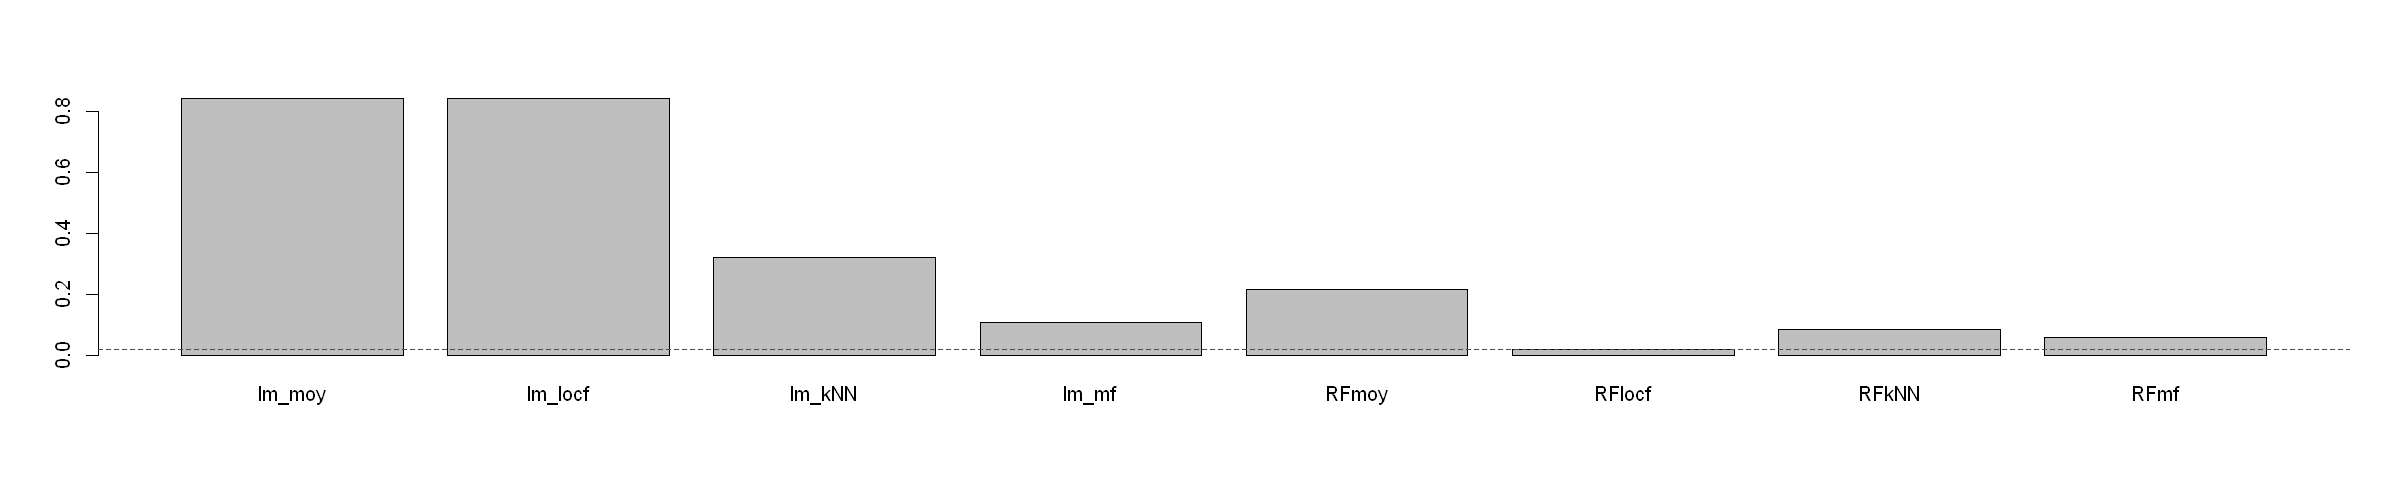

In [491]:
method_names_compl <- c("lm_moy","lm_locf","lm_kNN","lm_mf","RFmoy","RFlocf","RFkNN","RFmf")
#mse_lm2_moy,mse_lm2_locf,mse_lm2_kNN,mse_lm2_mf,mse_fa_moy,mse_fa_locf,mse_fa_kNN,
MSE_fin_c=c(mse_lm_moy,mse_lm_locf,mse_lm_kNN,mse_lm_mf,mse_fa_moy,mse_fa_locf,mse_fa_kNN,mse_fa_mf)
barplot(MSE_fin_c,names.arg = method_names_compl)

min_MSE_c = min(MSE_fin_c)
abline(h = min_MSE_c, col = "red", lty = 2) 

#### Erreur de régression

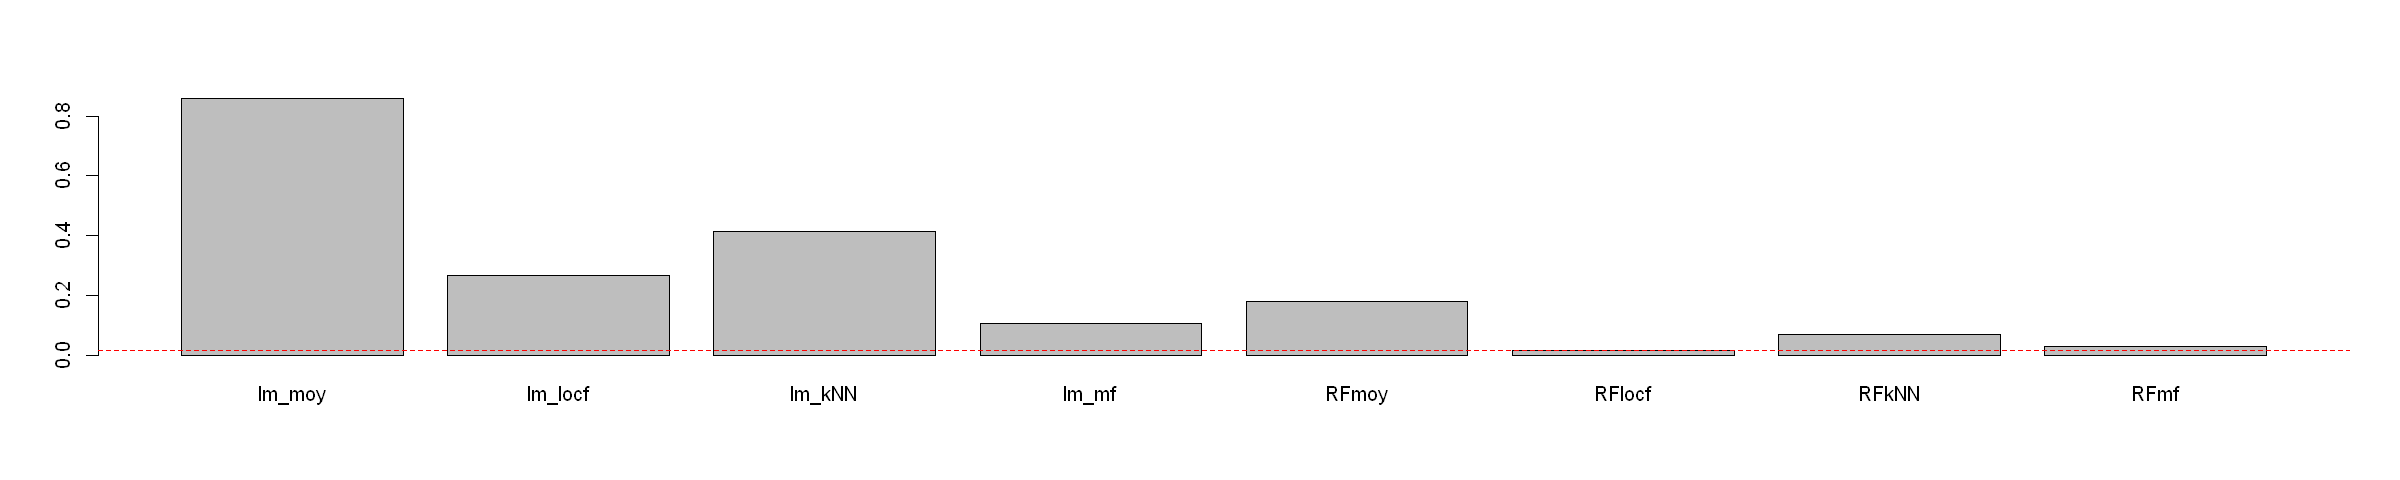

In [492]:
err_regr_c=c(e_reg_lm_moy,e_reg_lm_locf,e_reg_lm_kNN,e_reg_lm_mf,
             e_reg_fa_moy,e_reg_fa_locf,e_reg_fa_kNN,e_reg_fa_mf)

barplot(err_regr_c,names.arg = method_names_compl)
min_ereg_c = min(err_regr_c)
abline(h = min_ereg_c, col = "red", lty = 2) 

Les méthodes de remplissage par Randome forest semble être la plus efficasse sur les deux modèle. 

#### Erreur de classification

In [493]:
print('---------- LM2 ----------')
table(predc.lm_mf>10,data_test_compl_mf[,"L_Value_CO2"]>10)


print('---------- Forêt Aléatoire ----------')
table(predc.fa_locf>10,data_test_compl_locf[,"L_Value_CO2"]>10)
table(predc.fa_mf>10,data_test_compl_mf[,"L_Value_CO2"]>10)

[1] "---------- LM2 ----------"


       
        FALSE TRUE
  FALSE   410   12
  TRUE     11  297

[1] "---------- Forêt Aléatoire ----------"


       
        FALSE TRUE
  FALSE   410    8
  TRUE      5  307

       
        FALSE TRUE
  FALSE   415    9
  TRUE      6  300

La méthode de remplissage par LOCF est la meillleur pour le modèle de forêt aléatoire. La méthode de remplissage par Randome forest est le meilleur compromis pour les deux modèles. 

#### Niveau de précision

## Conclusion

Nous avons montré que initiale avait beaucoup de valeurs manquantes. Nous avons enlevé les variables qui avaient trop de ces valeurs car elles n'étaient donc pas exploitables. 

Dans sun premiers temps nous avons enlevé les individus qui avaient toujours des valeurs manquantes afin d'ectuer une première analyse. On en retire que : 
- On peut centrer les données par un transformation gaussienne afin de proposer un meilleur analyse. Il est important de se souvenir que la prédicton que nous faisons est le logarithme de la valeur en CO2. 
- Les variables sont toutes dans des unités différentes et sont donc difficilement comparables entre elles à titre quantitatif. Cependant on a pu mettre en avant des interactions entre les variables. Notement les acces à l'électricité et au fuels agissent de façon similaire à l'approvisionnement en électricité, carburant ... D'autres ont une évolution opposée comme la part d'énergie renouvelable et les accès aux énergies.
- Les variables sont très différentes pour certains pays, elles présentent des outliers. 
- Nous avons pu montré que l'on pouvait représenter notre jeux de données avec 7 dimensions. Les deux premières représentées notement par l'accès au fuels et la consomation d'énergy ... Les dimensions restent difficiles à interpréter. 
- Enfin concernant la varibale CO2, nous avons montré qu'elle dépend évolue de façon croissante avec les années. Nous constantons également qu'elle est très différente d'un pays à l'autre. 

Suite à cette analyse nous avons modélisé notre jeux de données : 
- Nous avons mis en places de méthodes de régression linaire (ANOVA) sans interaction puis avec. Dans un premier temps sans selection de variable puis avec selection Ridge et LASSO. Nous observons à chaque fois l'erreur de regression et l'erreur de classification. 
- Puis nous avons implémenter des méthodes non linéaire SVR, CART, Boosting, Random forest et CNN. Nous vérifions aussi les erreurs obtenues. 
- Finalement on a comparer tous les modèles, on retiens celui de Random forest qui nous permet d'obtenir les plus petites erreurs avec des résidus centrés. Le niveau de précision est .... à compléter 

Enfin nous sommes repartis du jeux de départ et avons remplacer les valeurs manquantes des individus grâce à des algorithme de complétion. Il ne manquait pas de variables qualitatives donc nous avons pu appliquer des méthodes propres aux variables quantitatives. 
- LOCf, kNN et Missing forest semble en théorie être les plus appropriées à notre jeux de données. 
- Nous avons fait les méthodes de regression quadratique sans sélectin de variables et random forest sur ces nouveaux jeux de données. 
- Nous obtenons au final de meilleur résultats avec une complétion par Missing forest pour la regression quadratique, et par LOCF pour la modélisation par Random forest. 

Nous pouvons conclure en disant que la méthode de Random forest semble être le meilleur compromis entre toutes les méthodes afin de prédire au mieux la valeur de CO2. 